In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [2]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [3]:
mask_path = "dataset/cat_and_dog_dataset/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'dataset/cat_and_dog_dataset/SegmentationClass'...
['cat.770.png', 'dog.511.png', 'cat.516.png', 'dog.708.png', 'dog.577.png', 'cat.739.png', 'dog.559.png', 'dog.713.png', 'cat.583.png', 'cat.515.png', 'cat.509.png', 'cat.725.png', 'dog.699.png', 'cat.644.png', 'dog.624.png', 'dog.664.png', 'cat.612.png', 'cat.667.png', 'dog.522.png', 'cat.718.png', 'cat.746.png', 'dog.582.png', 'dog.627.png', 'dog.697.png', 'cat.514.png', 'dog.659.png', 'cat.733.png', 'dog.510.png', 'dog.725.png', 'dog.710.png', 'cat.707.png', 'cat.669.png', 'cat.651.png', 'dog.692.png', 'cat.524.png', 'dog.592.png', 'dog.514.png', 'cat.684.png', 'cat.557.png', 'cat.591.png', 'cat.511.png', 'dog.688.png', 'cat.530.png', 'dog.578.png', 'dog.622.png', 'dog.694.png', 'dog.744.png', 'dog.712.png', 'cat.632.png', 'cat.783.png']


Finding unique colors:   0%|          | 0/50 [00:00<?, ?it/s]

Finding unique colors: 100%|██████████| 50/50 [00:03<00:00, 12.53it/s]


Scan complete!
Found 3 unique classes.


{(0, 0, 0): 0, (0, 128, 0): 1, (128, 0, 0): 2}

In [ ]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale


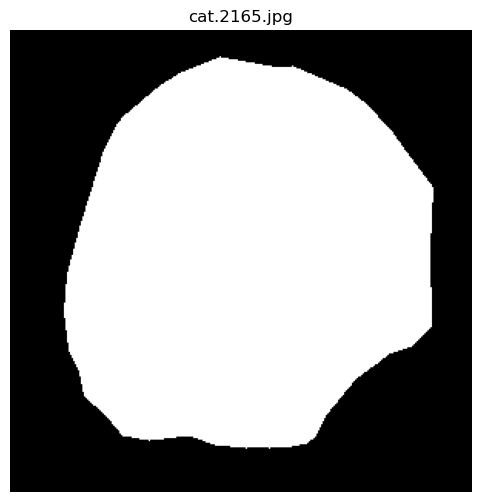

Processed and saved: cat.2165.jpg


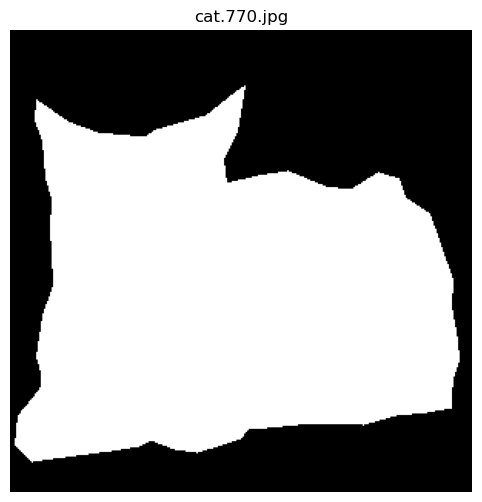

Processed and saved: cat.770.jpg


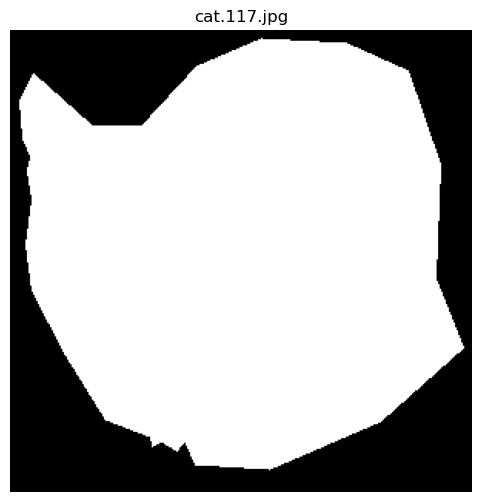

Processed and saved: cat.117.jpg


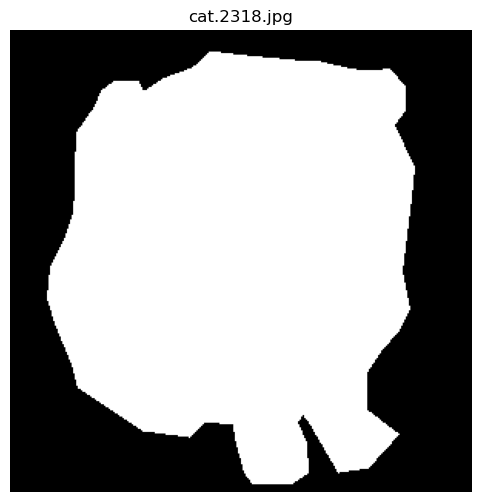

Processed and saved: cat.2318.jpg


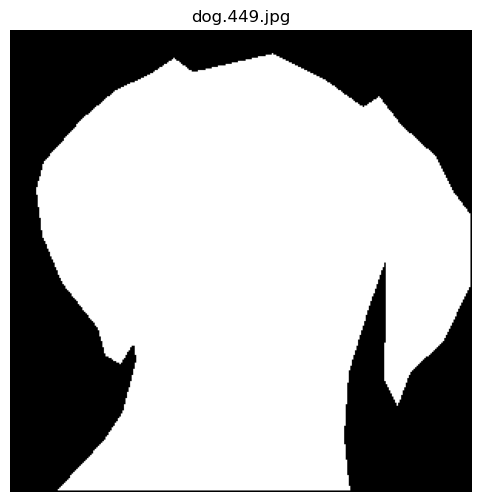

Processed and saved: dog.449.jpg


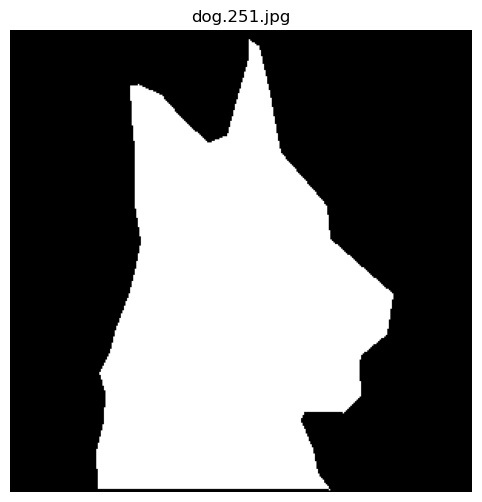

Processed and saved: dog.251.jpg


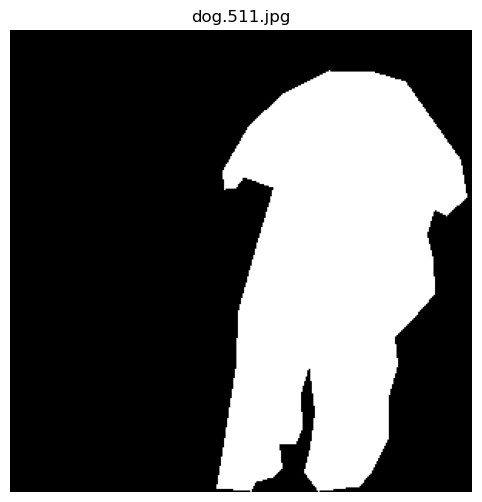

Processed and saved: dog.511.jpg


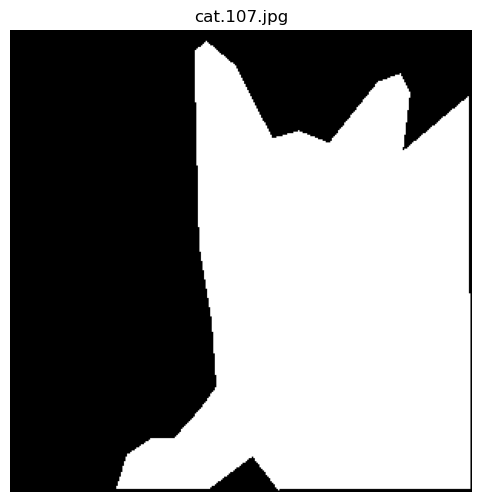

Processed and saved: cat.107.jpg


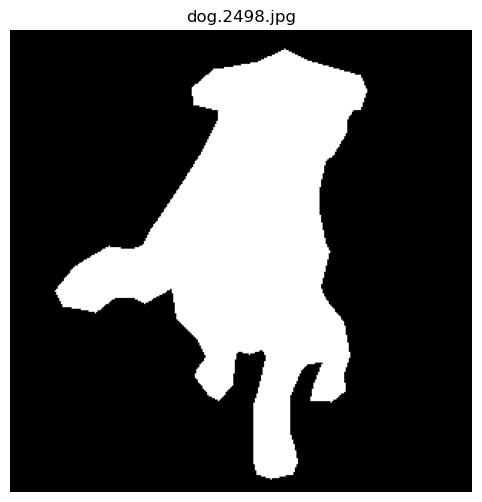

Processed and saved: dog.2498.jpg


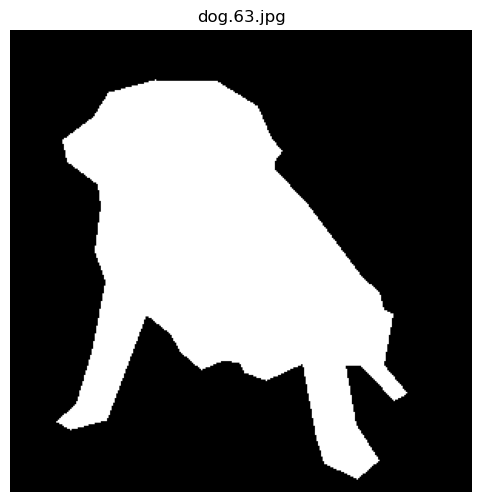

Processed and saved: dog.63.jpg


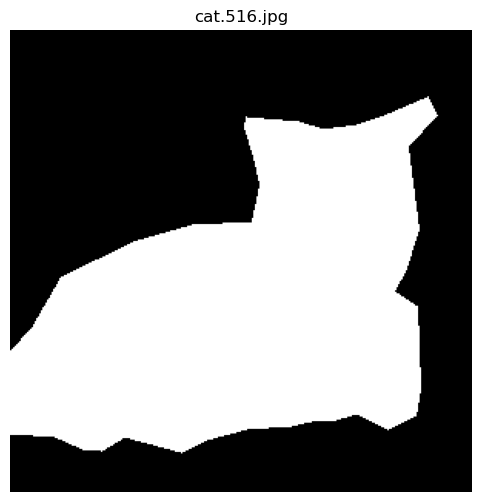

Processed and saved: cat.516.jpg


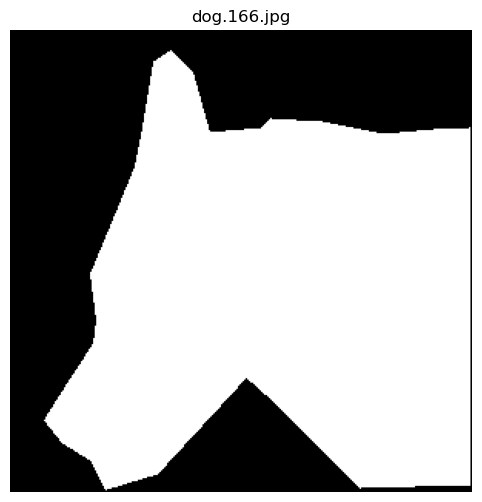

Processed and saved: dog.166.jpg


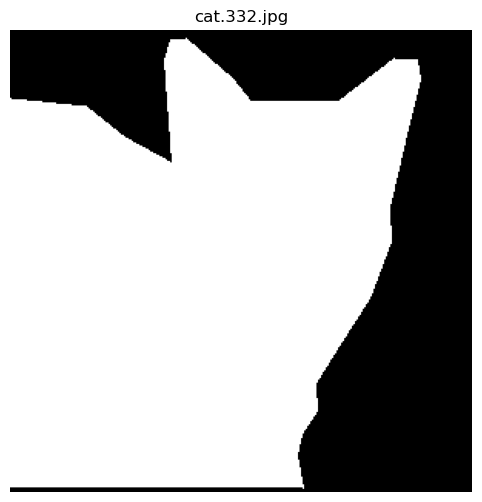

Processed and saved: cat.332.jpg


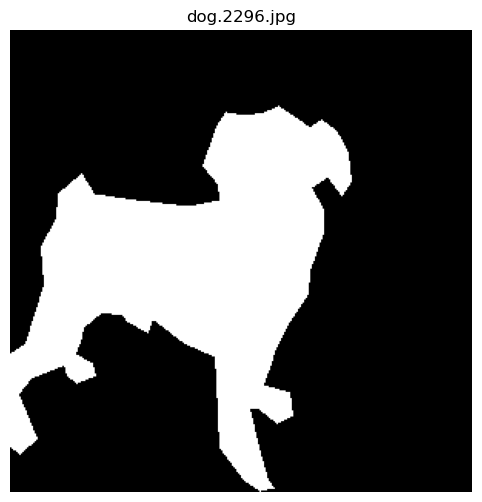

Processed and saved: dog.2296.jpg


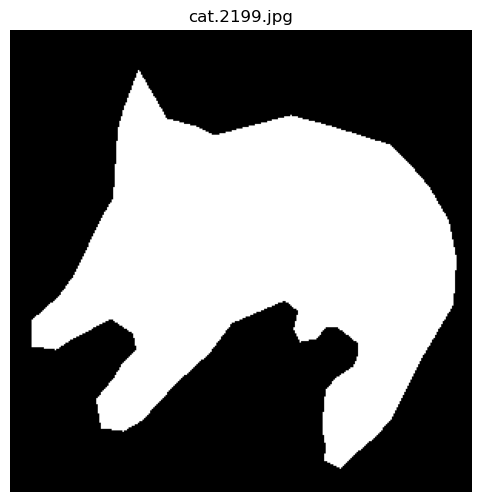

Processed and saved: cat.2199.jpg


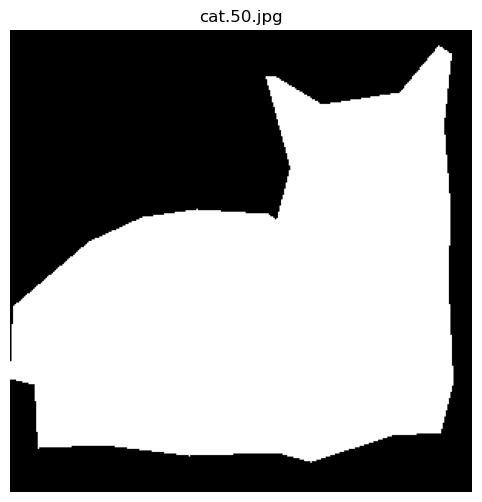

Processed and saved: cat.50.jpg


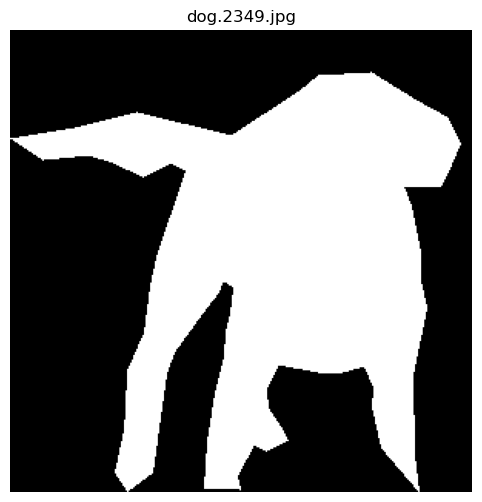

Processed and saved: dog.2349.jpg


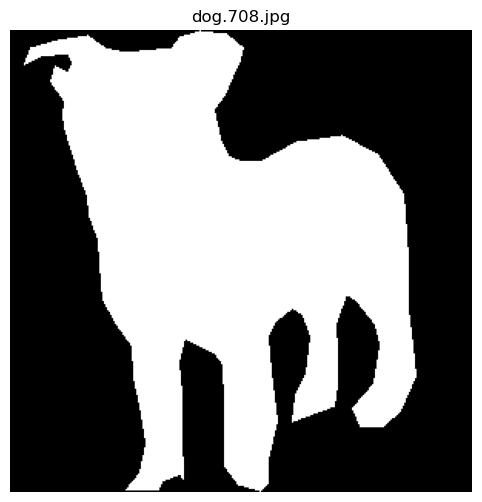

Processed and saved: dog.708.jpg


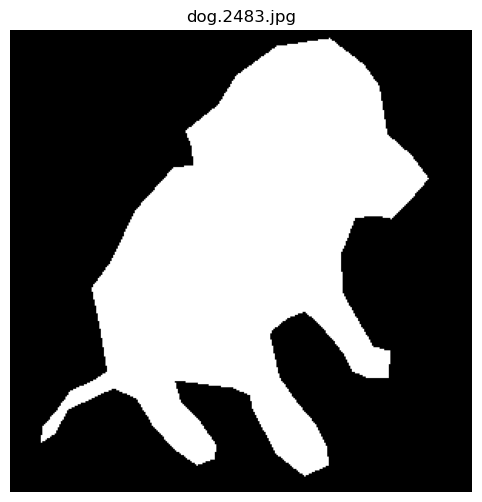

Processed and saved: dog.2483.jpg


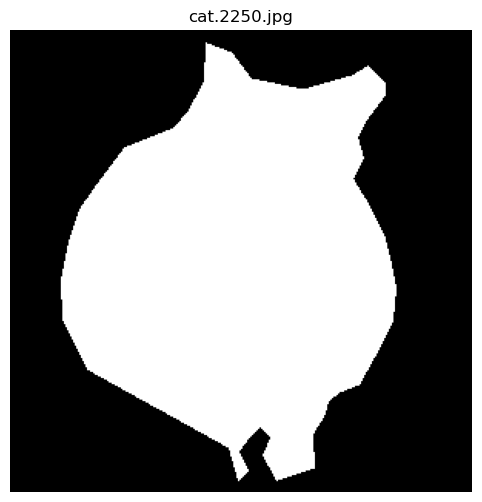

Processed and saved: cat.2250.jpg


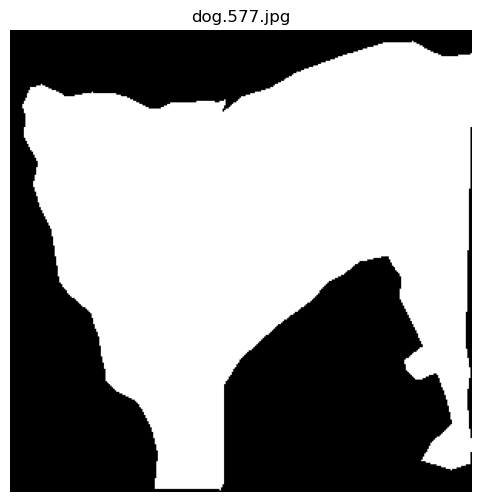

Processed and saved: dog.577.jpg


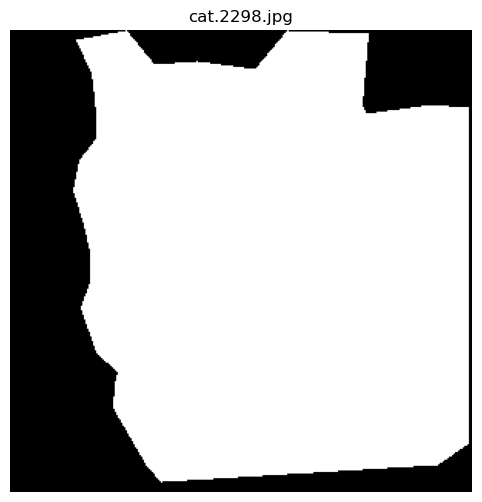

Processed and saved: cat.2298.jpg


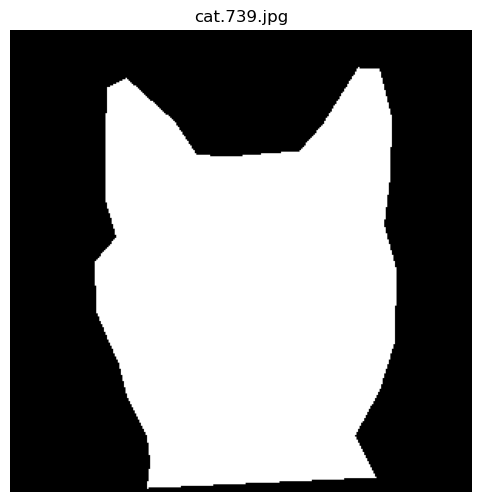

Processed and saved: cat.739.jpg


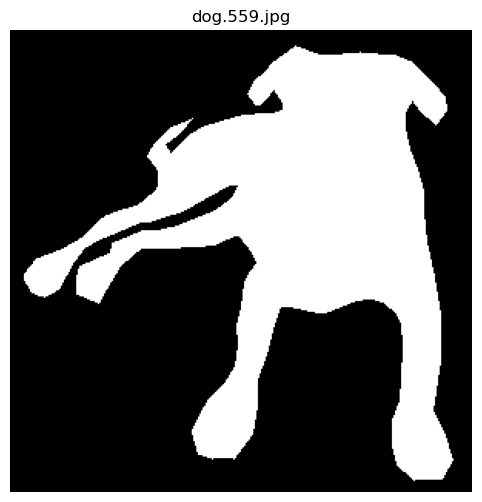

Processed and saved: dog.559.jpg


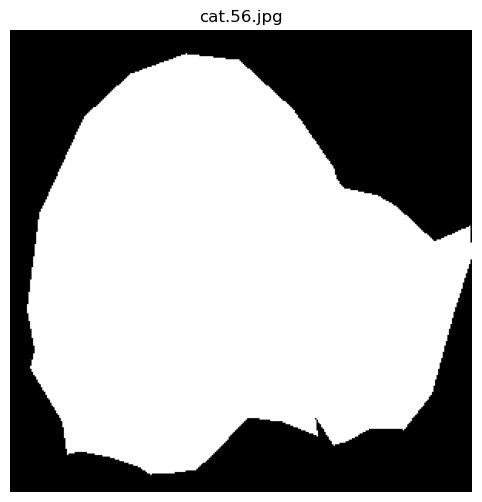

Processed and saved: cat.56.jpg


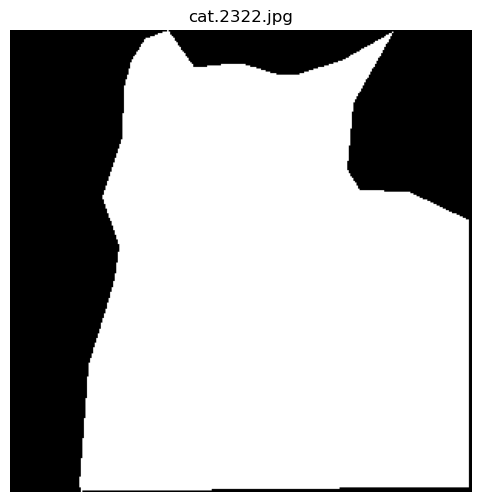

Processed and saved: cat.2322.jpg


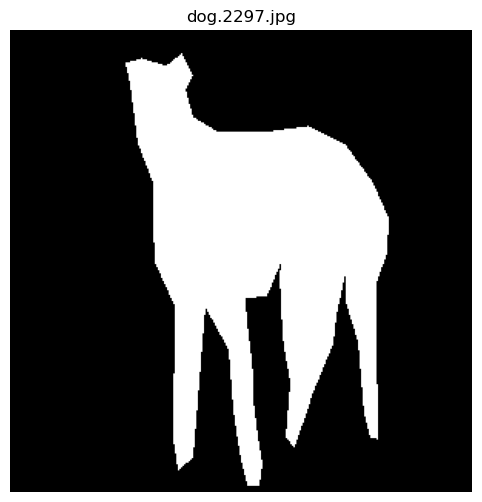

Processed and saved: dog.2297.jpg


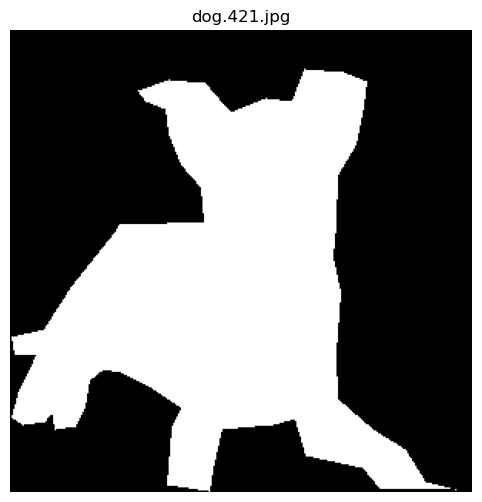

Processed and saved: dog.421.jpg


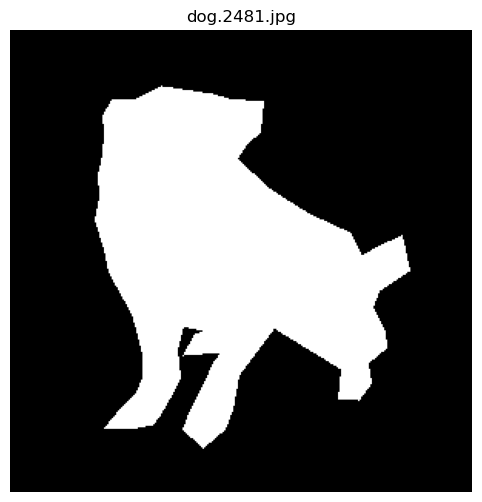

Processed and saved: dog.2481.jpg


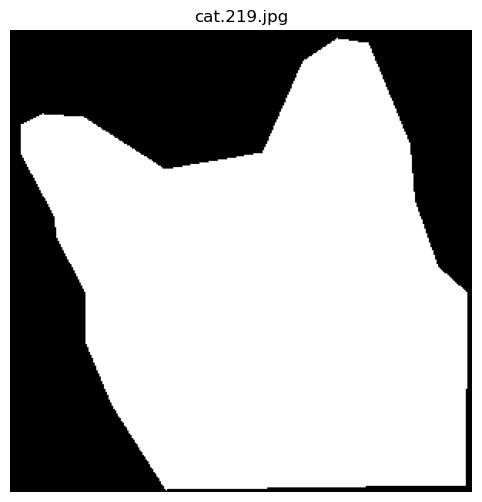

Processed and saved: cat.219.jpg


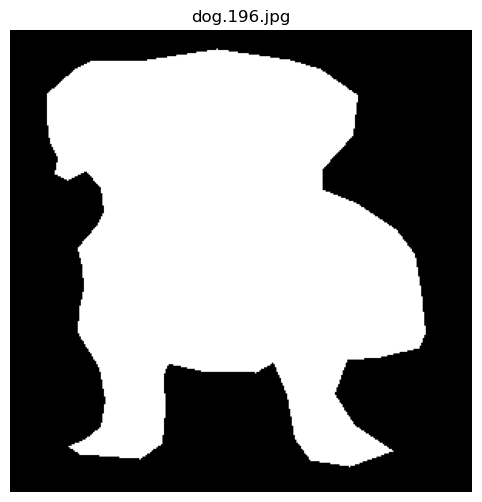

Processed and saved: dog.196.jpg


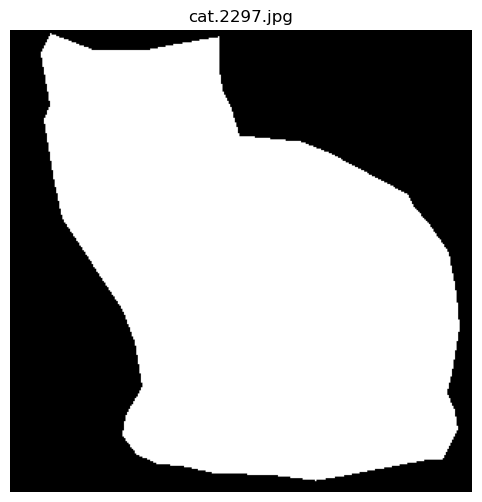

Processed and saved: cat.2297.jpg


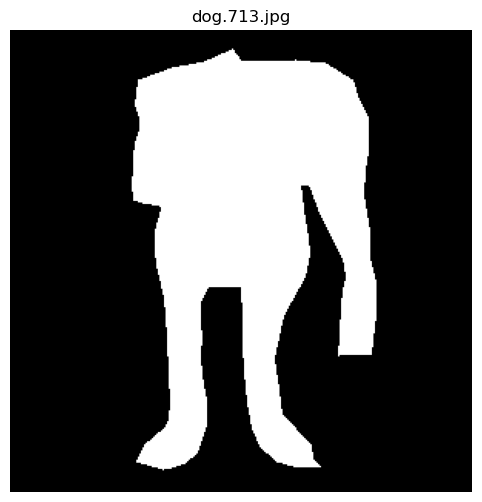

Processed and saved: dog.713.jpg


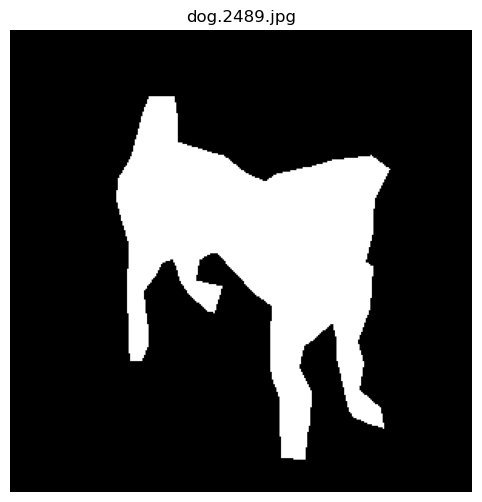

Processed and saved: dog.2489.jpg


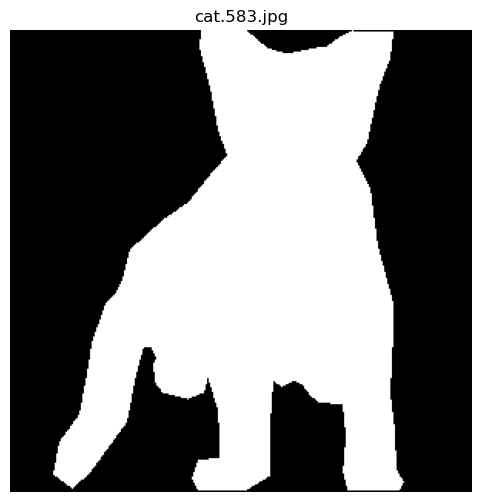

Processed and saved: cat.583.jpg


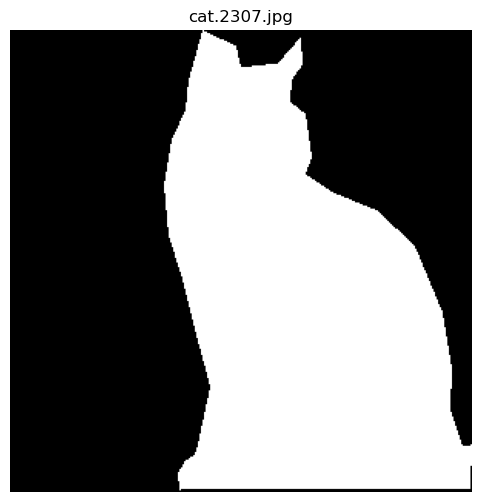

Processed and saved: cat.2307.jpg


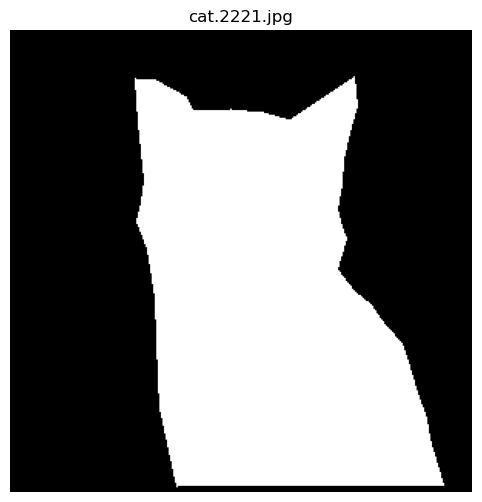

Processed and saved: cat.2221.jpg


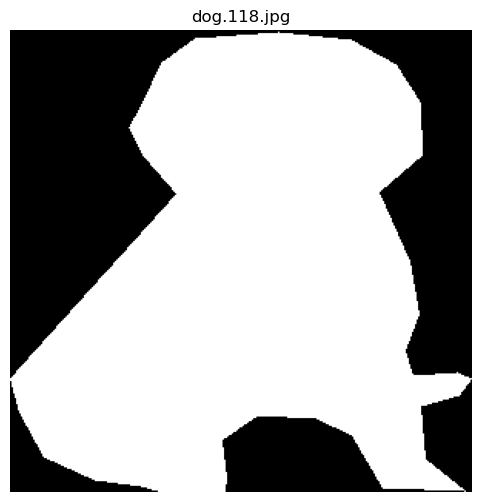

Processed and saved: dog.118.jpg


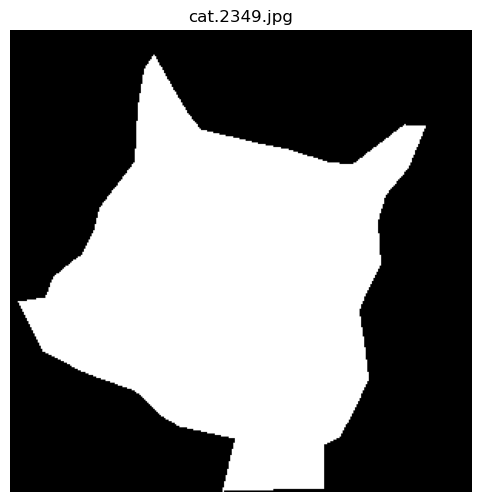

Processed and saved: cat.2349.jpg


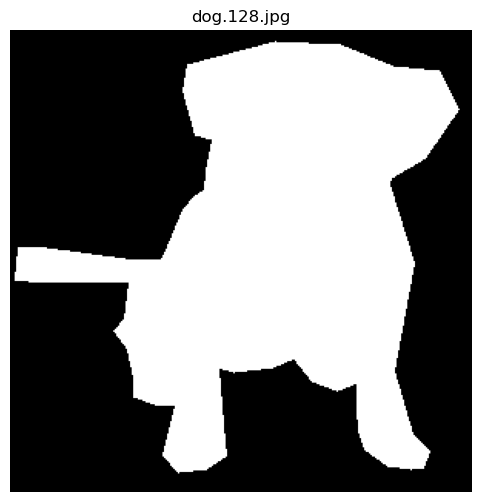

Processed and saved: dog.128.jpg


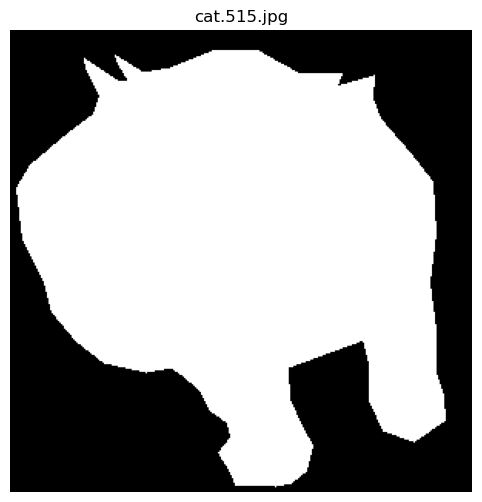

Processed and saved: cat.515.jpg


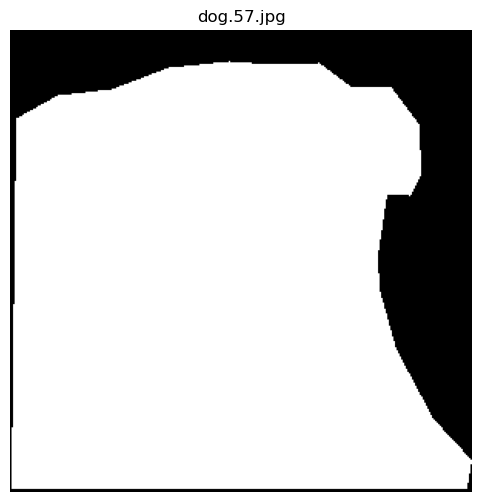

Processed and saved: dog.57.jpg


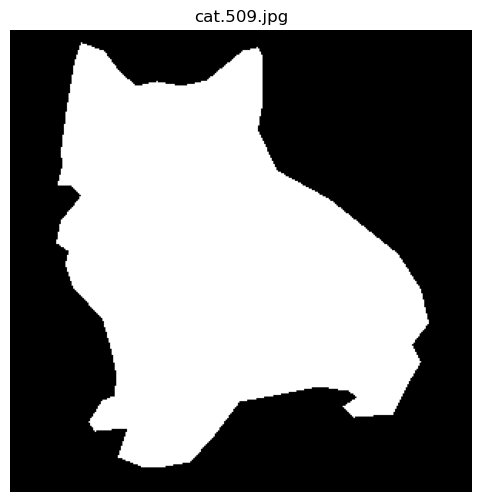

Processed and saved: cat.509.jpg


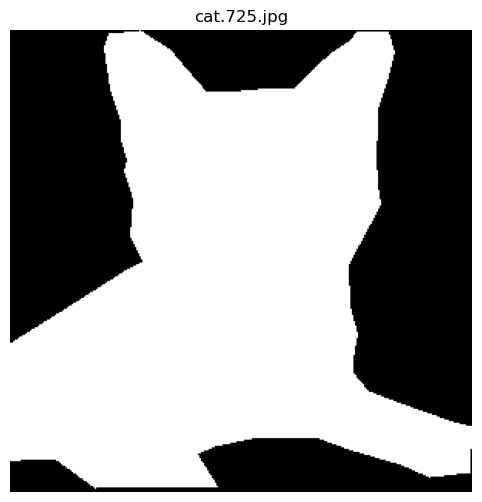

Processed and saved: cat.725.jpg


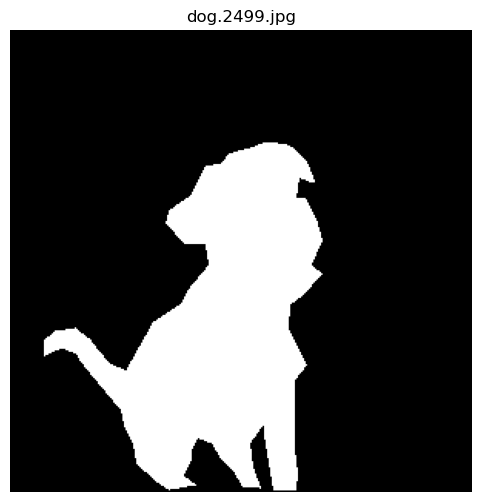

Processed and saved: dog.2499.jpg


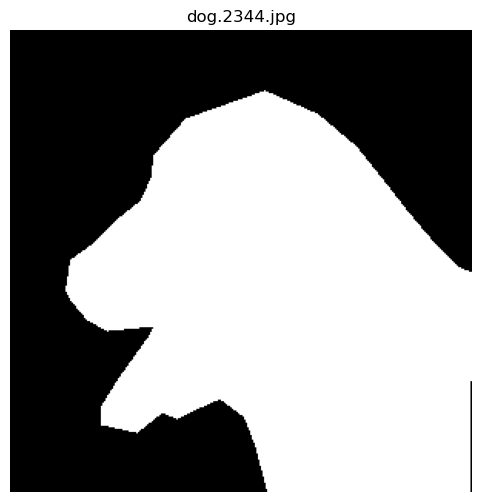

Processed and saved: dog.2344.jpg


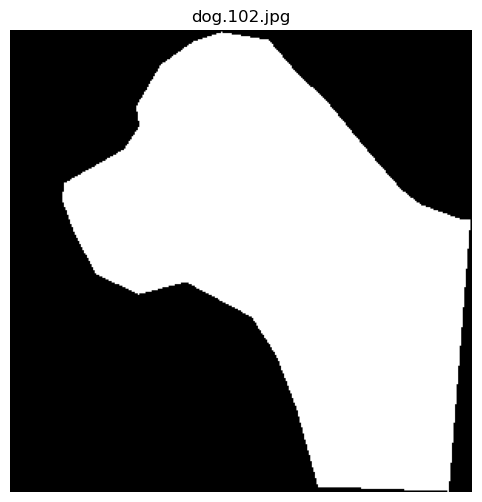

Processed and saved: dog.102.jpg


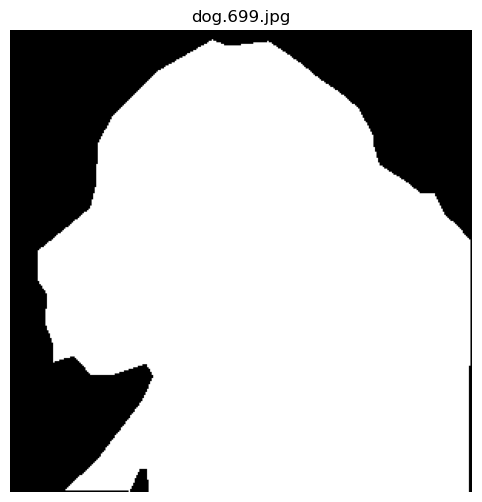

Processed and saved: dog.699.jpg


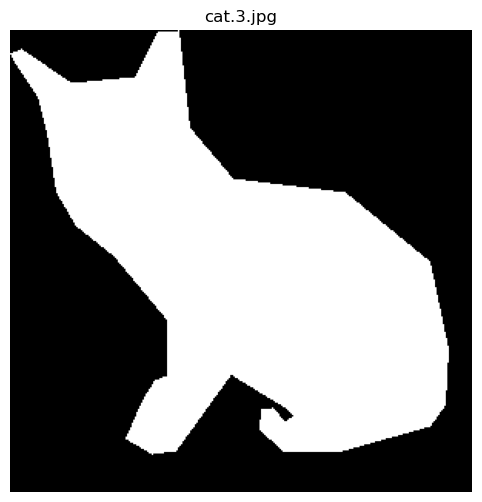

Processed and saved: cat.3.jpg


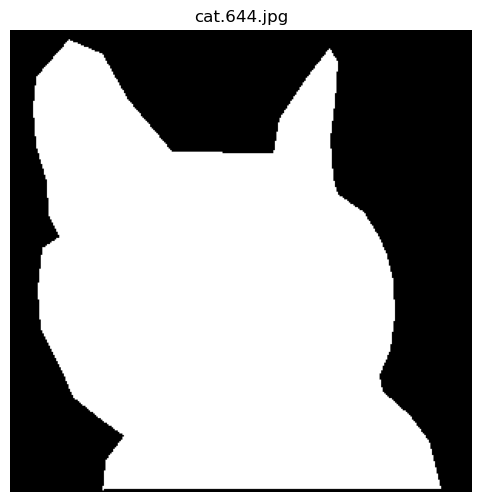

Processed and saved: cat.644.jpg


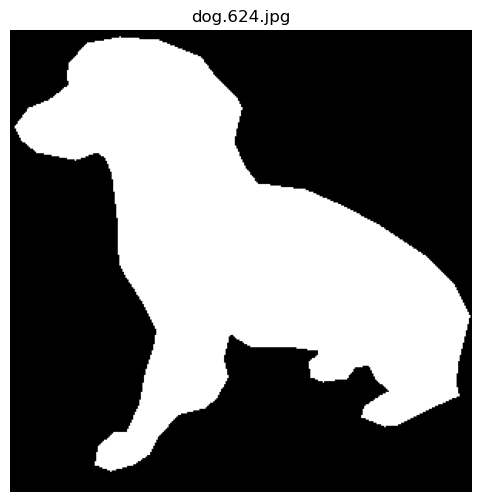

Processed and saved: dog.624.jpg


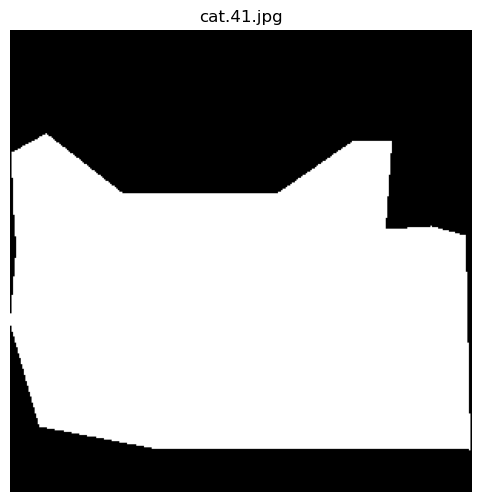

Processed and saved: cat.41.jpg


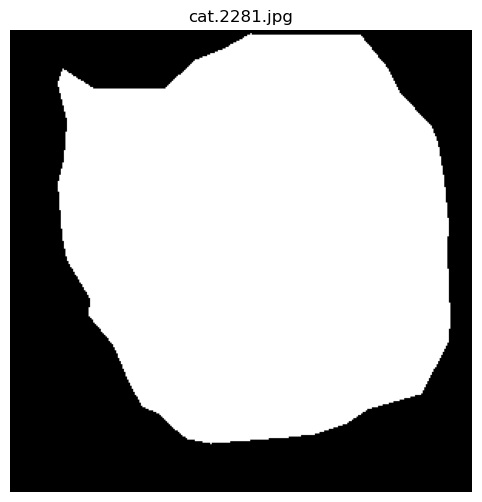

Processed and saved: cat.2281.jpg


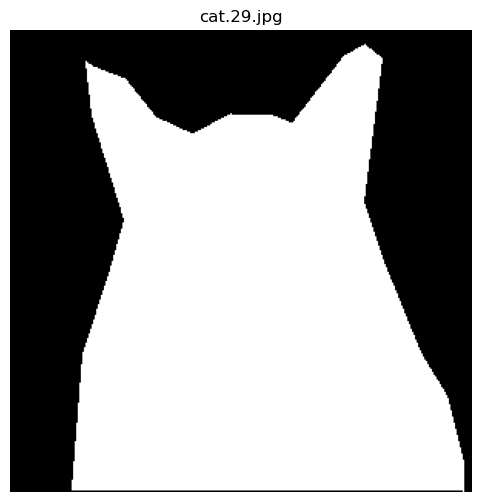

Processed and saved: cat.29.jpg


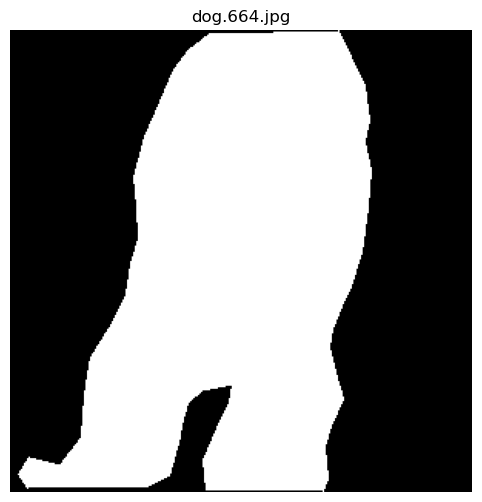

Processed and saved: dog.664.jpg


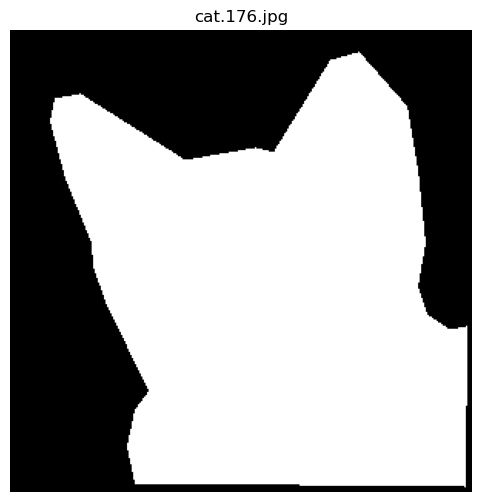

Processed and saved: cat.176.jpg


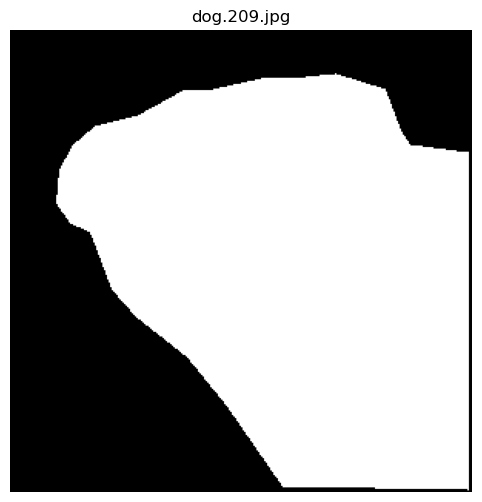

Processed and saved: dog.209.jpg


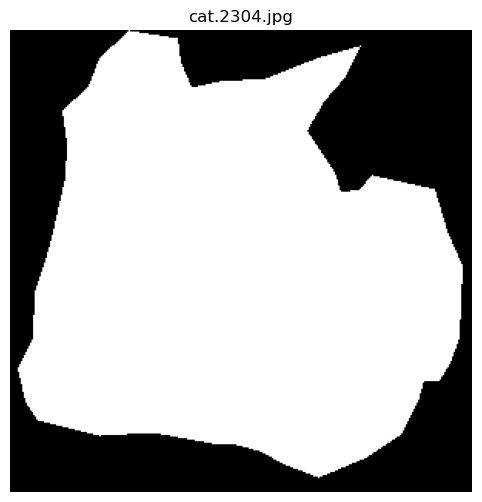

Processed and saved: cat.2304.jpg


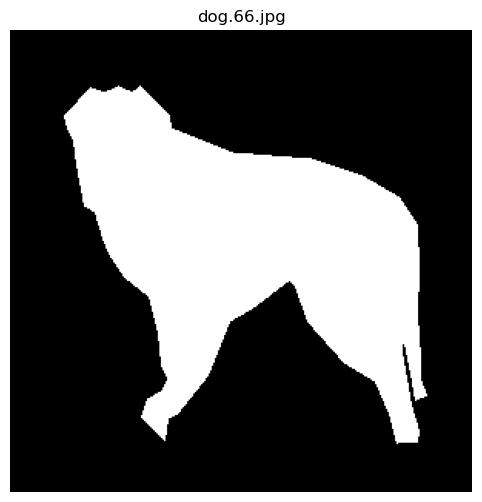

Processed and saved: dog.66.jpg


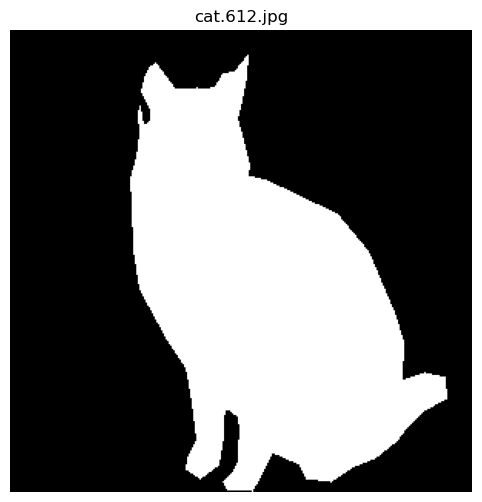

Processed and saved: cat.612.jpg


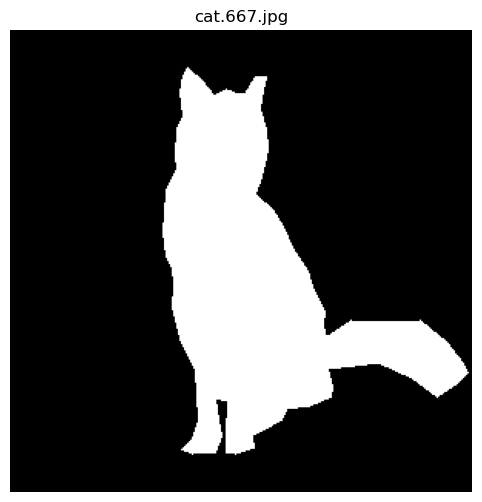

Processed and saved: cat.667.jpg


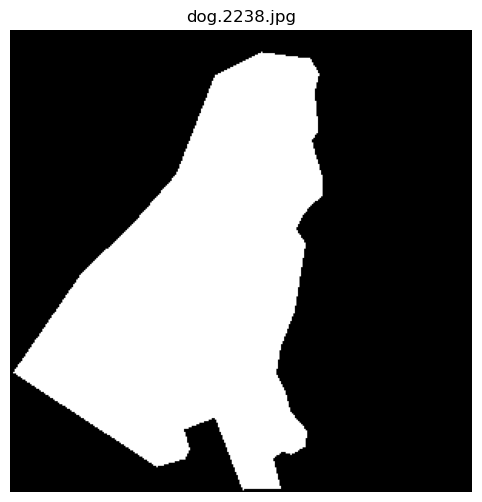

Processed and saved: dog.2238.jpg


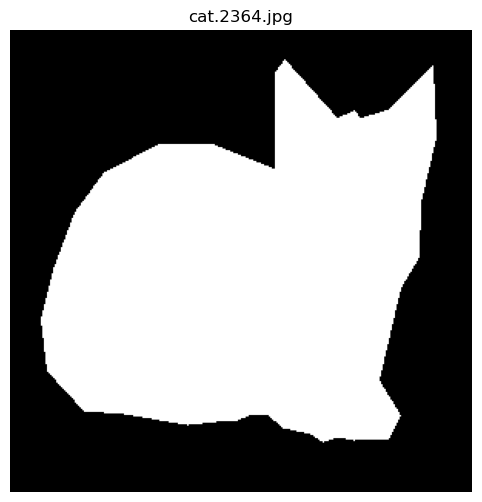

Processed and saved: cat.2364.jpg


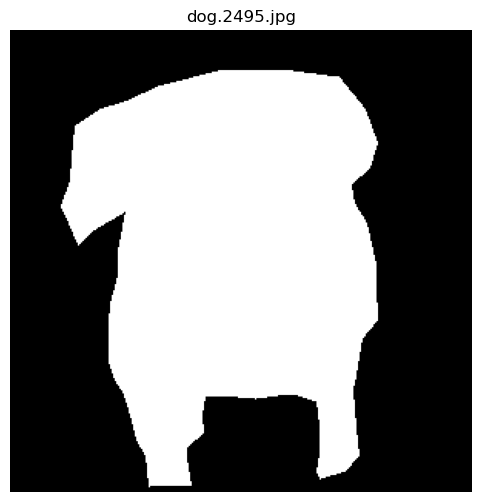

Processed and saved: dog.2495.jpg


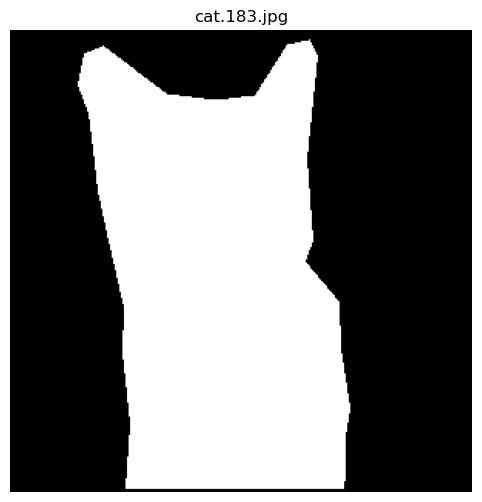

Processed and saved: cat.183.jpg


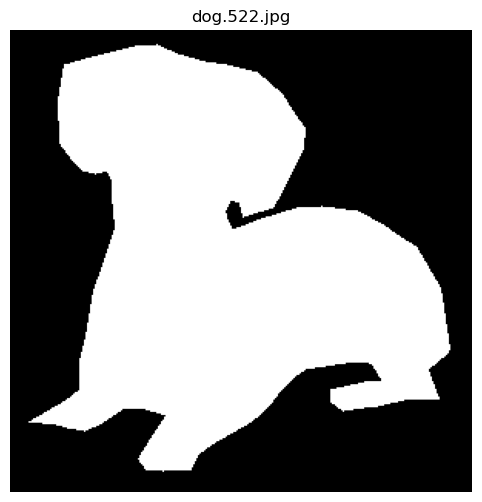

Processed and saved: dog.522.jpg


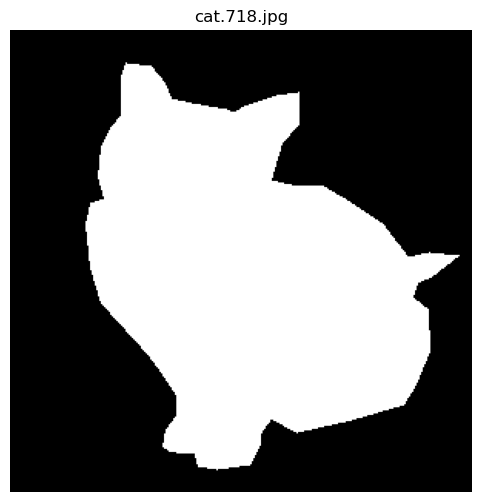

Processed and saved: cat.718.jpg


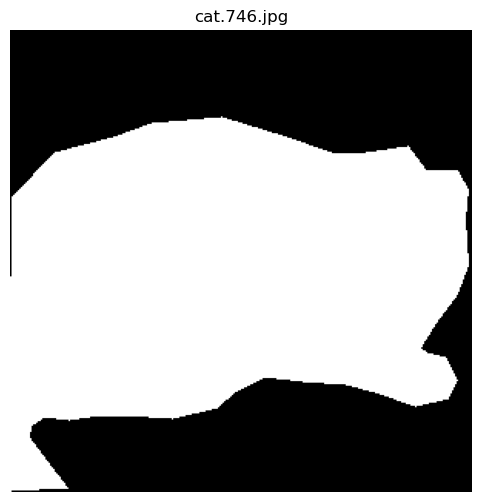

Processed and saved: cat.746.jpg


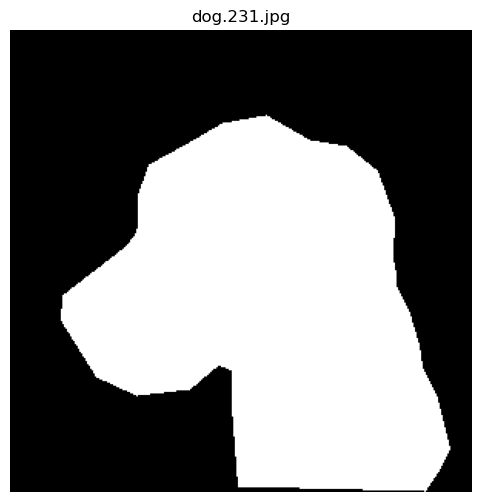

Processed and saved: dog.231.jpg


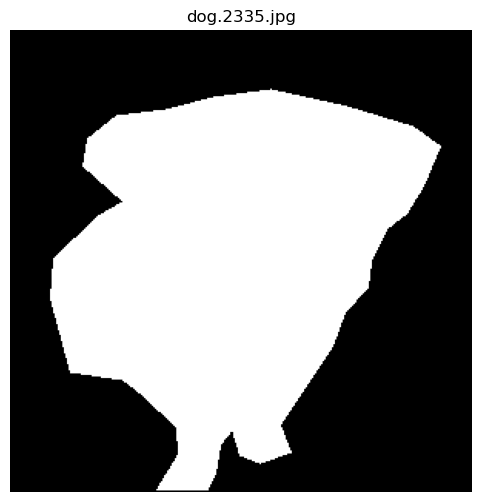

Processed and saved: dog.2335.jpg


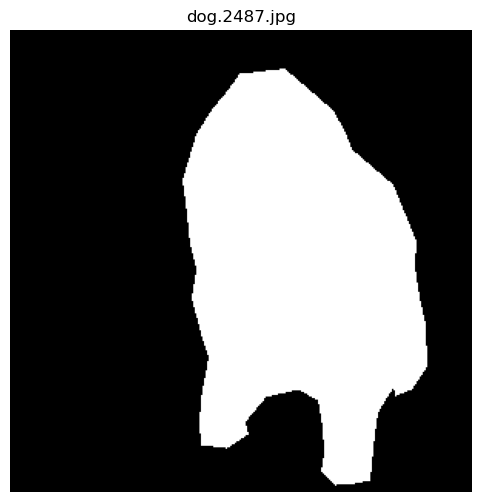

Processed and saved: dog.2487.jpg


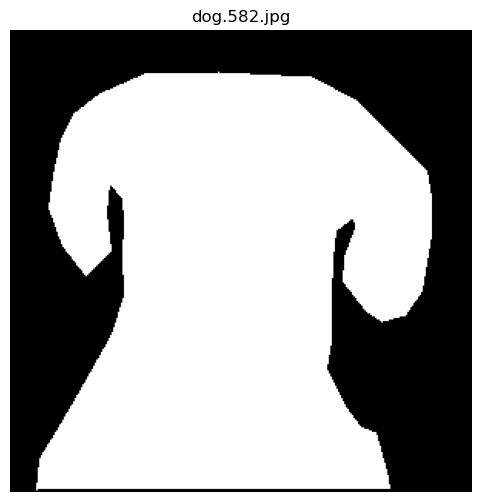

Processed and saved: dog.582.jpg


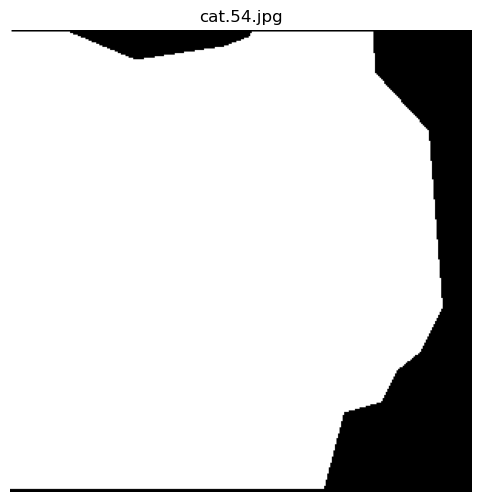

Processed and saved: cat.54.jpg


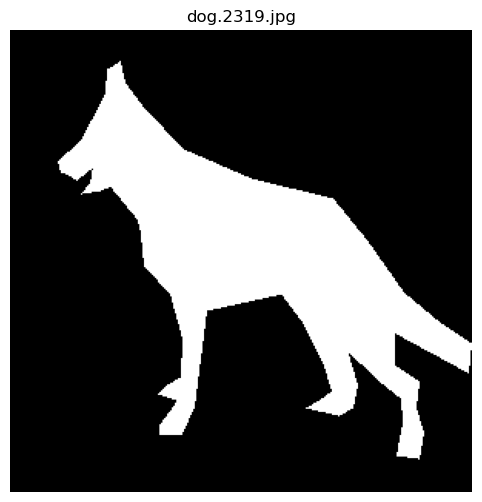

Processed and saved: dog.2319.jpg


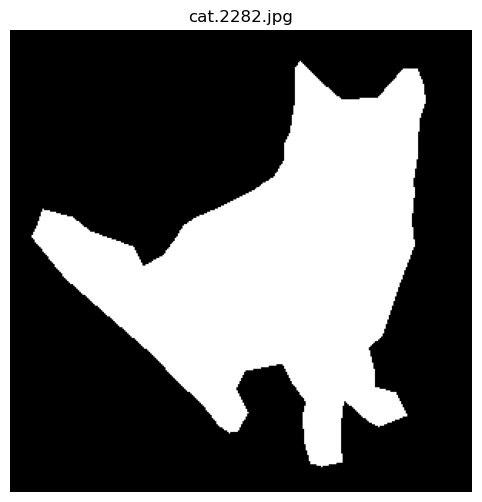

Processed and saved: cat.2282.jpg


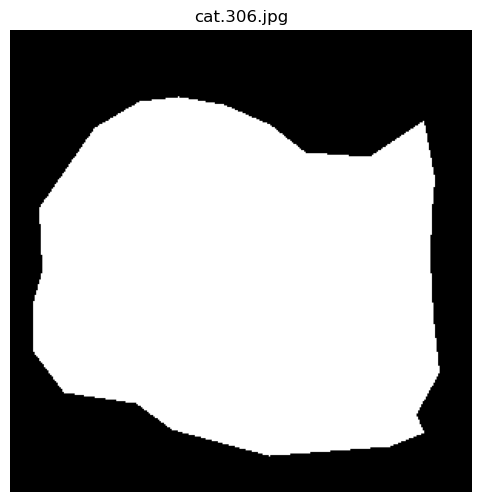

Processed and saved: cat.306.jpg


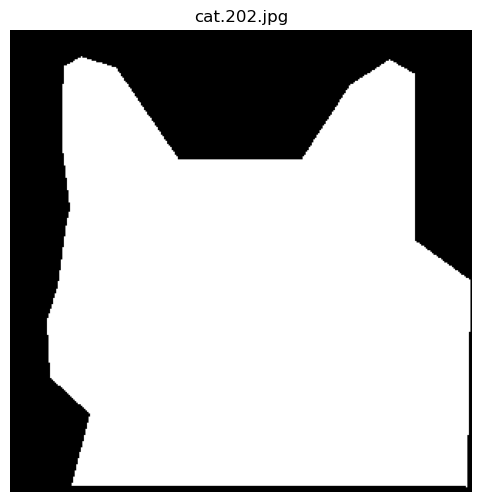

Processed and saved: cat.202.jpg


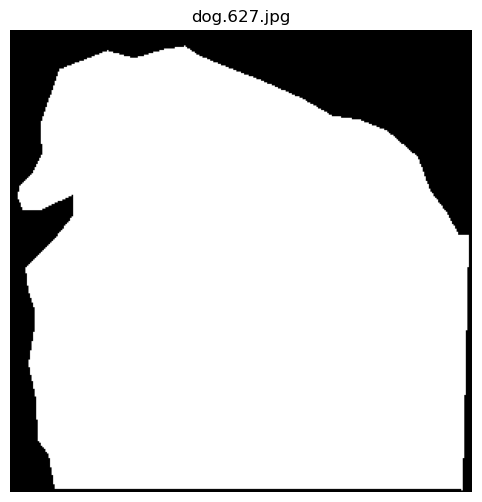

Processed and saved: dog.627.jpg


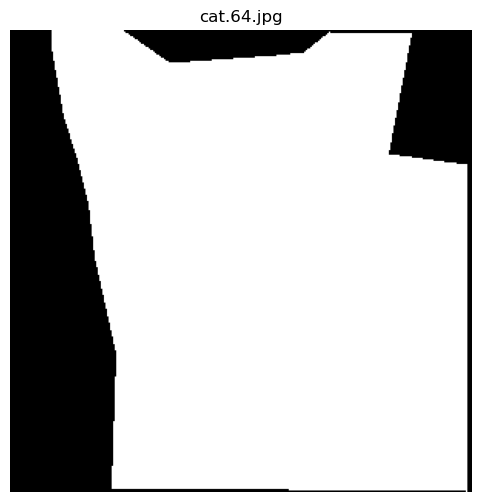

Processed and saved: cat.64.jpg


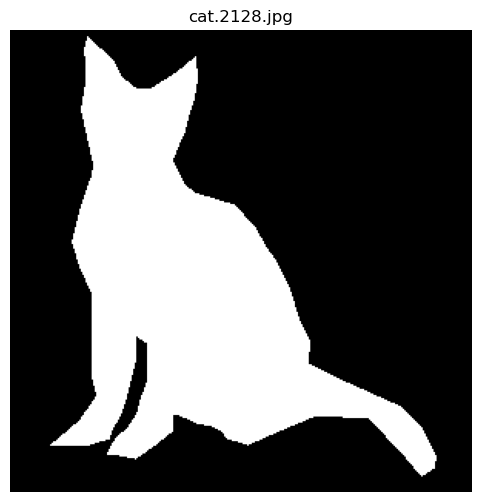

Processed and saved: cat.2128.jpg


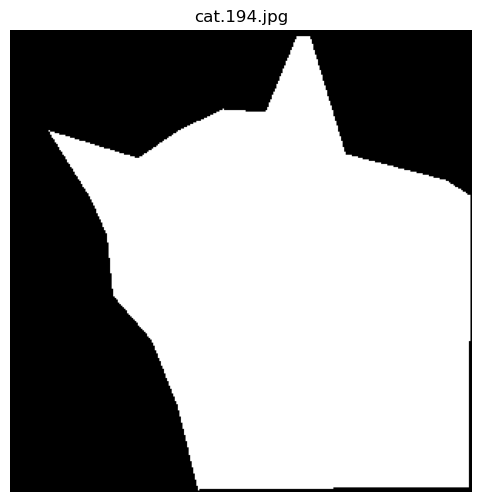

Processed and saved: cat.194.jpg


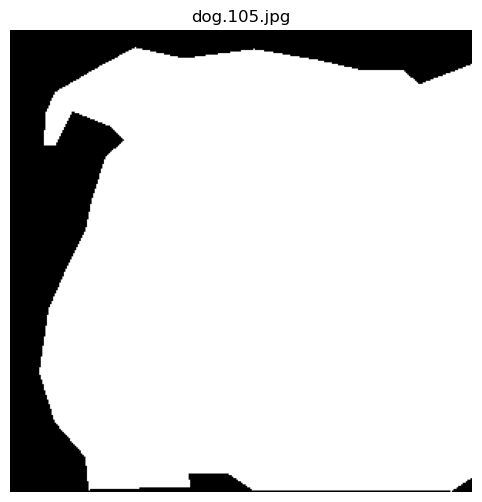

Processed and saved: dog.105.jpg


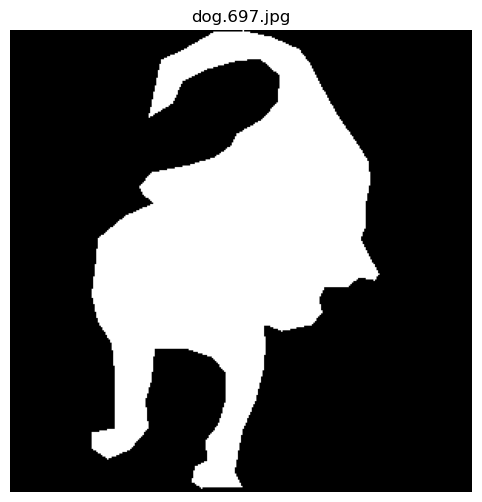

Processed and saved: dog.697.jpg


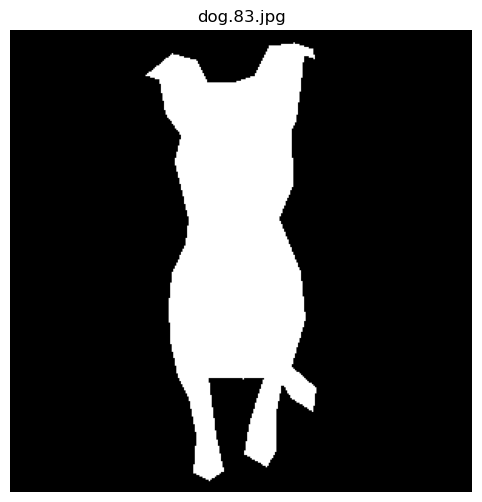

Processed and saved: dog.83.jpg


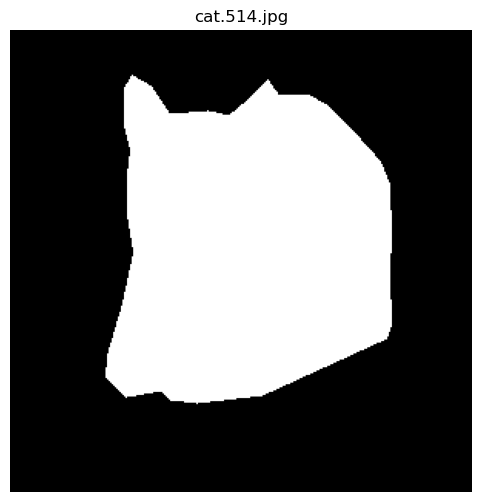

Processed and saved: cat.514.jpg


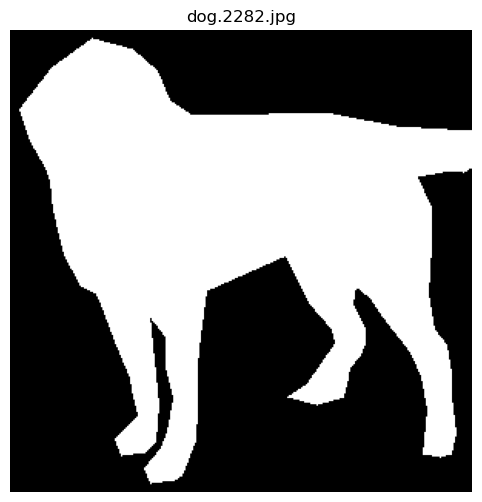

Processed and saved: dog.2282.jpg


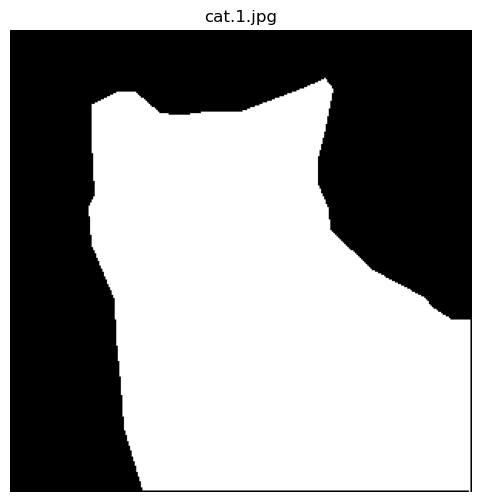

Processed and saved: cat.1.jpg


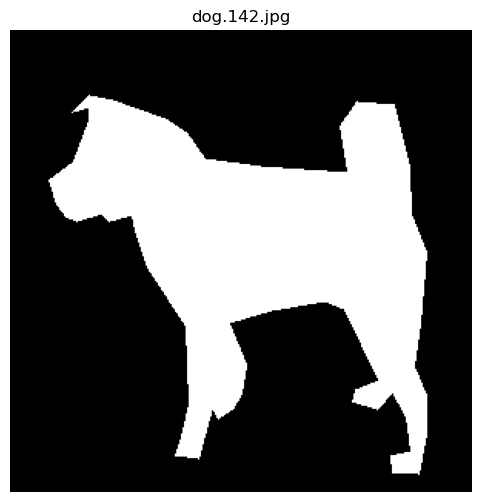

Processed and saved: dog.142.jpg


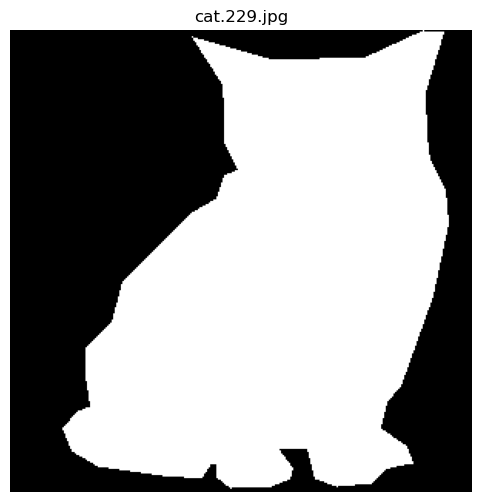

Processed and saved: cat.229.jpg


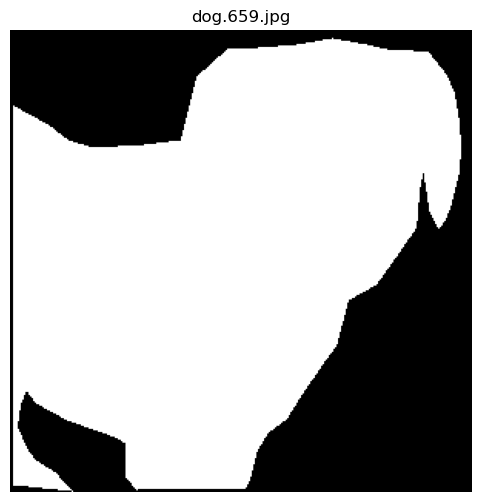

Processed and saved: dog.659.jpg


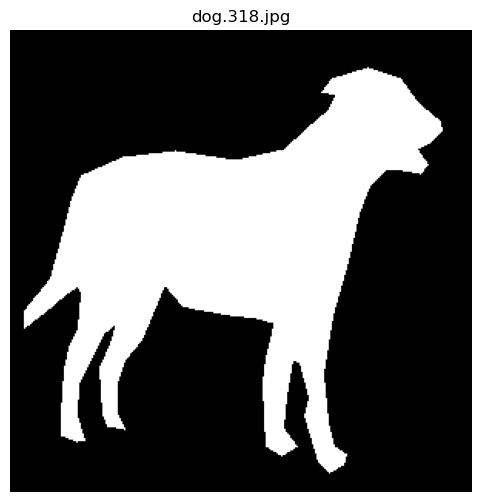

Processed and saved: dog.318.jpg


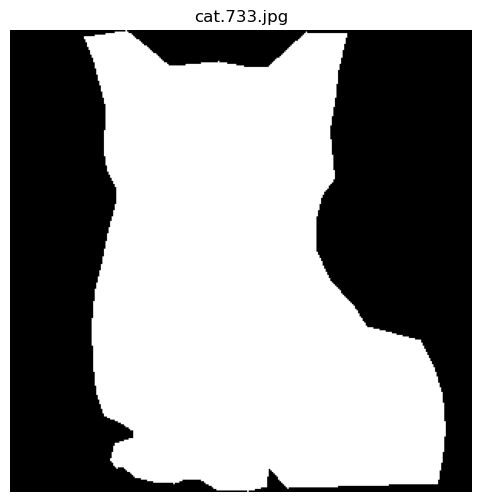

Processed and saved: cat.733.jpg


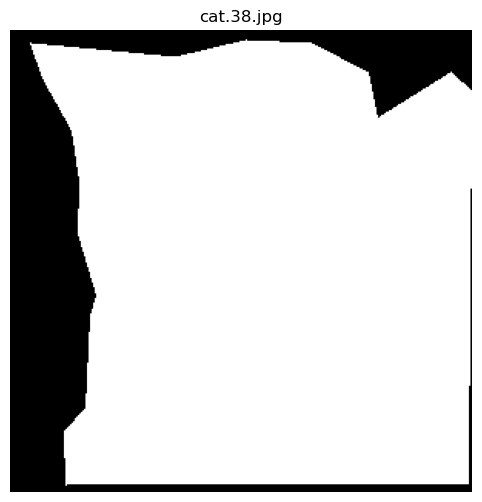

Processed and saved: cat.38.jpg


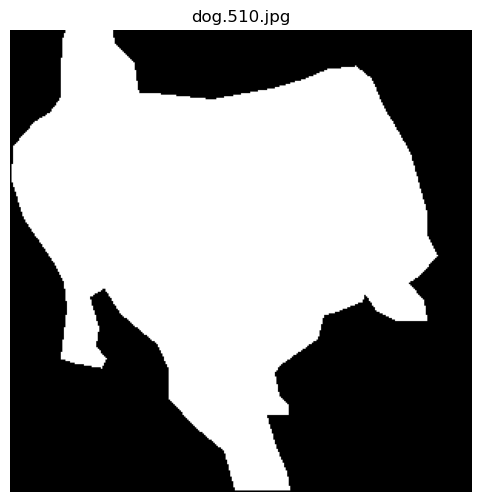

Processed and saved: dog.510.jpg


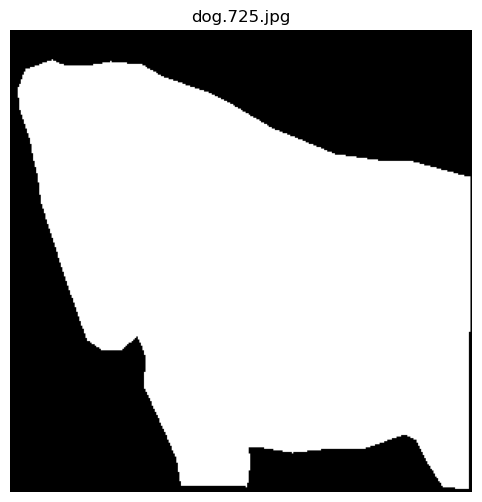

Processed and saved: dog.725.jpg


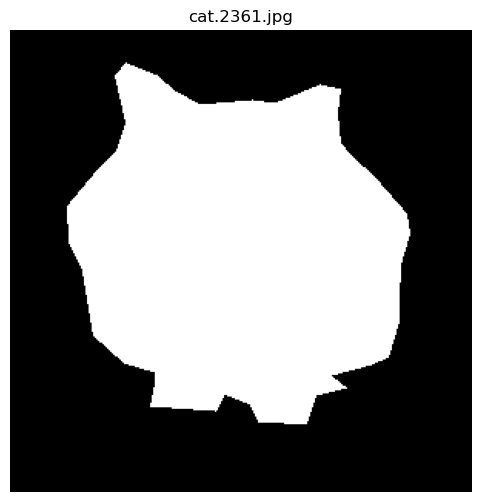

Processed and saved: cat.2361.jpg


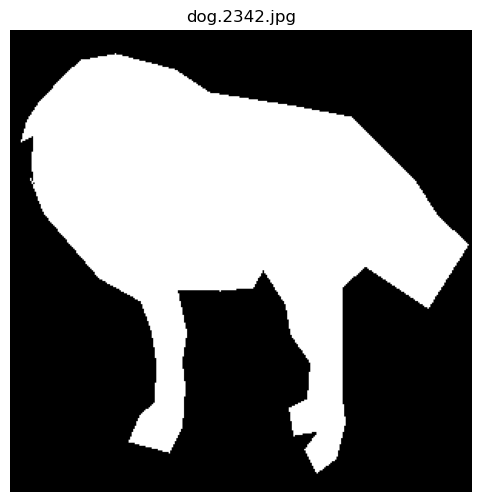

Processed and saved: dog.2342.jpg


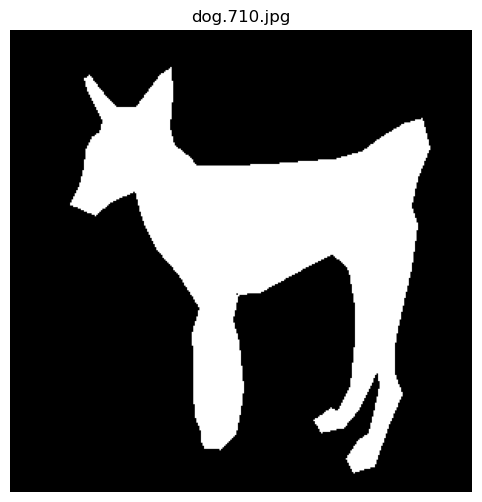

Processed and saved: dog.710.jpg


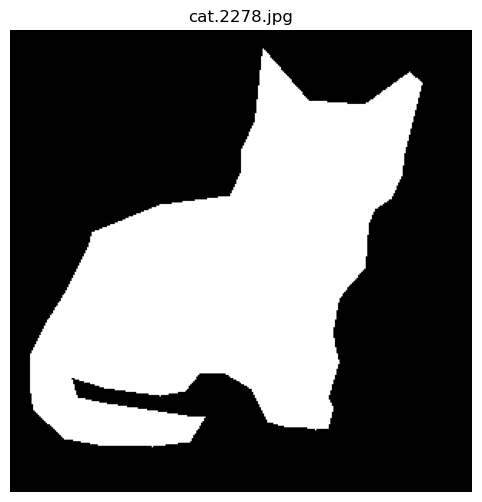

Processed and saved: cat.2278.jpg


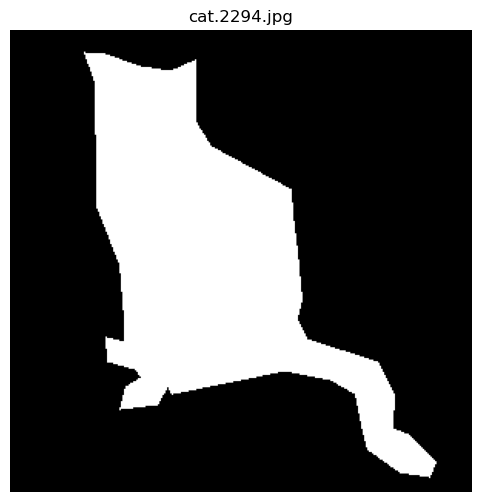

Processed and saved: cat.2294.jpg


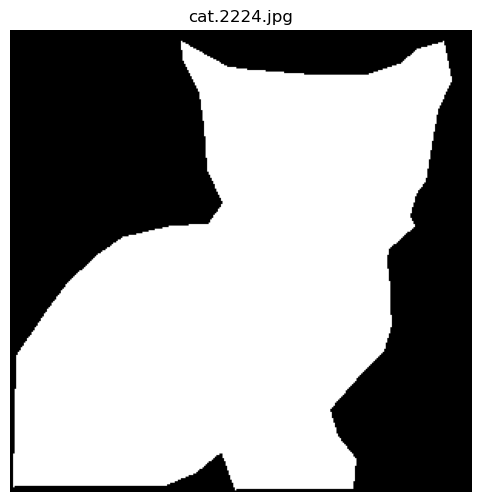

Processed and saved: cat.2224.jpg


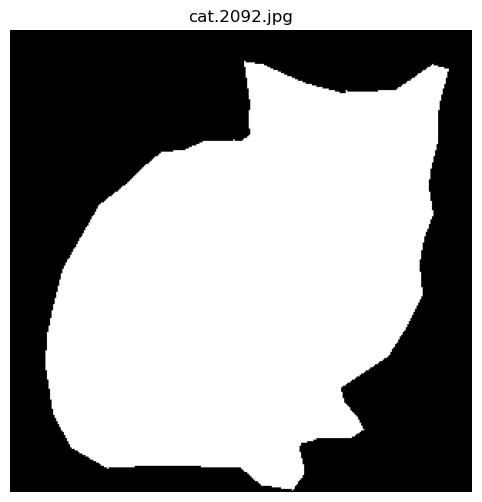

Processed and saved: cat.2092.jpg


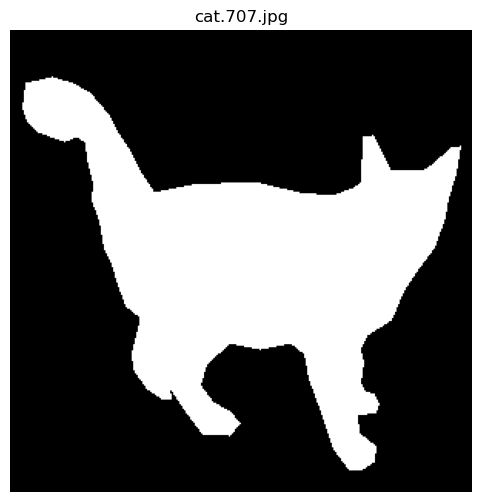

Processed and saved: cat.707.jpg


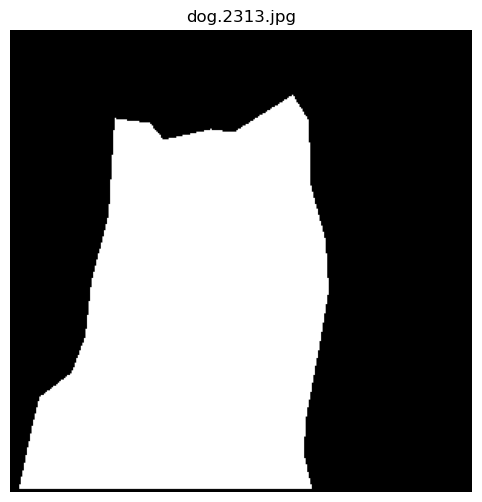

Processed and saved: dog.2313.jpg


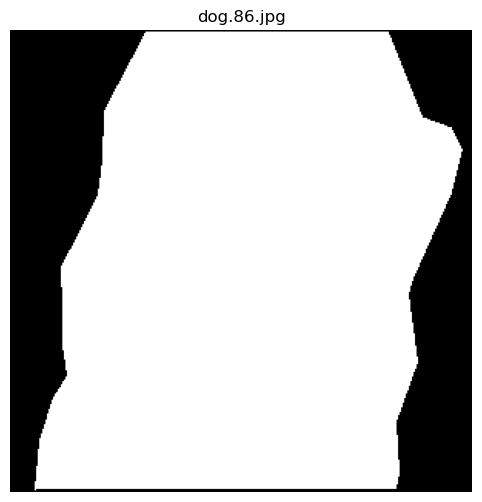

Processed and saved: dog.86.jpg


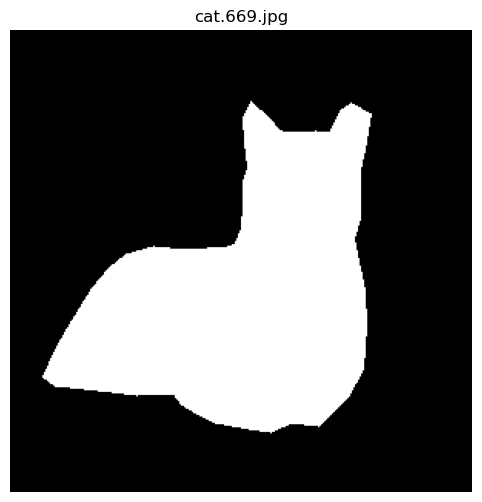

Processed and saved: cat.669.jpg


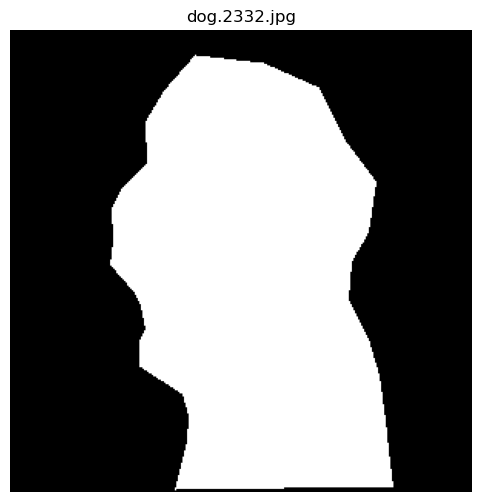

Processed and saved: dog.2332.jpg


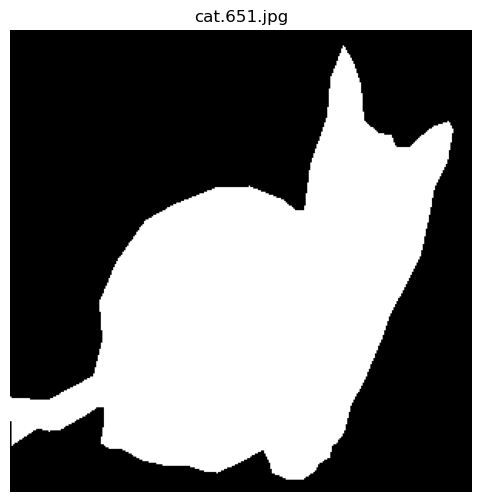

Processed and saved: cat.651.jpg


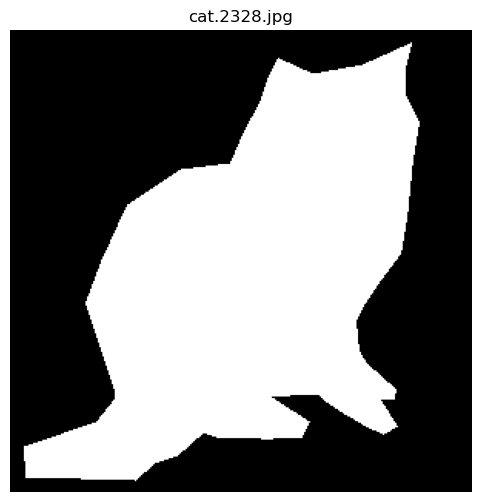

Processed and saved: cat.2328.jpg


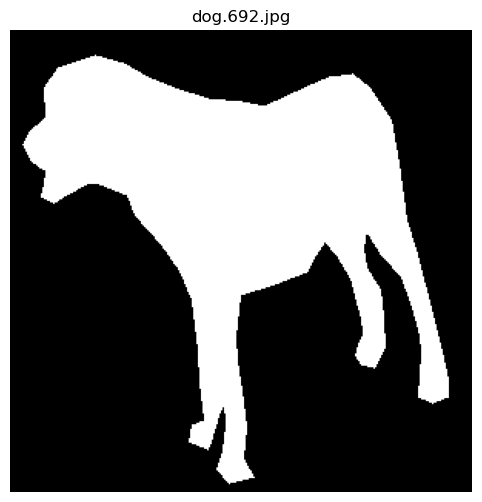

Processed and saved: dog.692.jpg


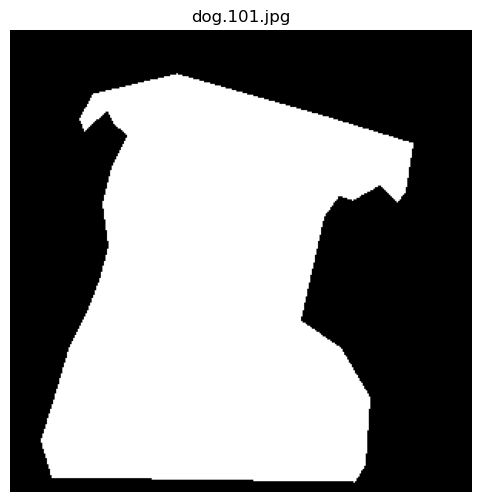

Processed and saved: dog.101.jpg


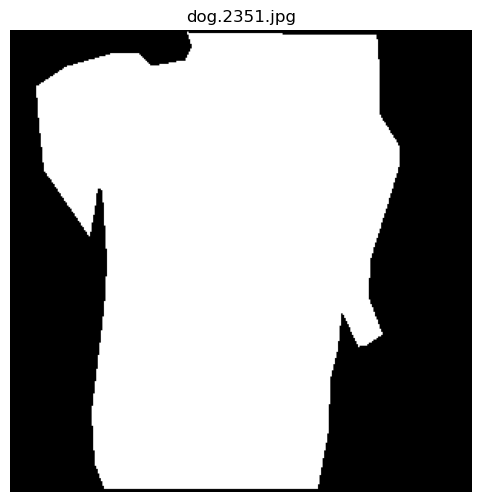

Processed and saved: dog.2351.jpg


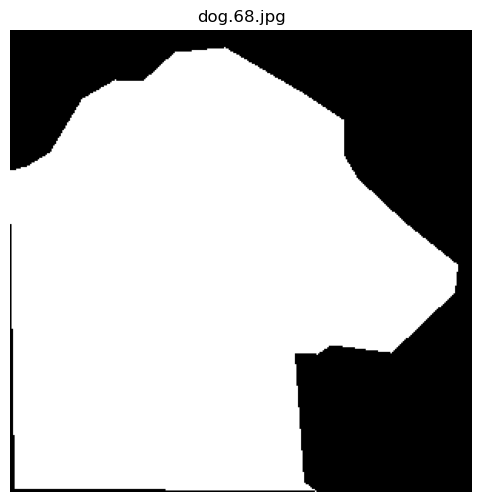

Processed and saved: dog.68.jpg


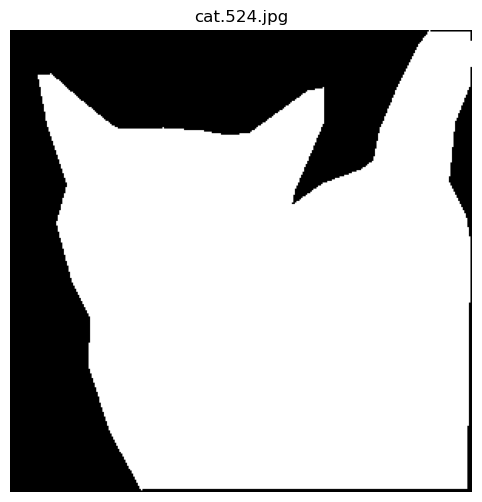

Processed and saved: cat.524.jpg


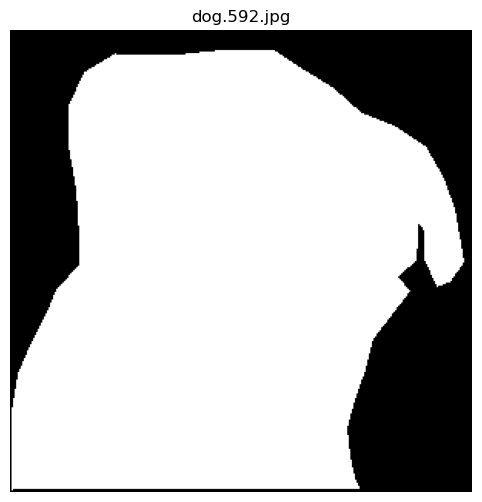

Processed and saved: dog.592.jpg


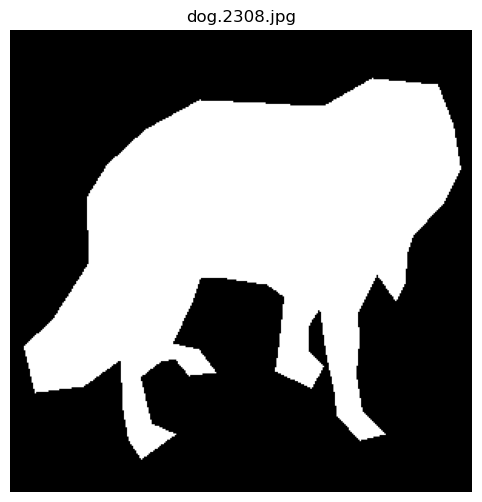

Processed and saved: dog.2308.jpg


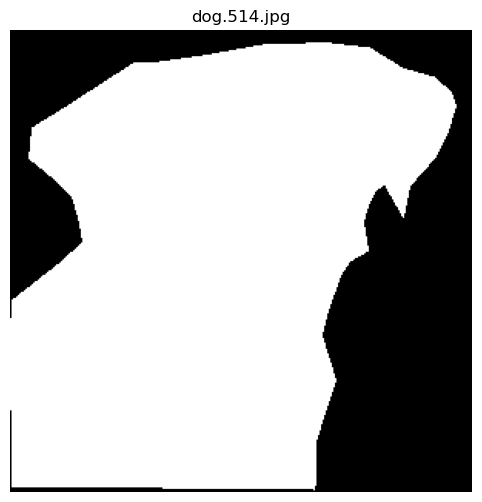

Processed and saved: dog.514.jpg


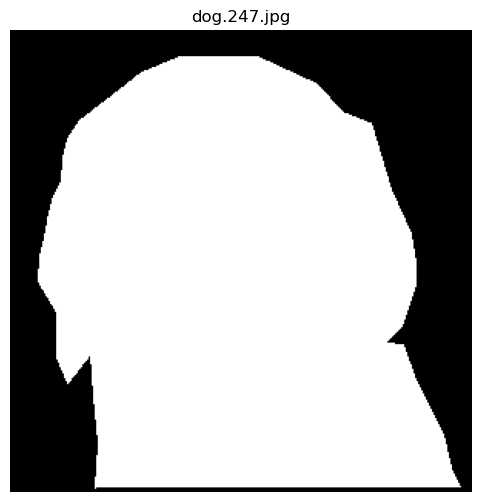

Processed and saved: dog.247.jpg


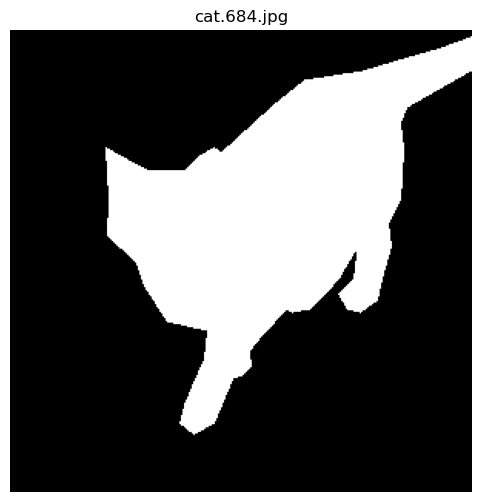

Processed and saved: cat.684.jpg


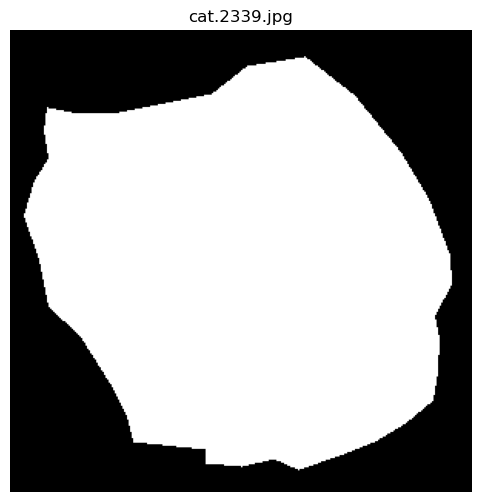

Processed and saved: cat.2339.jpg


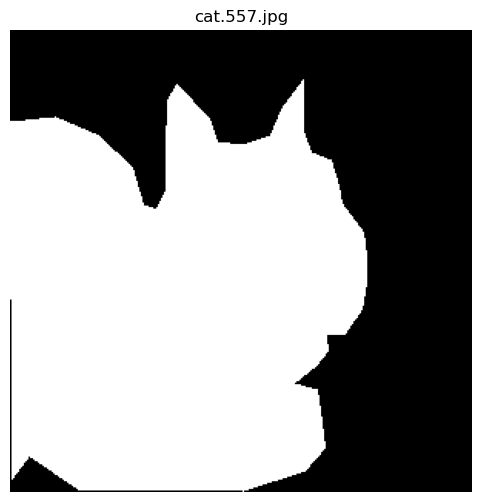

Processed and saved: cat.557.jpg


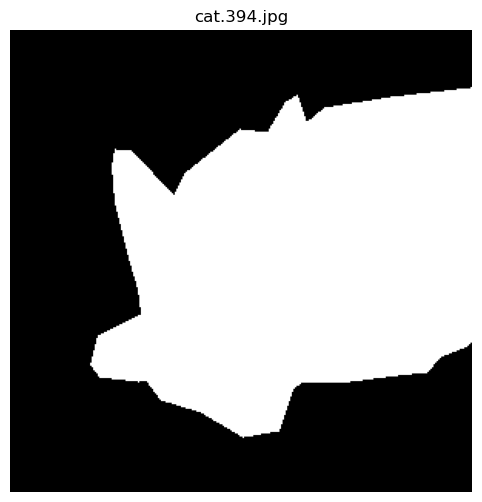

Processed and saved: cat.394.jpg


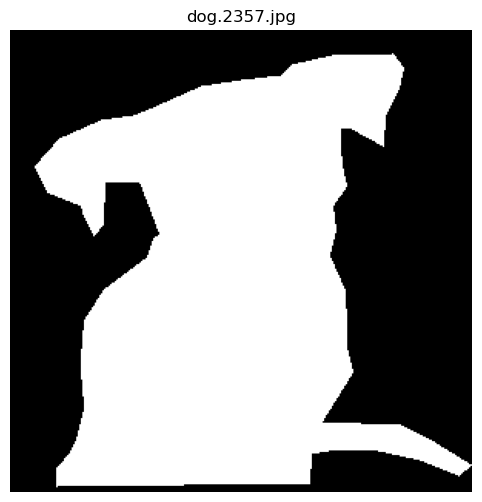

Processed and saved: dog.2357.jpg


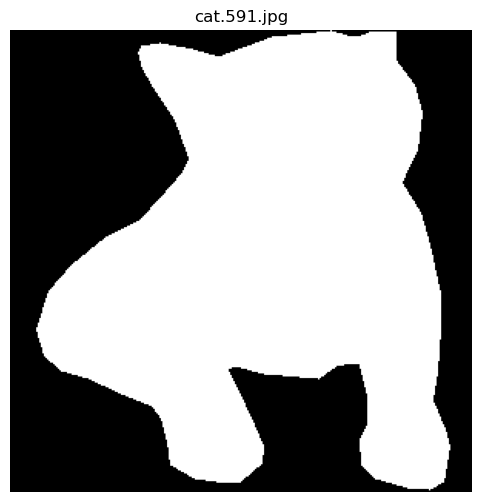

Processed and saved: cat.591.jpg


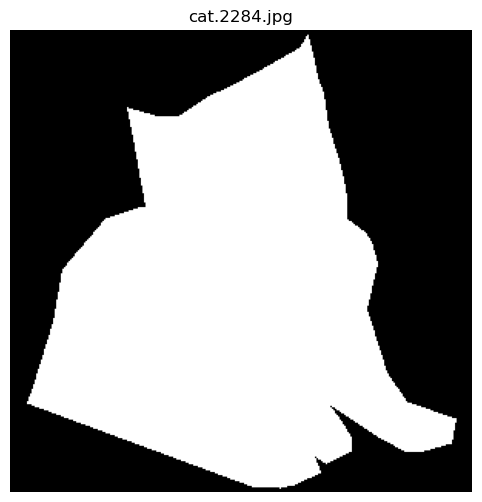

Processed and saved: cat.2284.jpg


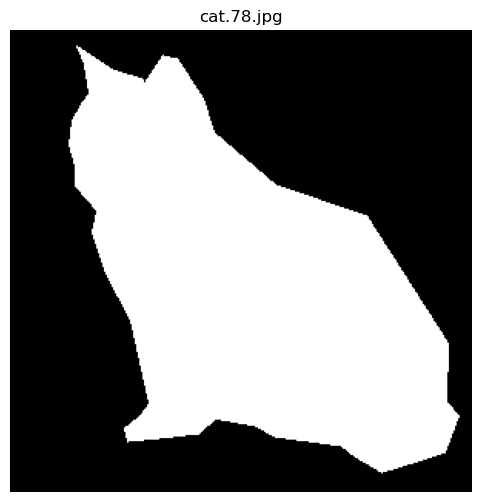

Processed and saved: cat.78.jpg


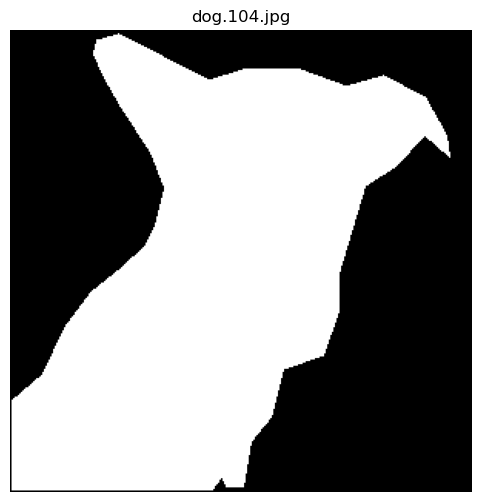

Processed and saved: dog.104.jpg


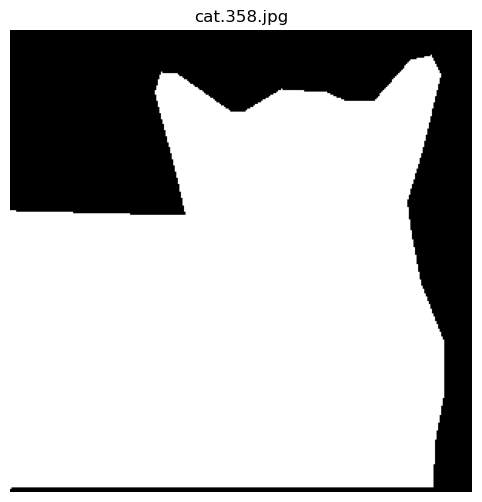

Processed and saved: cat.358.jpg


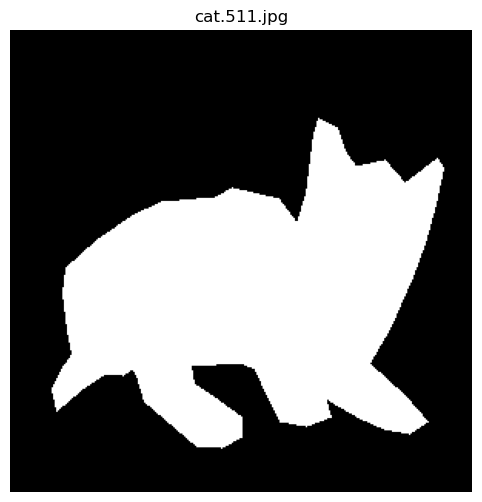

Processed and saved: cat.511.jpg


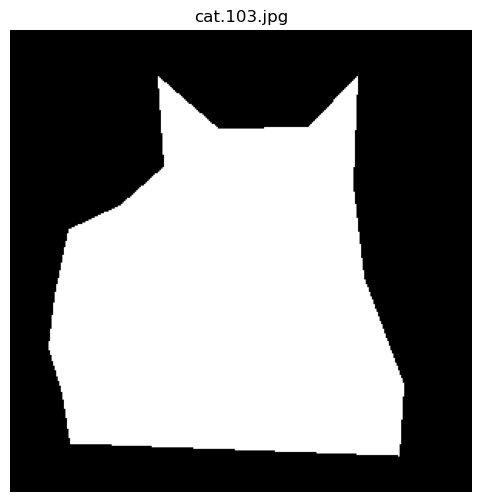

Processed and saved: cat.103.jpg


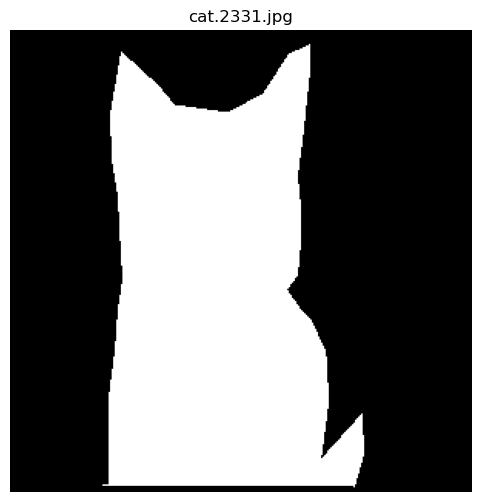

Processed and saved: cat.2331.jpg


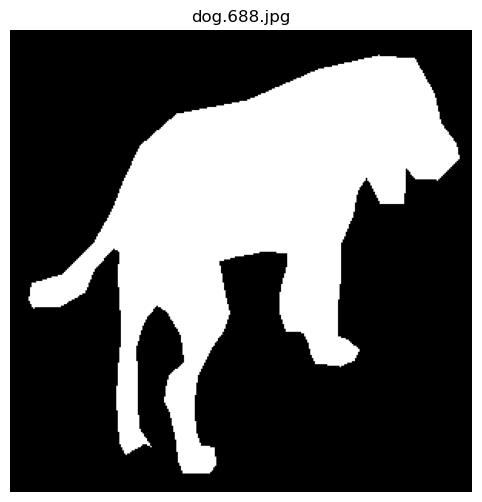

Processed and saved: dog.688.jpg


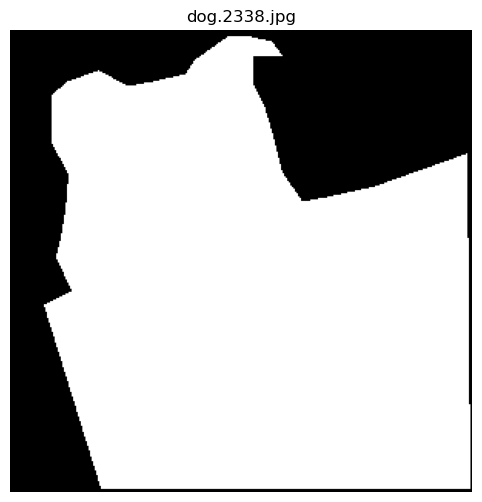

Processed and saved: dog.2338.jpg


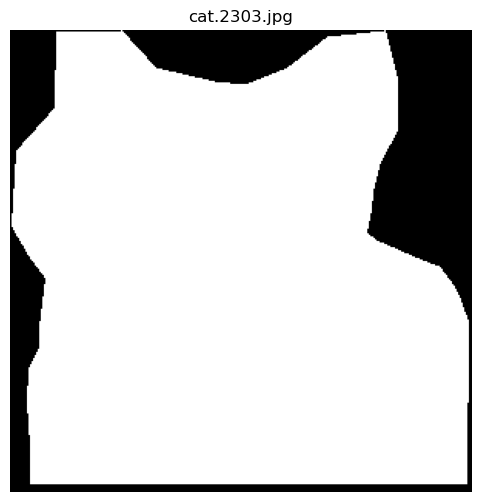

Processed and saved: cat.2303.jpg


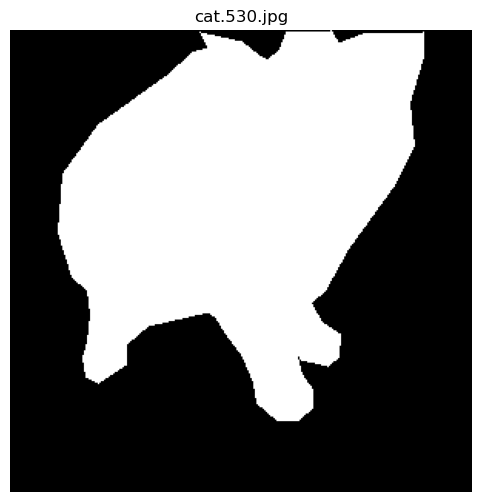

Processed and saved: cat.530.jpg


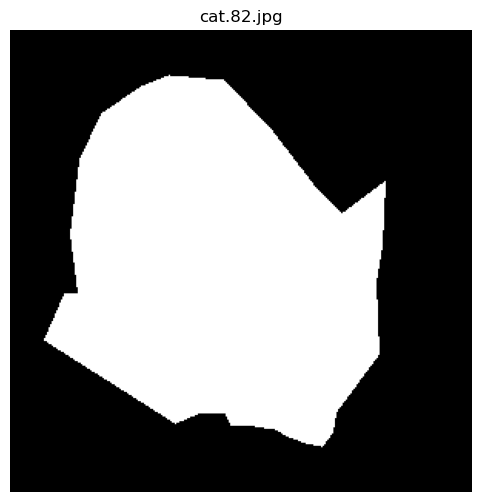

Processed and saved: cat.82.jpg


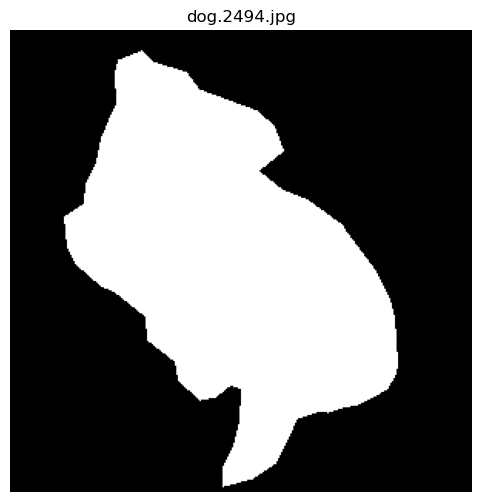

Processed and saved: dog.2494.jpg


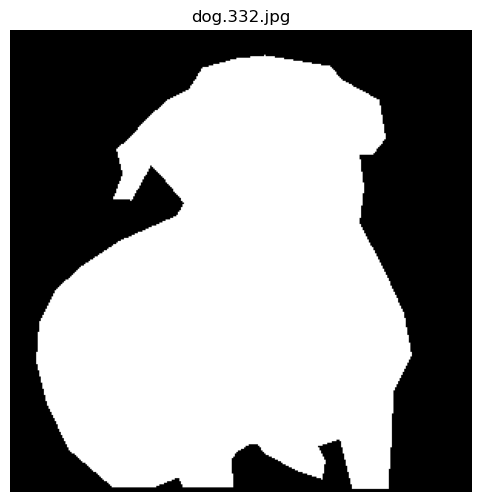

Processed and saved: dog.332.jpg


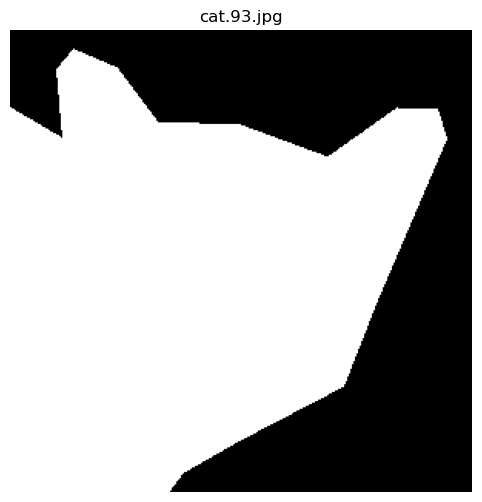

Processed and saved: cat.93.jpg


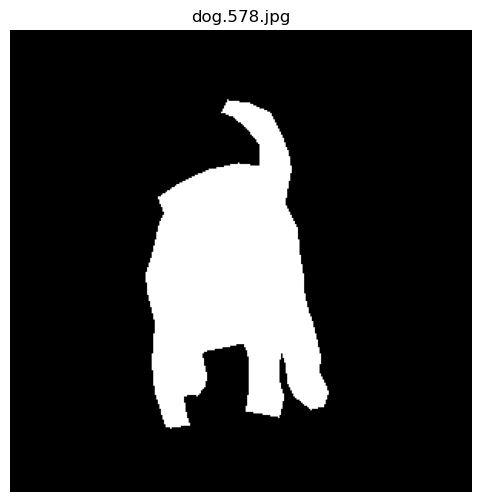

Processed and saved: dog.578.jpg


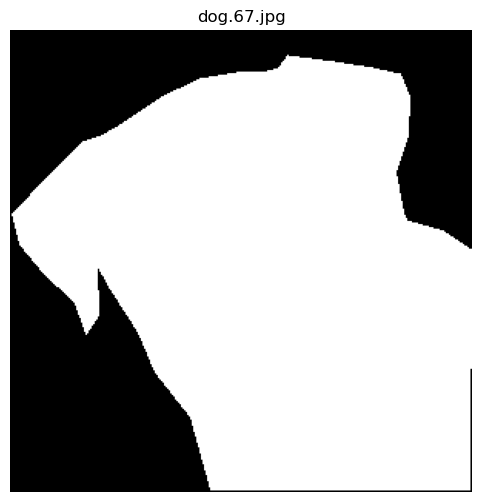

Processed and saved: dog.67.jpg


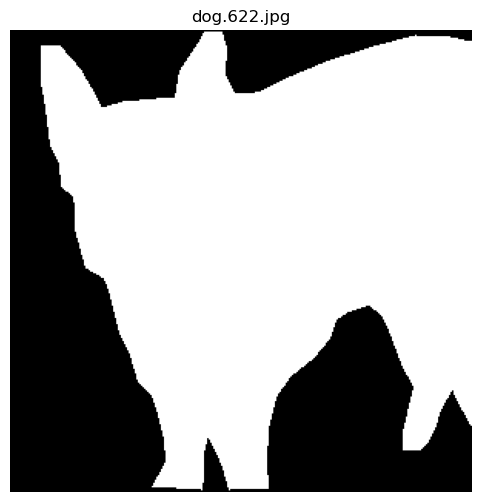

Processed and saved: dog.622.jpg


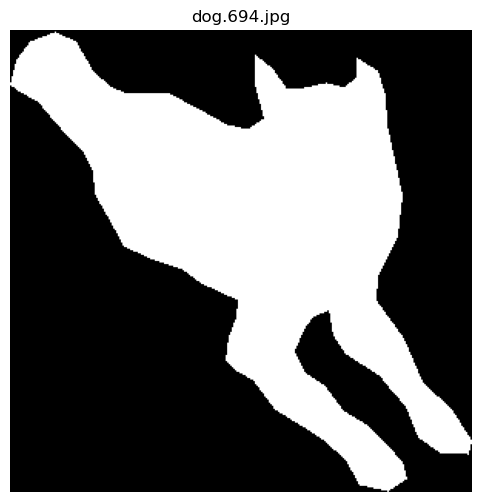

Processed and saved: dog.694.jpg


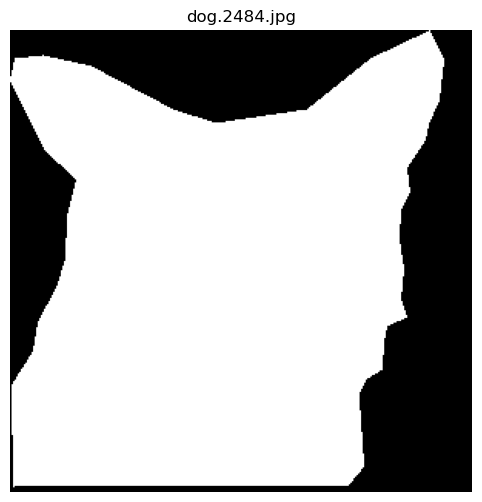

Processed and saved: dog.2484.jpg


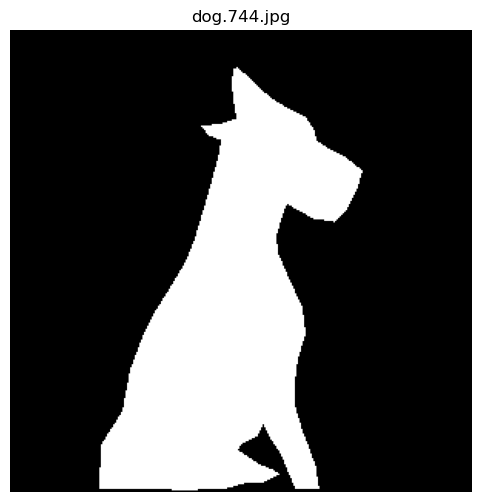

Processed and saved: dog.744.jpg


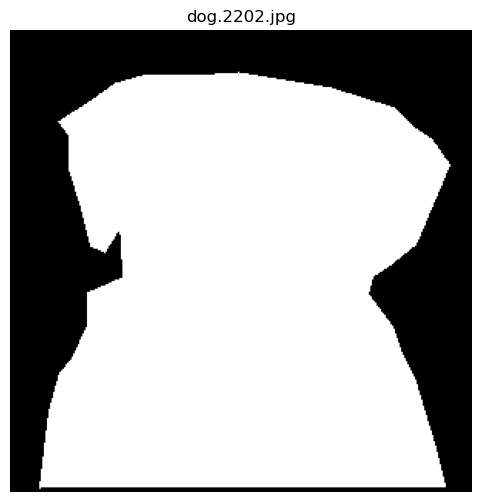

Processed and saved: dog.2202.jpg


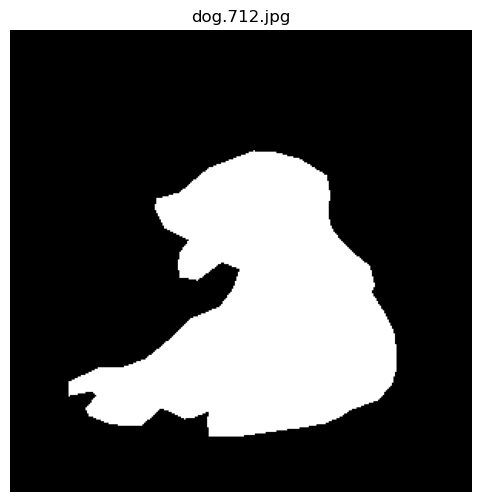

Processed and saved: dog.712.jpg


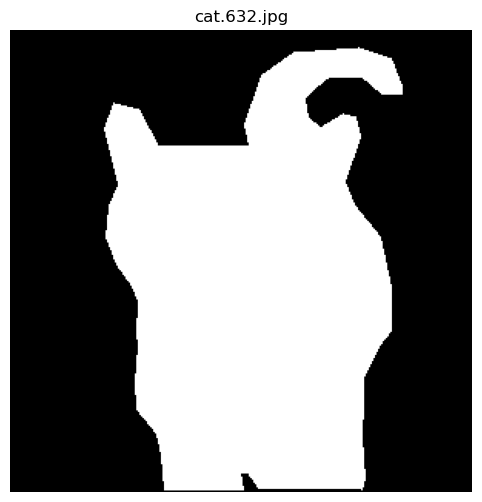

Processed and saved: cat.632.jpg


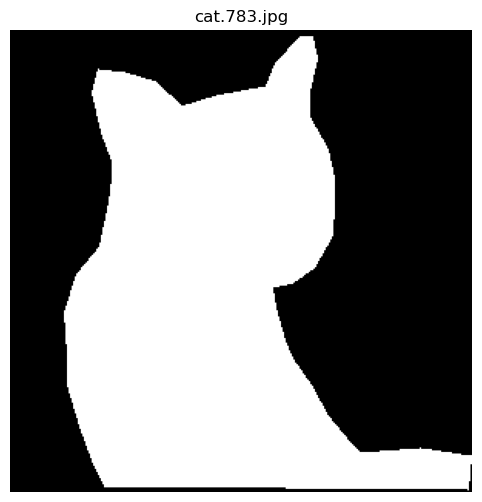

Processed and saved: cat.783.jpg


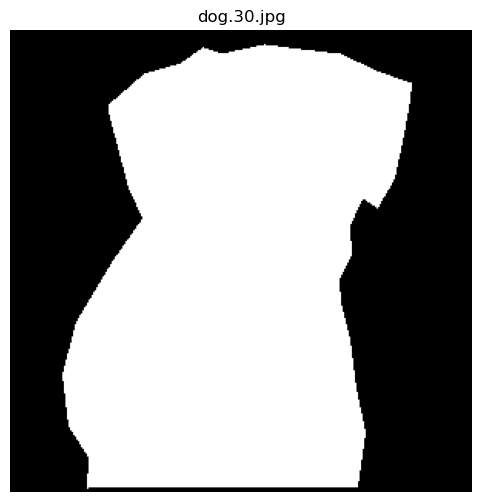

Processed and saved: dog.30.jpg


In [23]:
import os
import matplotlib.pyplot as plt
import cv2

mask_dir = "dataset/cat_and_dog_dataset/SegmentationClass"
output_dir = "dataset/cat_and_dog_dataset/encoded_masks"
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(mask_dir):
    if filename.endswith(".png"):
        # Process the current image
        mask_path = os.path.join(mask_dir, filename)
        grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)
        
        # Save the processed image
        filename_no_ext = os.path.splitext(filename)[0] + ".jpg"
        save_path = os.path.join(output_dir, filename_no_ext)
        cv2.imwrite(save_path, grayscale_label_mask)
        
        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(grayscale_label_mask, cmap='gray')
        plt.title(filename_no_ext)
        plt.axis('off')
        plt.show()
        
        print(f"Processed and saved: {filename_no_ext}")
        
        # Optional: Add a pause or input to control viewing
        # input("Press Enter to continue...")

In [24]:
import os

mask_dir = "dataset/cat_and_dog_dataset/SegmentationClass"
for filename in os.listdir(mask_dir):
    if filename.endswith(".png"):
        mask_path = os.path.join(mask_dir, filename)
        grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

#         print(f"Processed {mask_path}")
# mask_path = "dataset/cat_and_dog_dataset/SegmentationClass/cat.509.png" 
# grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

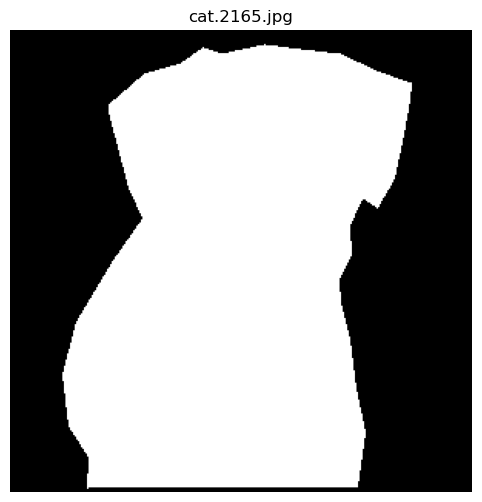

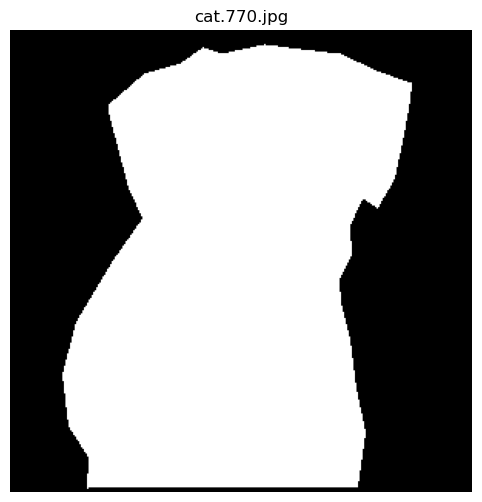

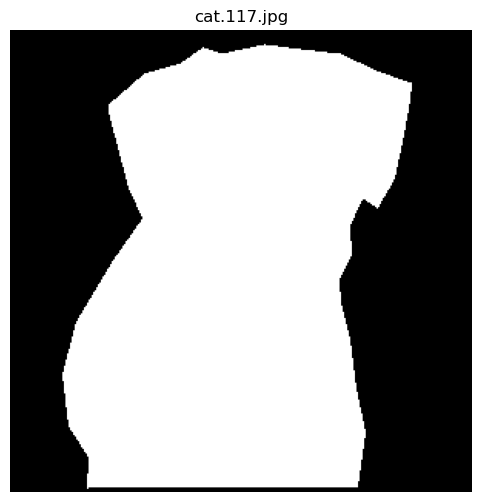

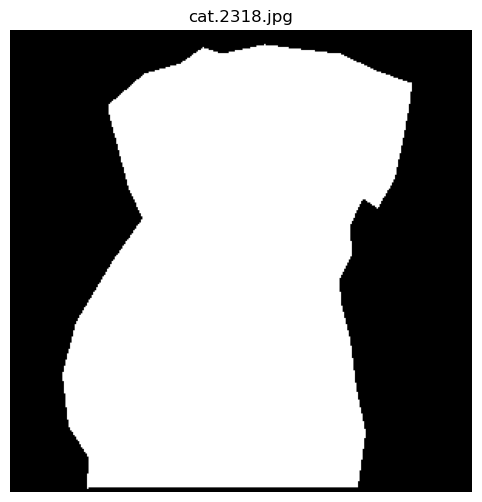

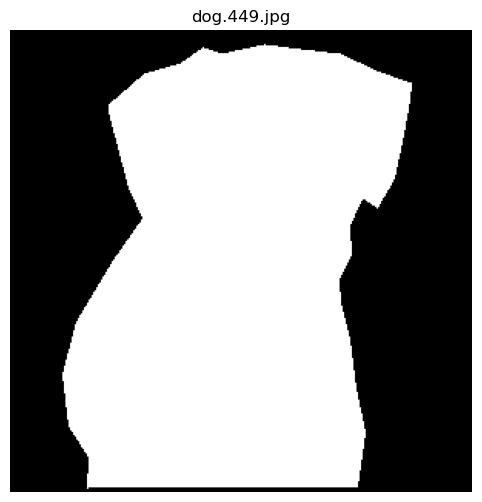

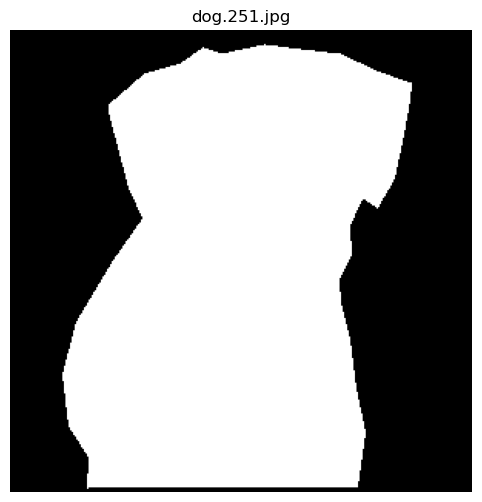

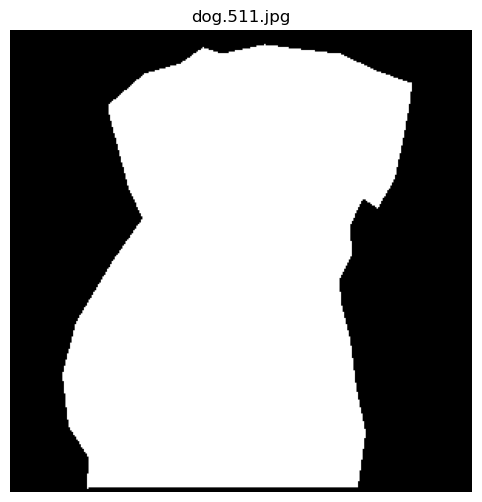

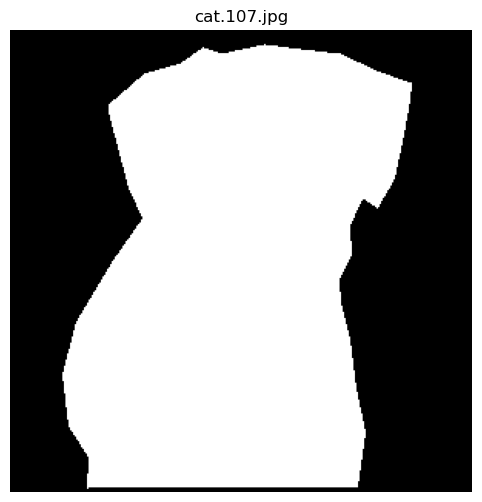

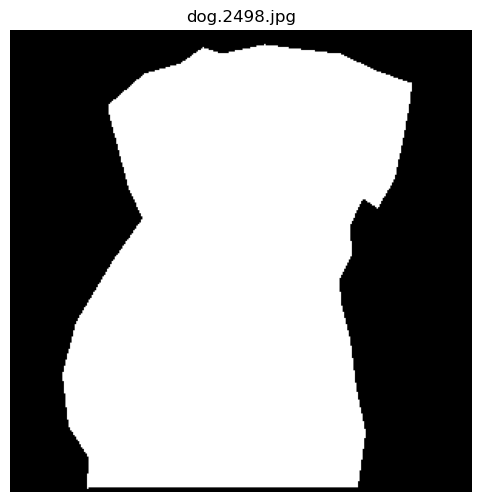

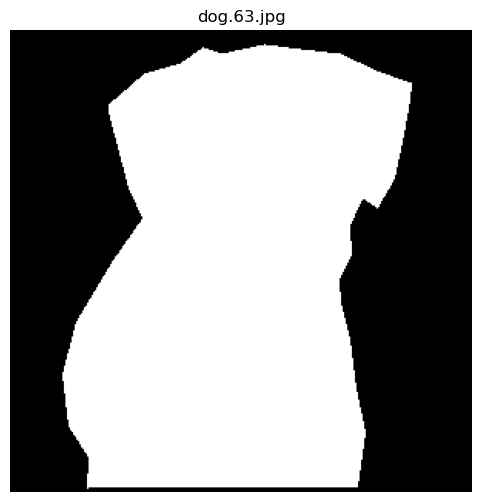

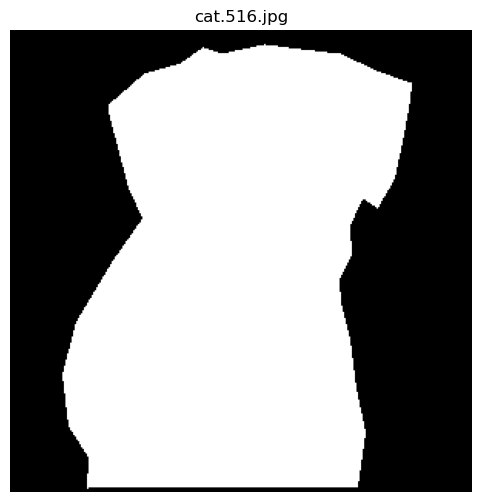

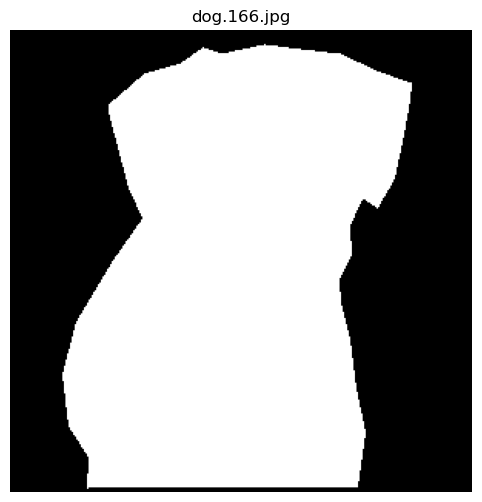

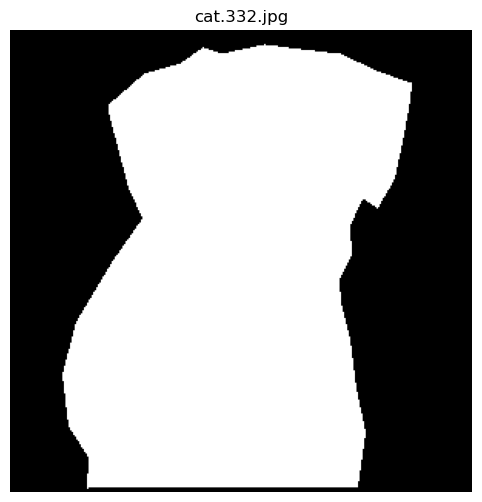

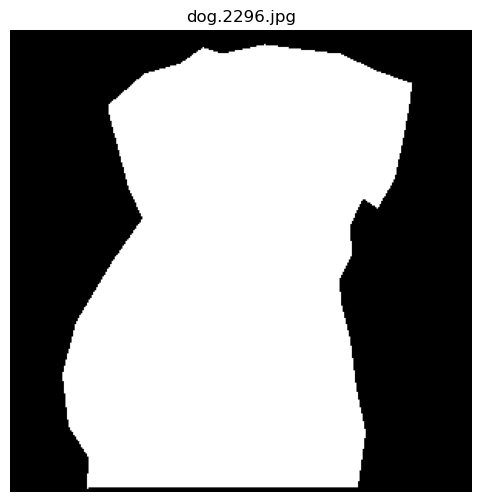

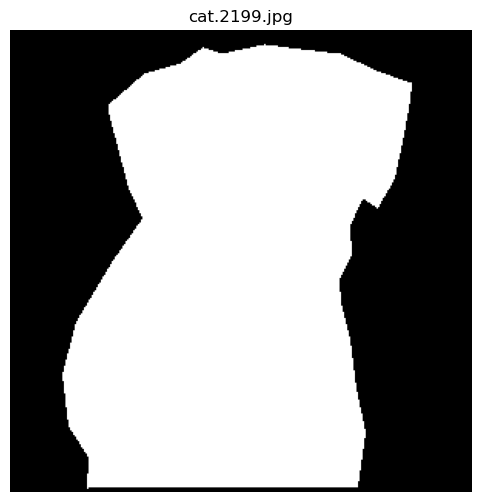

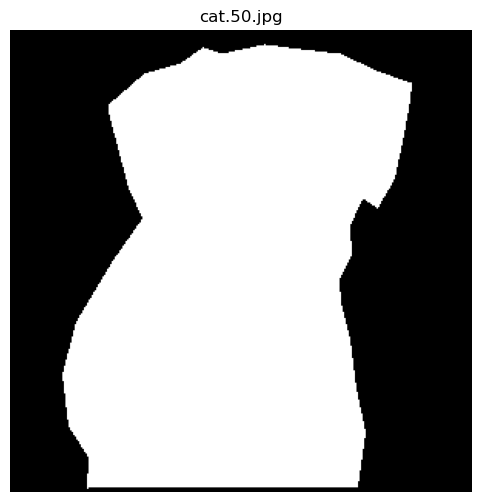

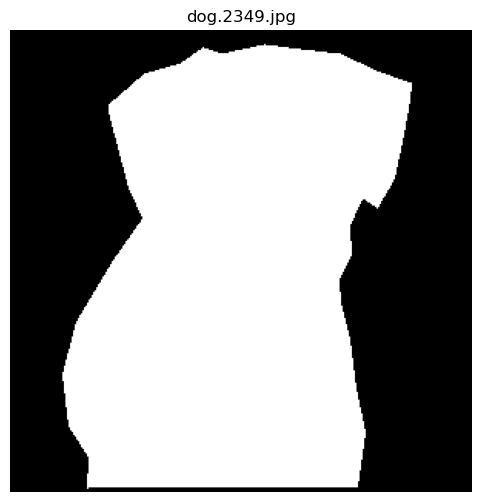

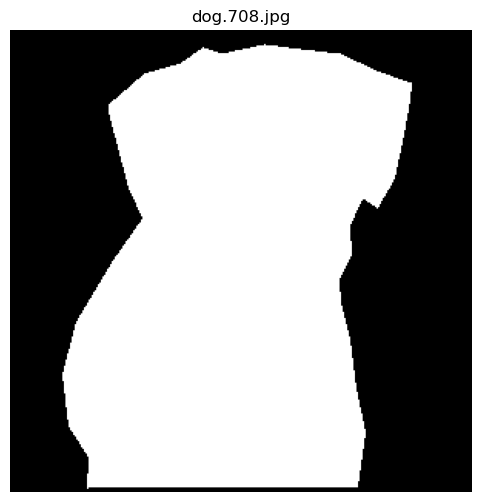

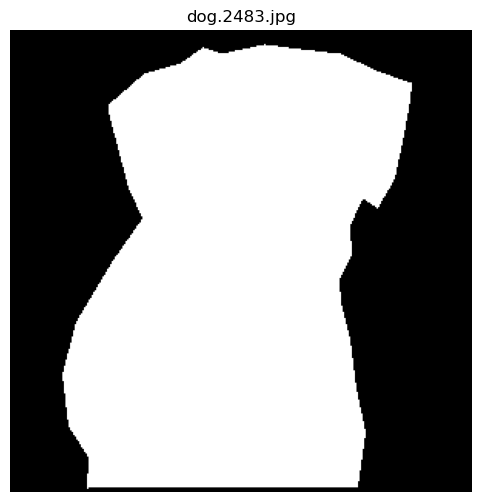

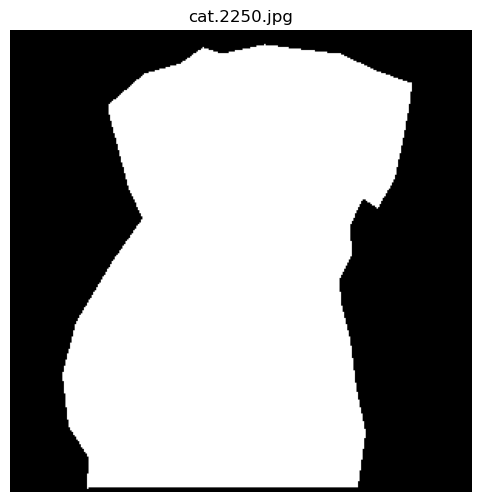

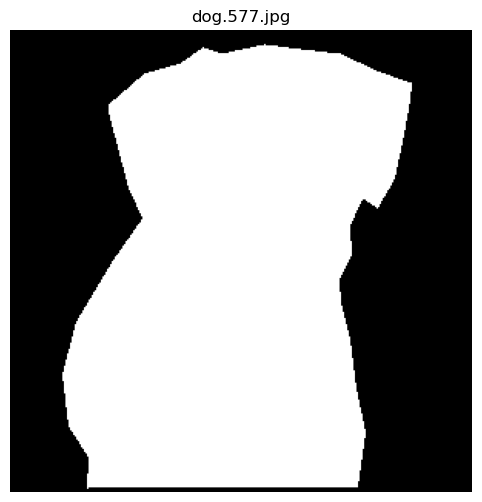

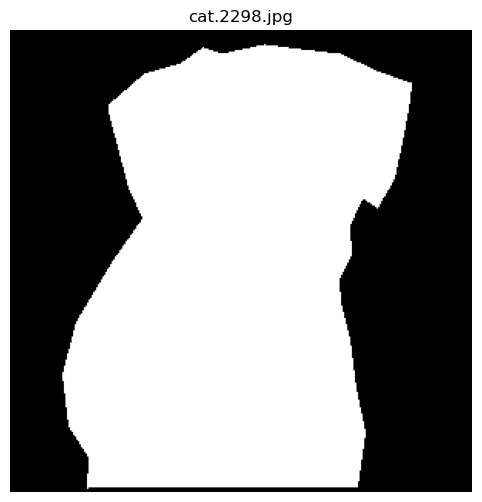

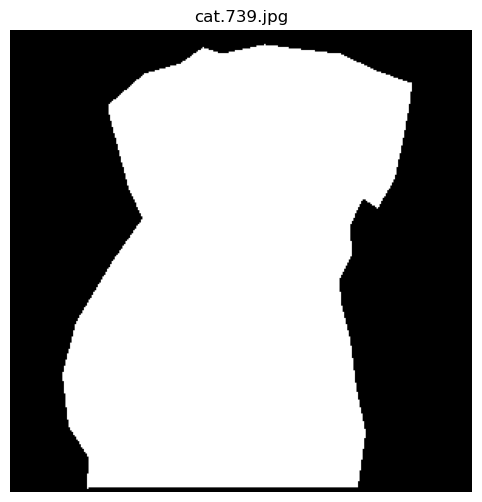

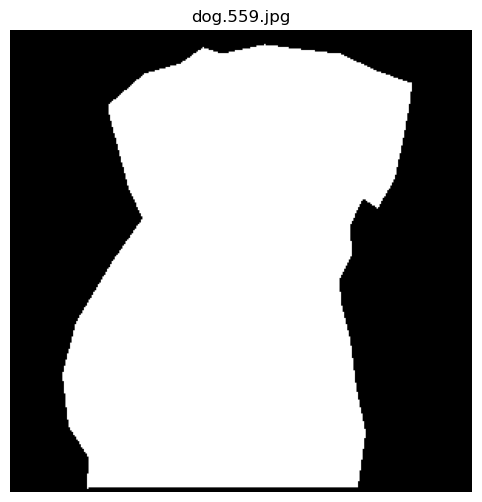

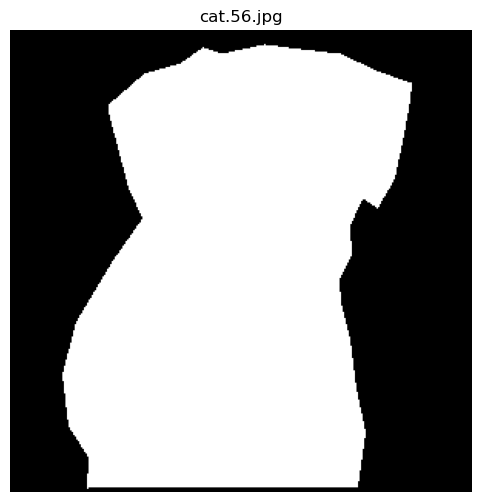

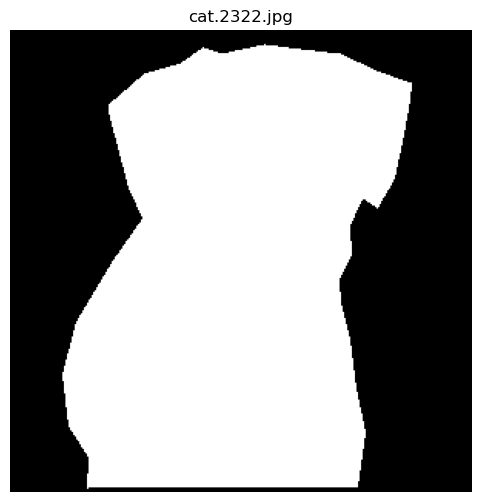

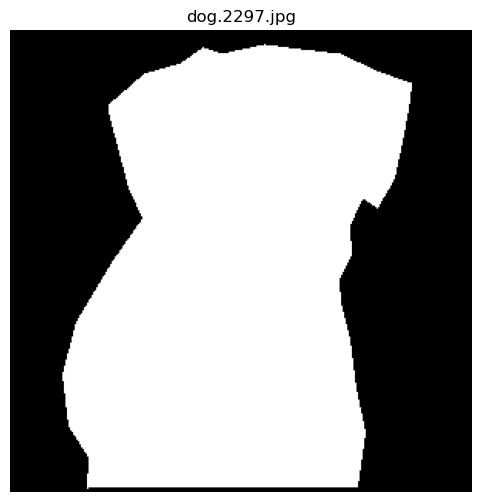

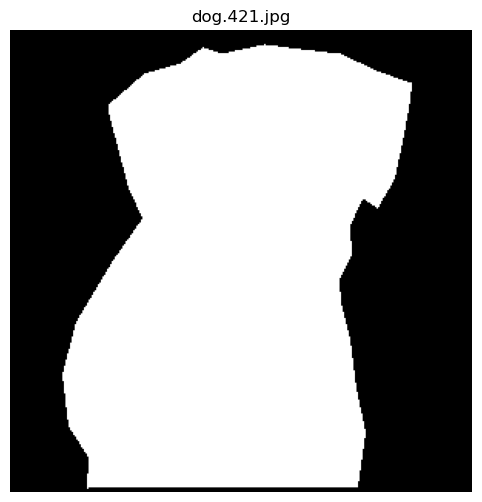

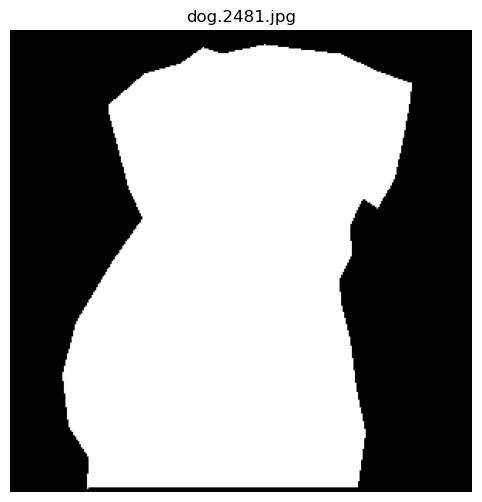

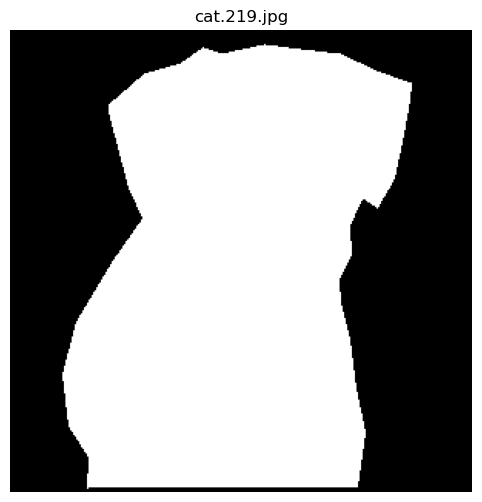

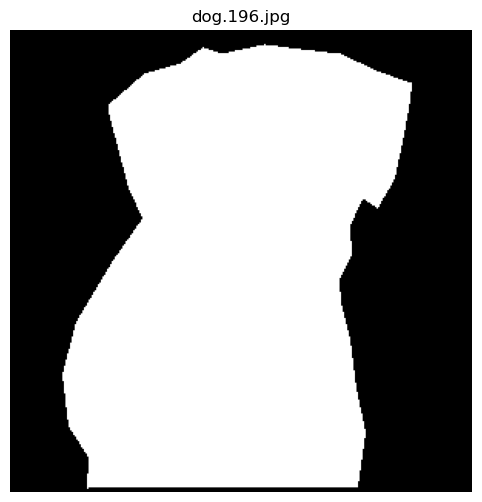

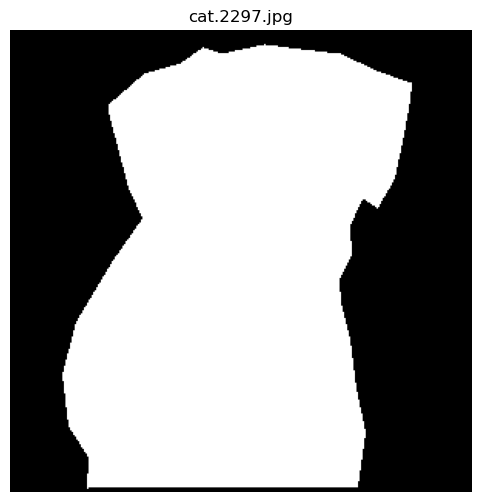

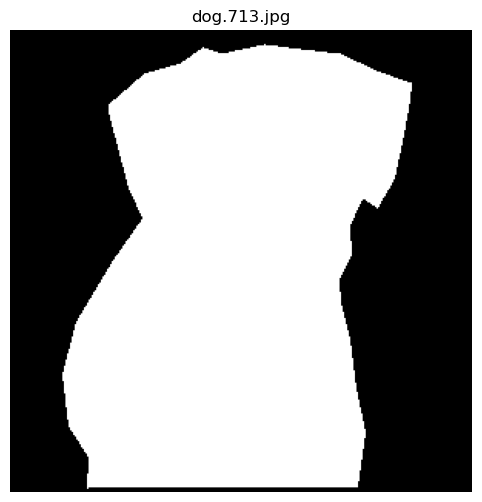

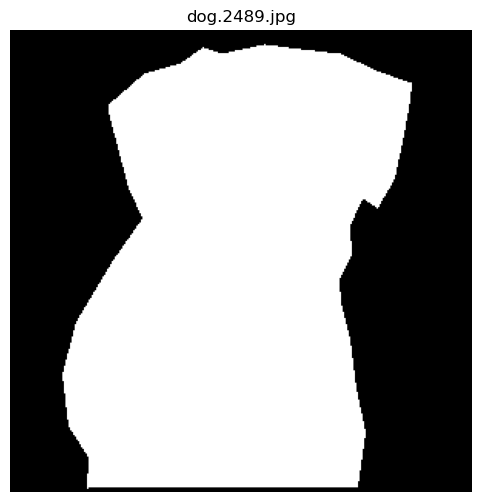

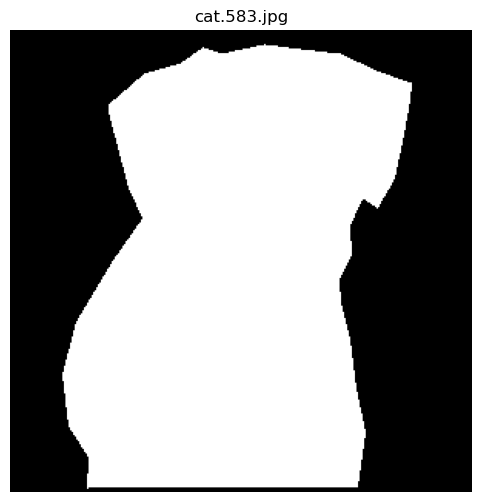

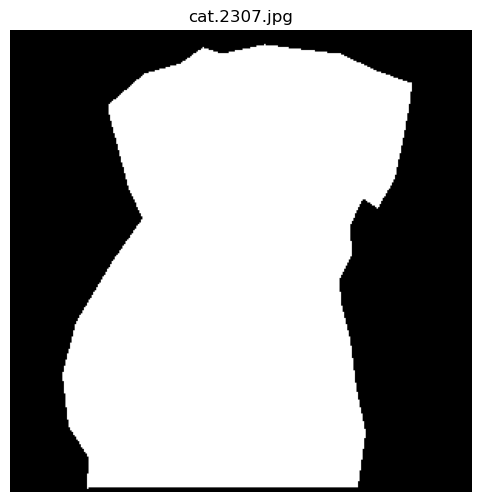

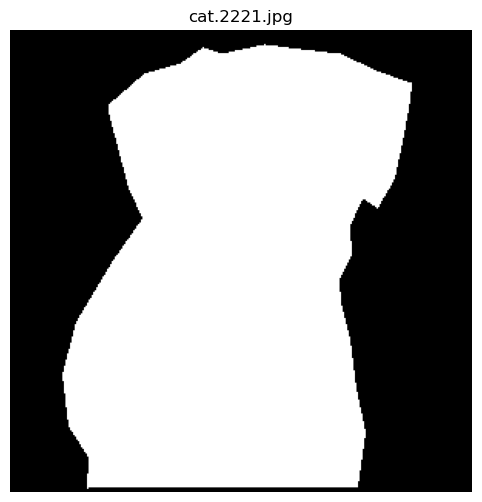

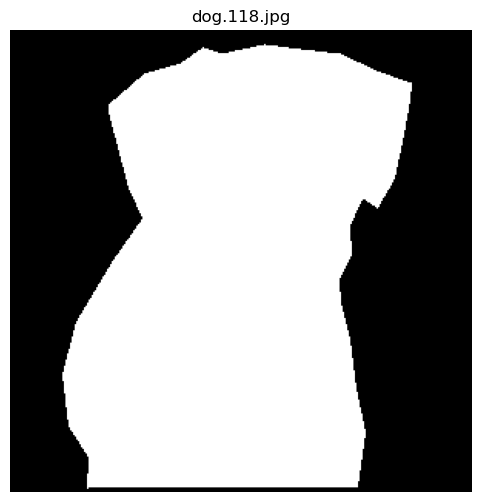

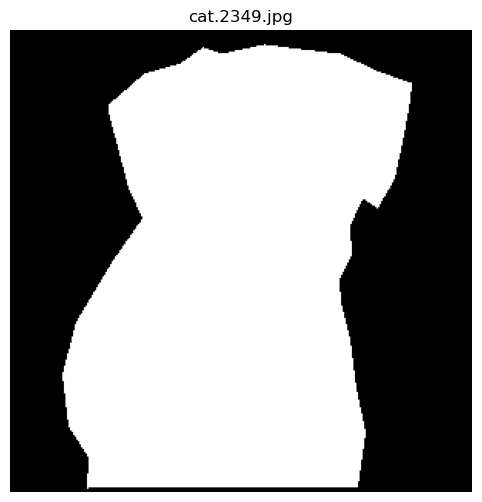

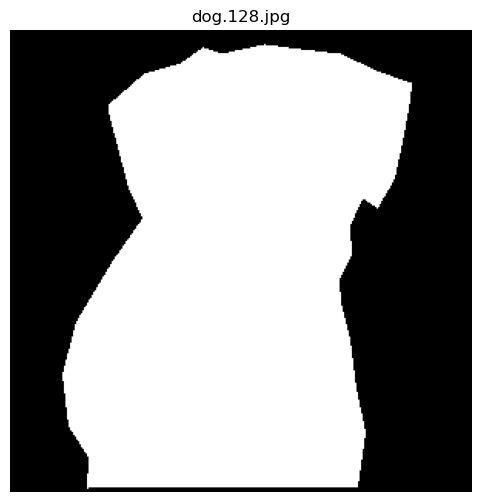

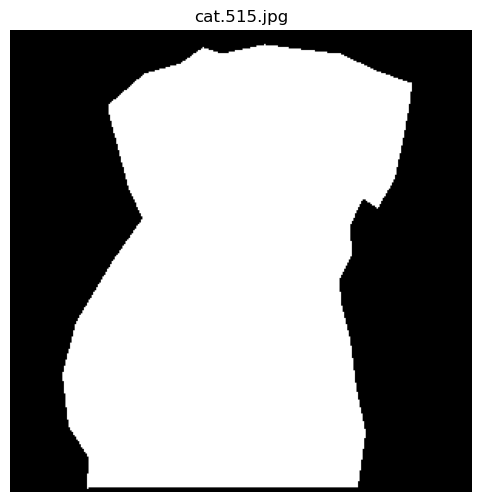

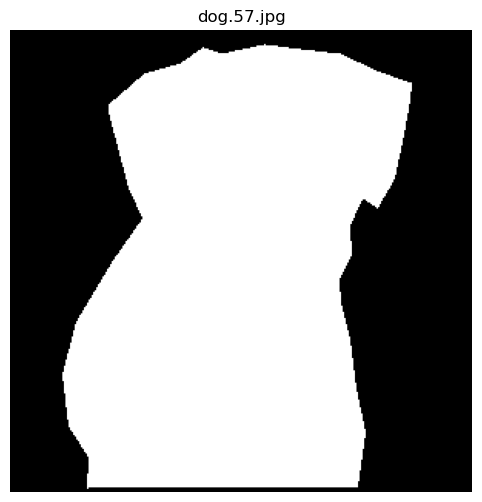

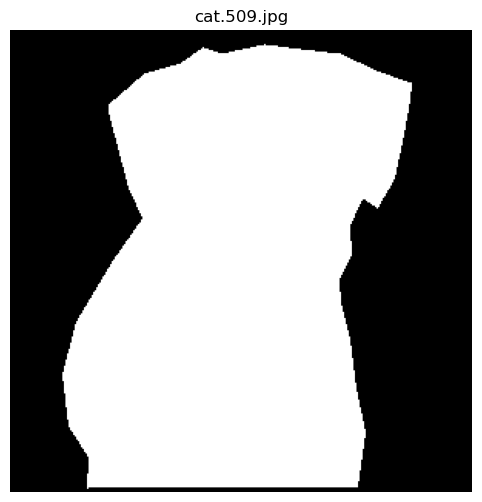

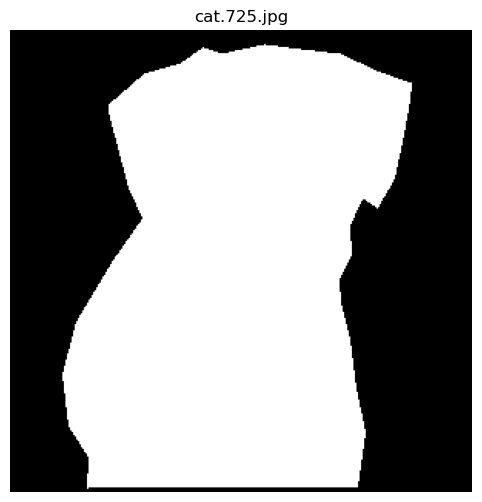

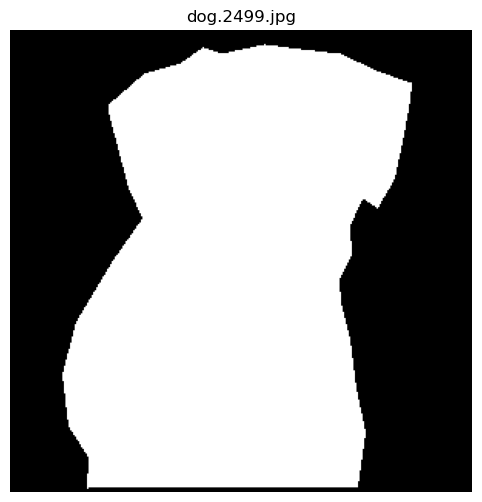

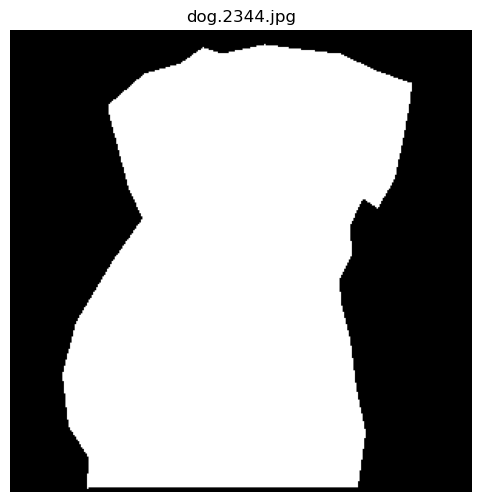

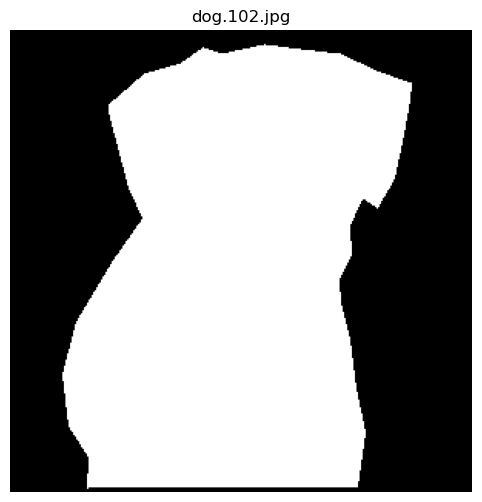

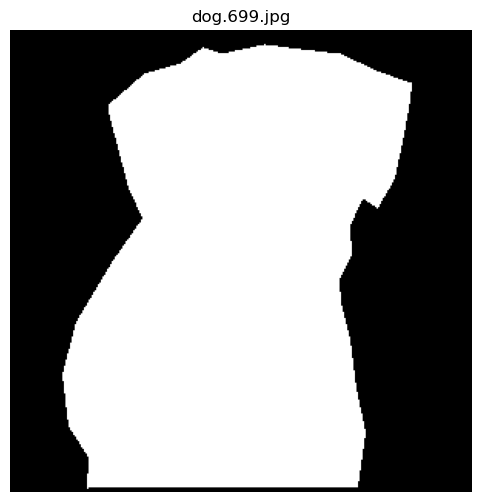

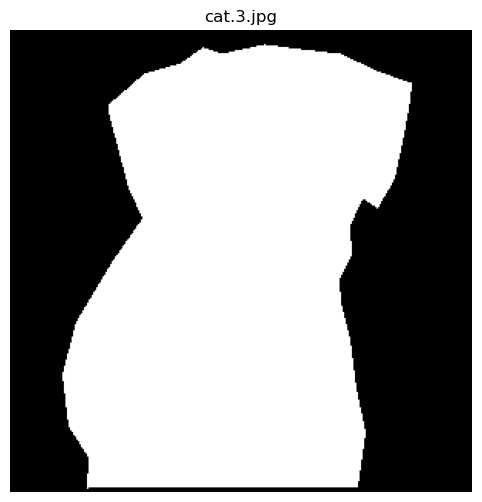

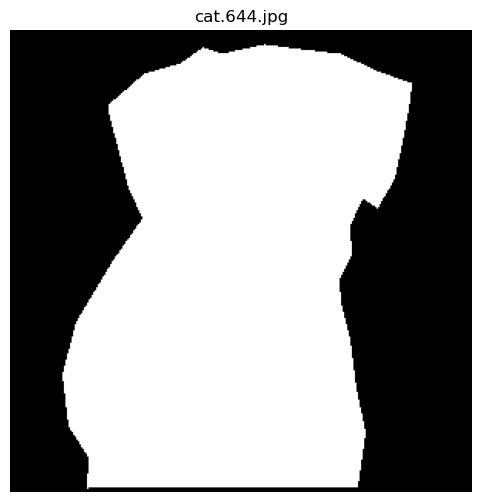

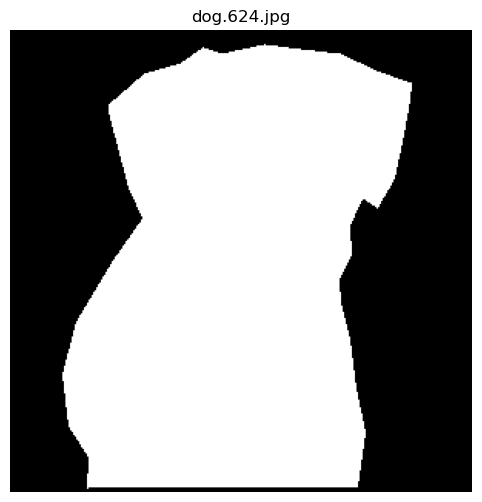

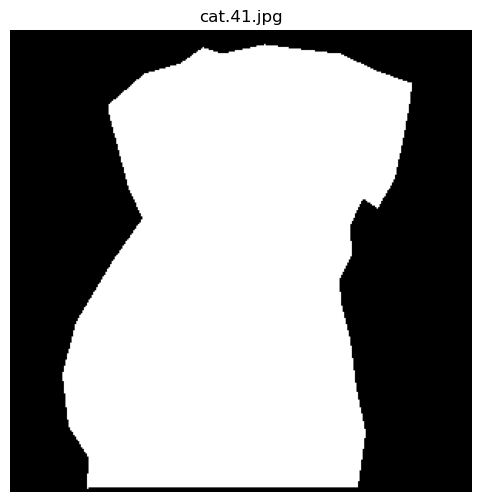

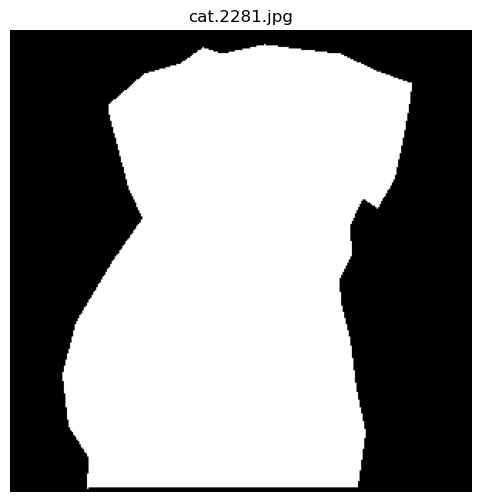

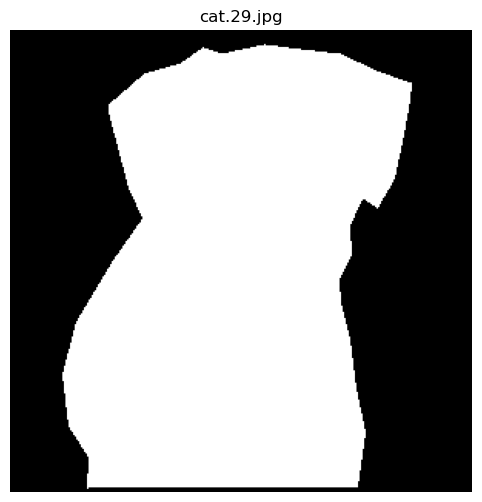

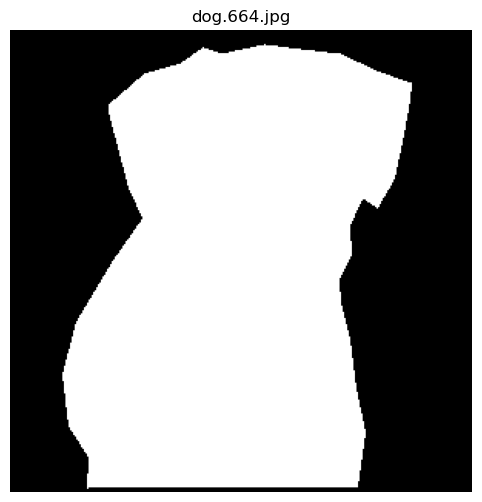

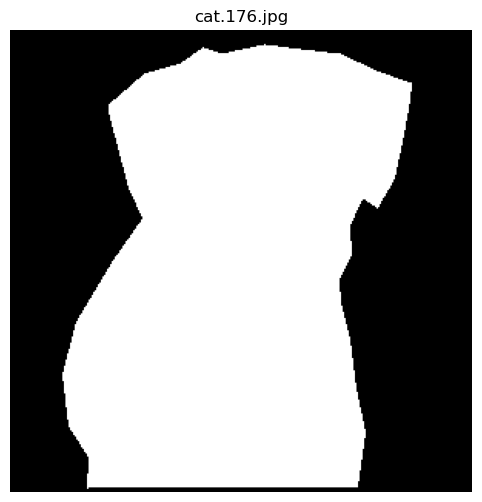

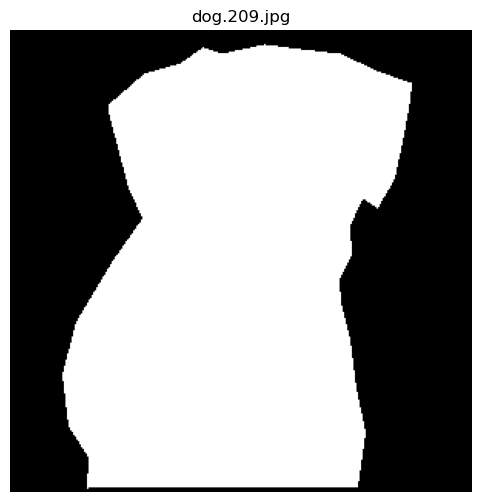

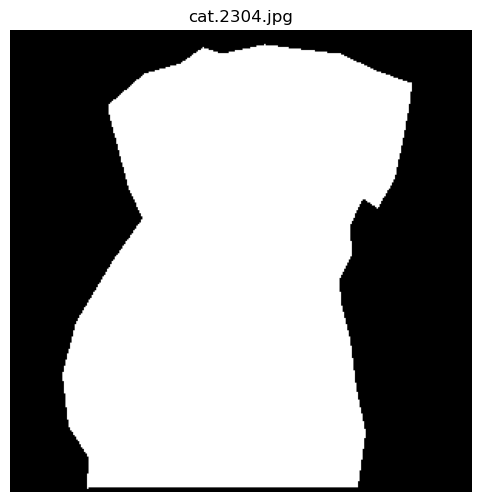

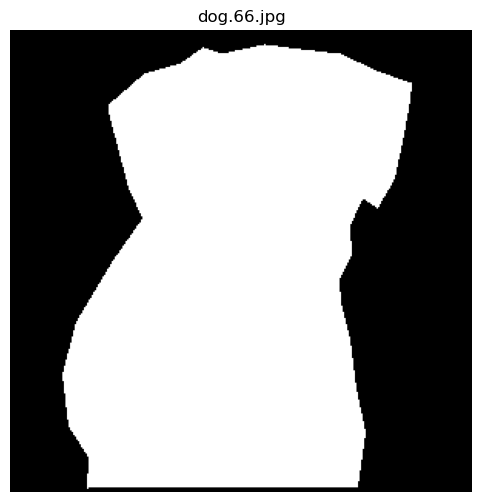

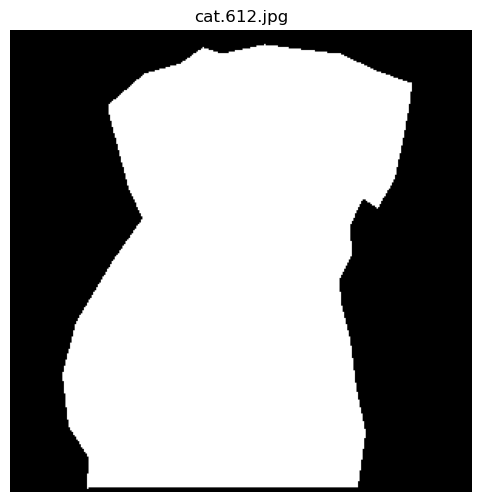

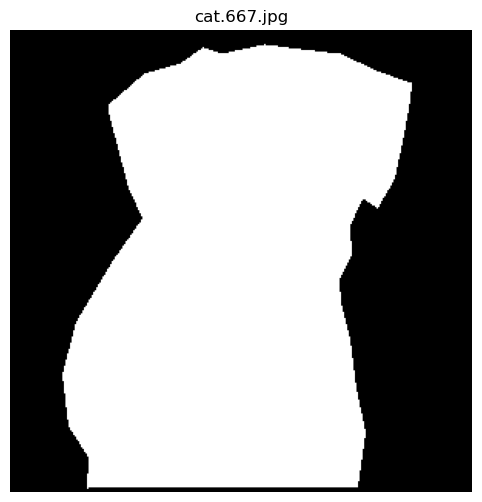

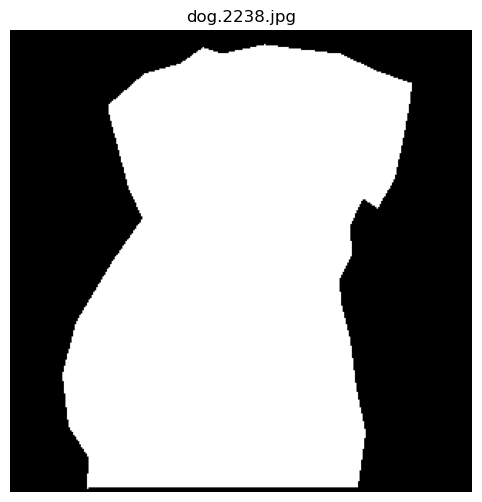

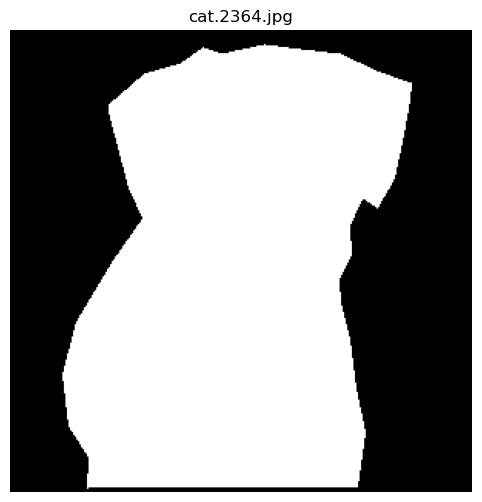

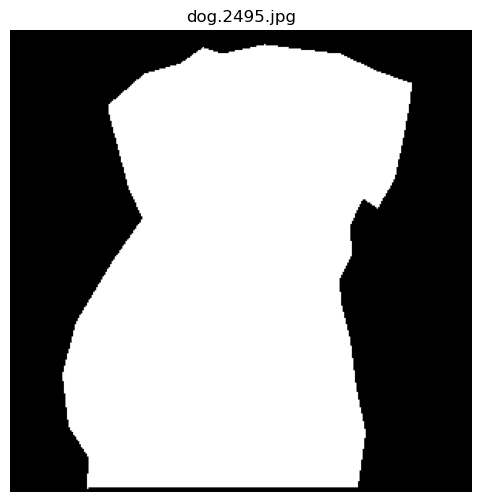

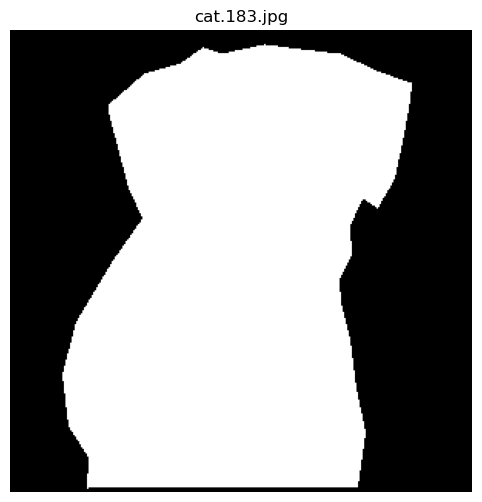

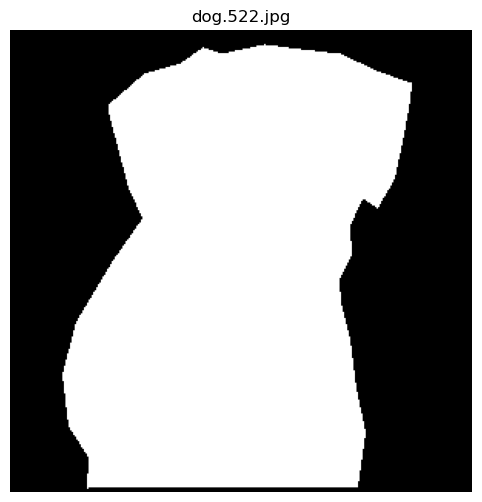

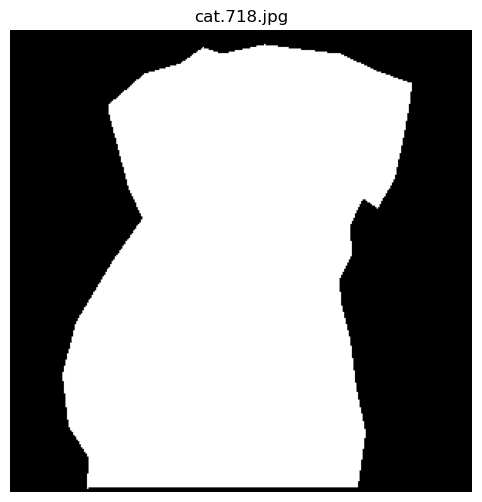

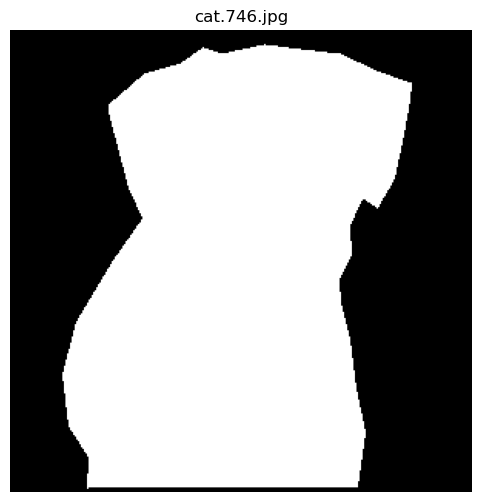

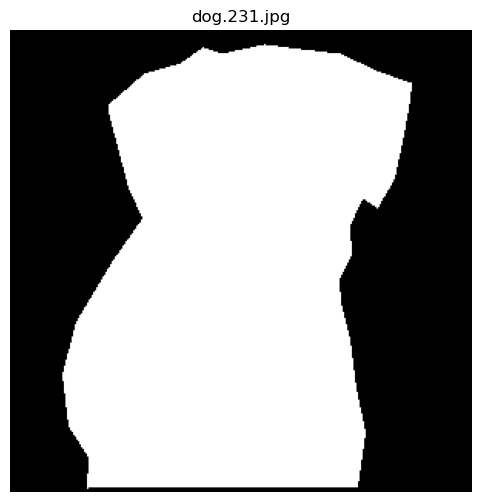

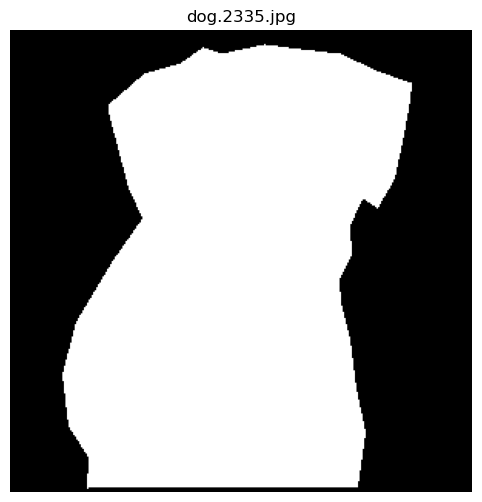

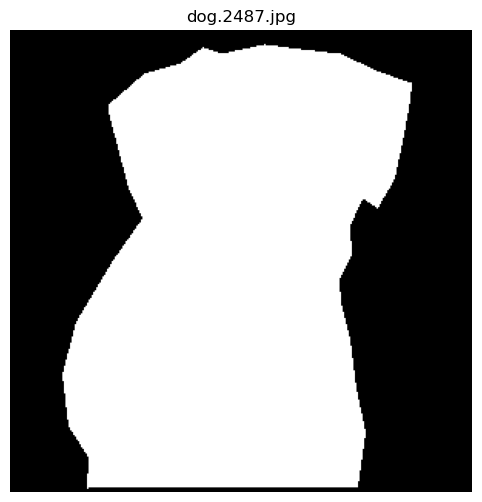

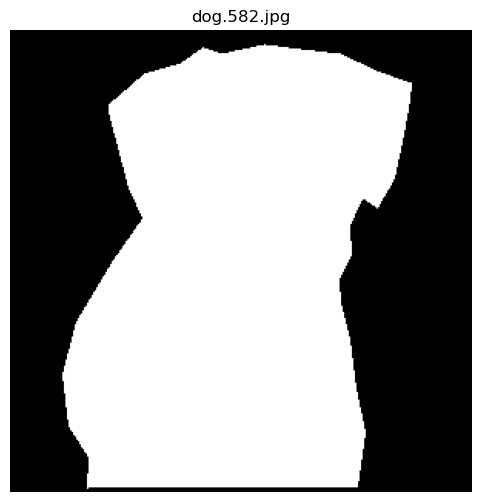

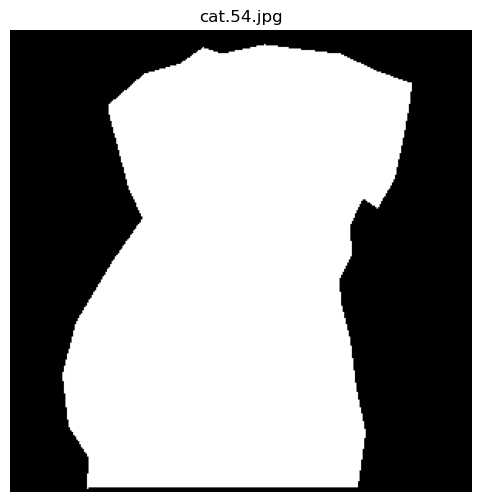

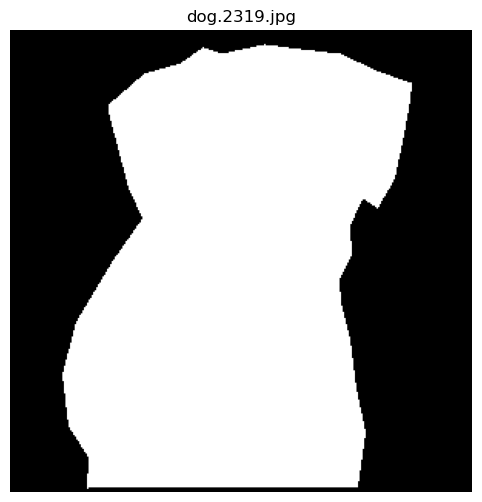

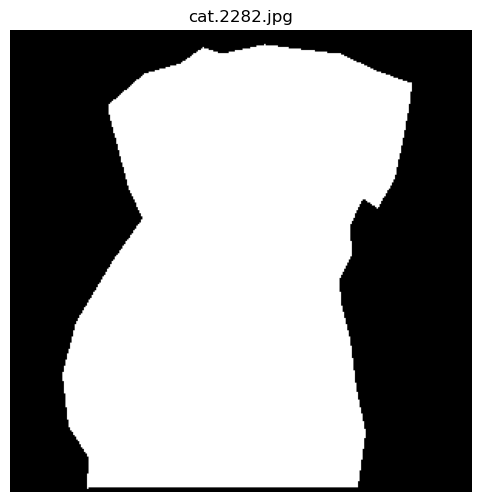

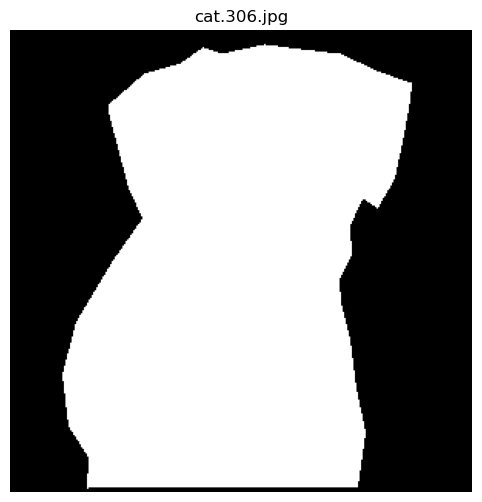

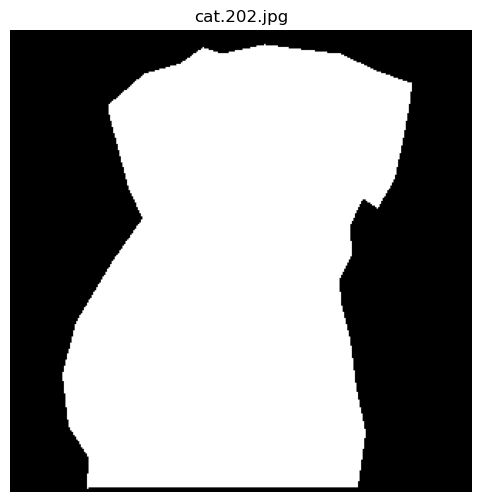

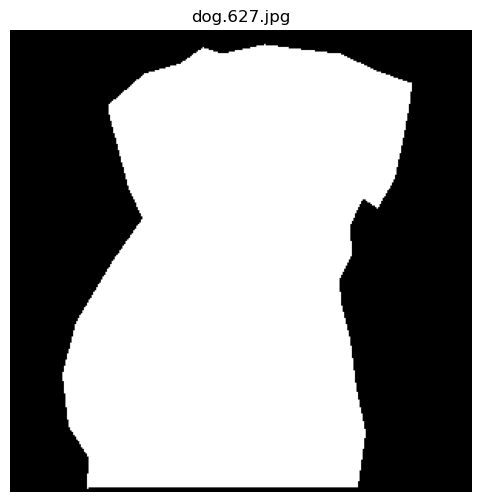

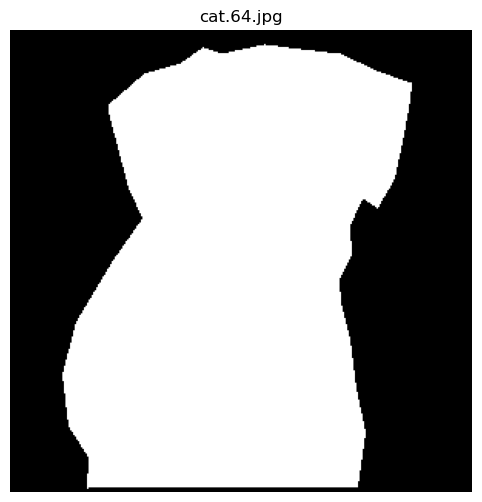

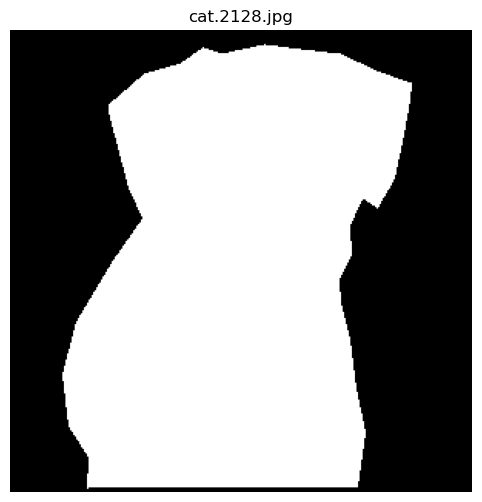

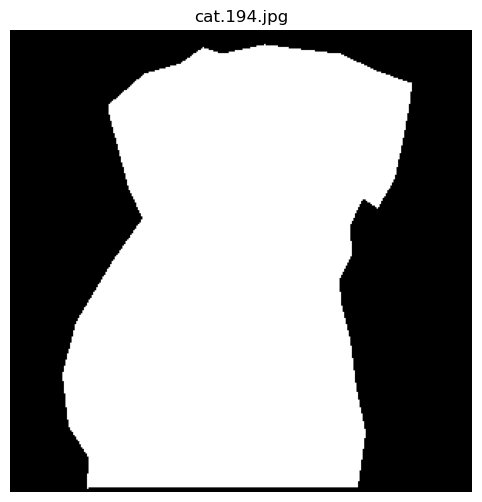

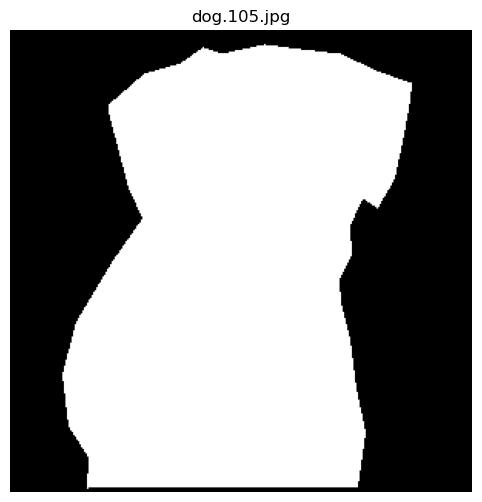

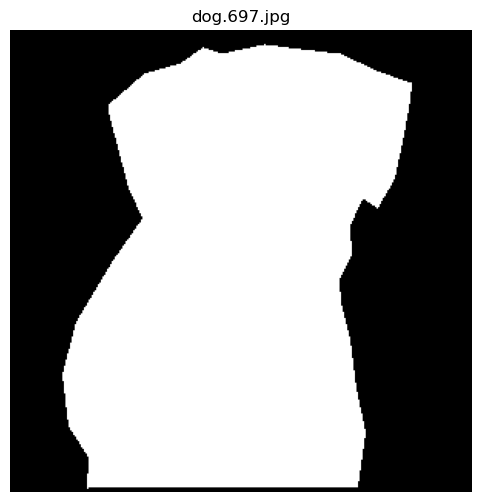

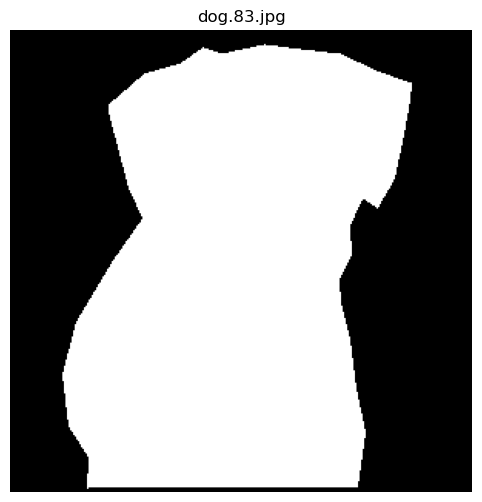

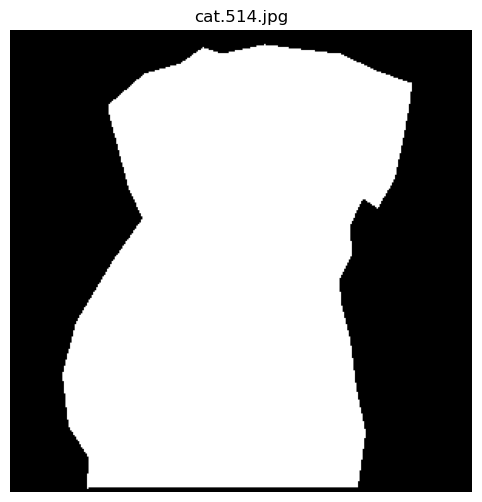

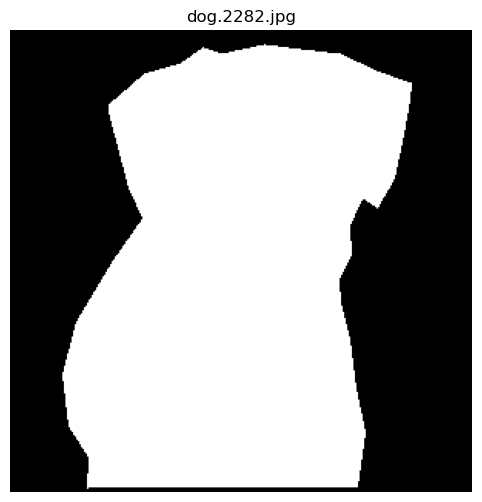

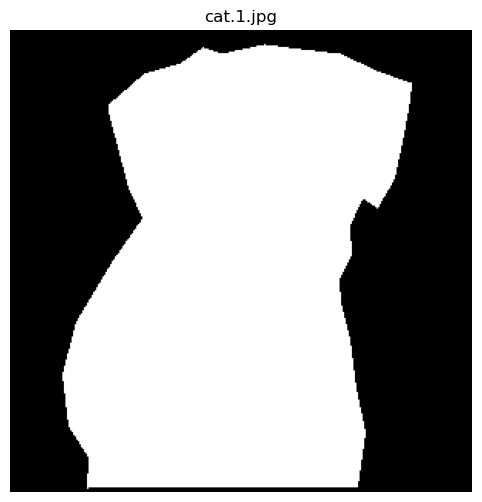

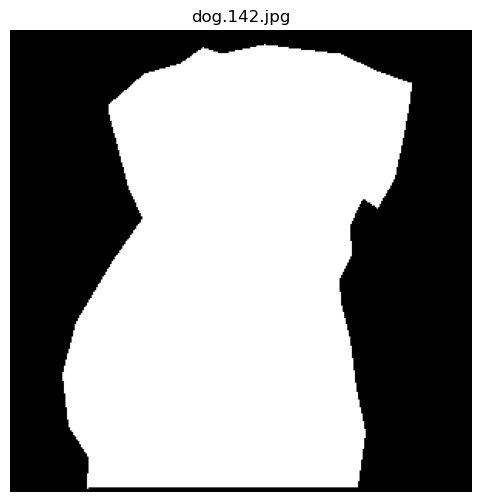

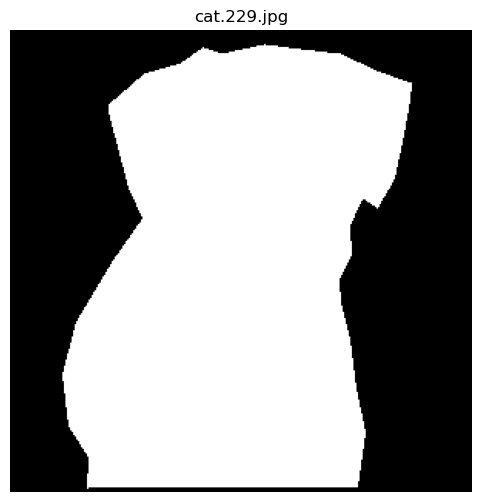

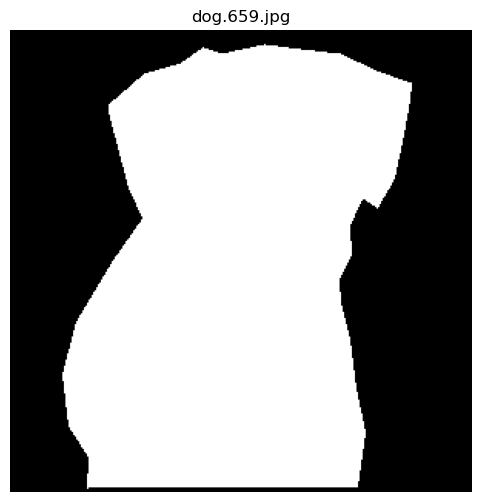

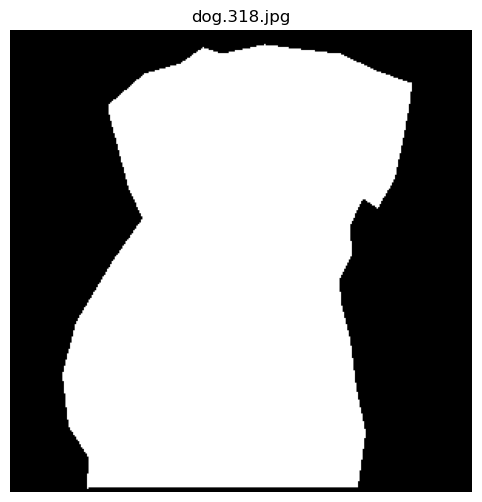

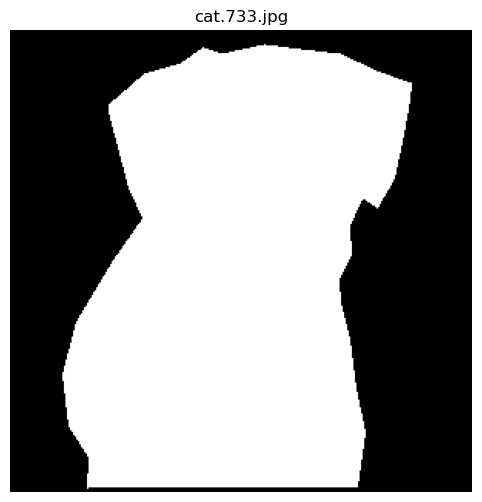

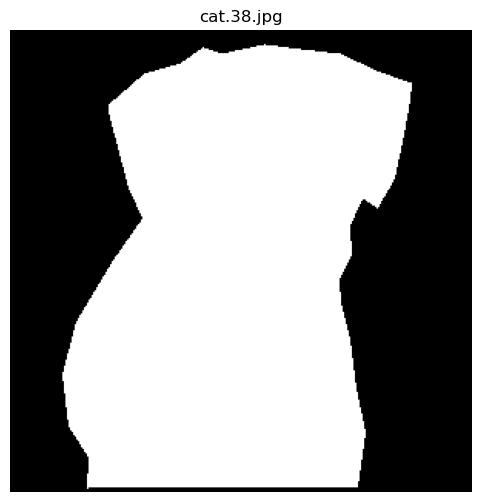

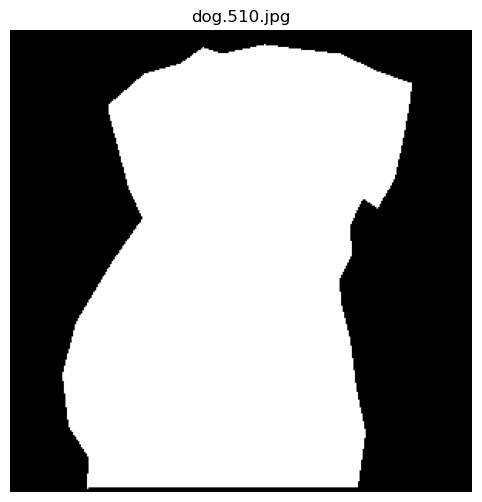

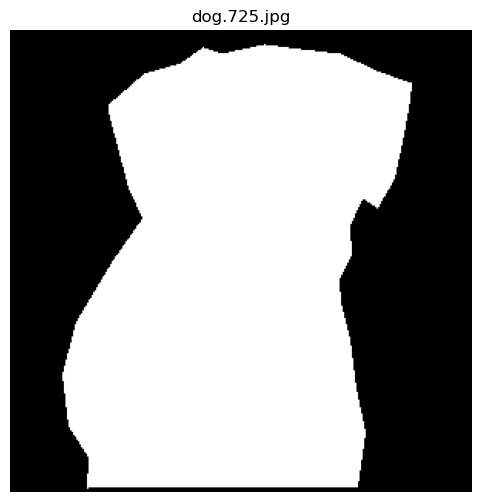

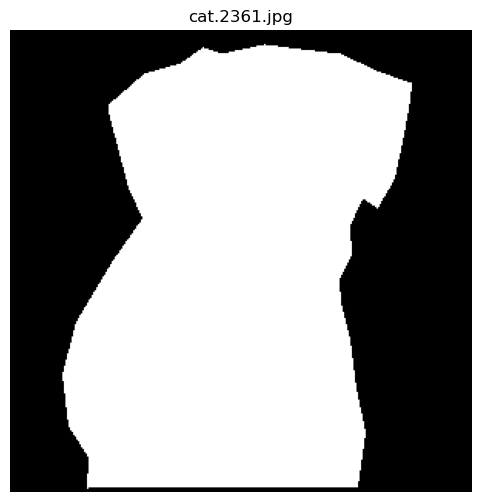

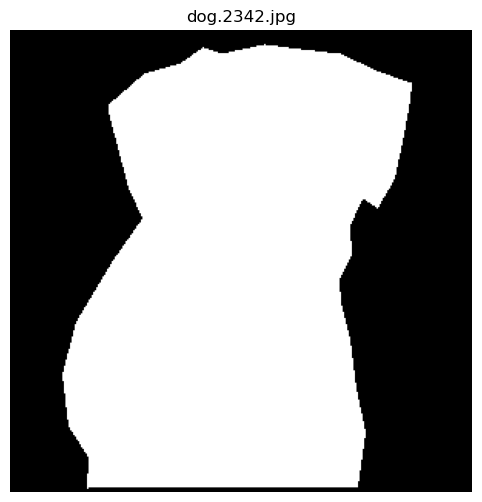

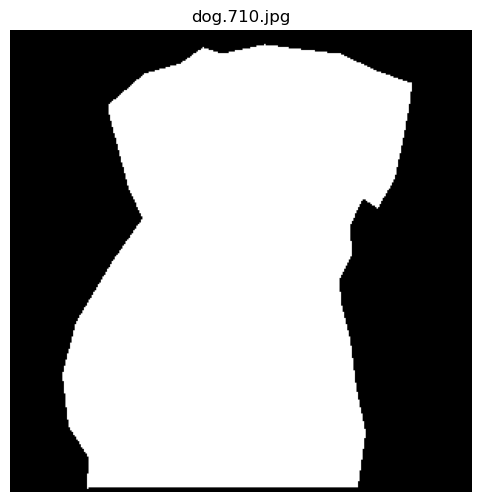

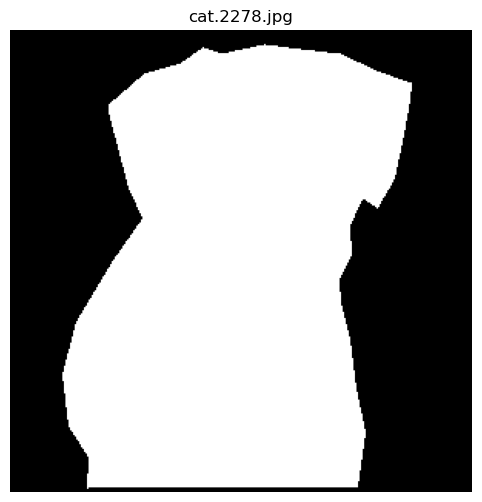

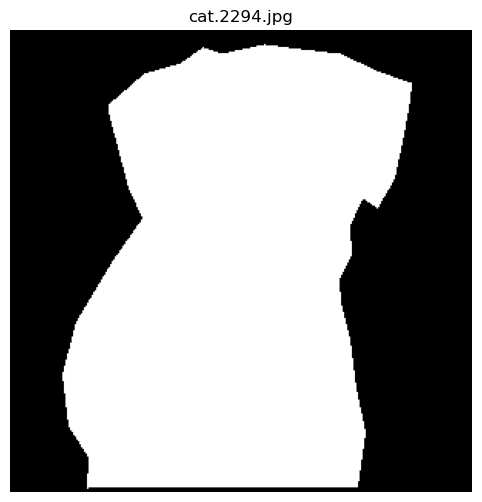

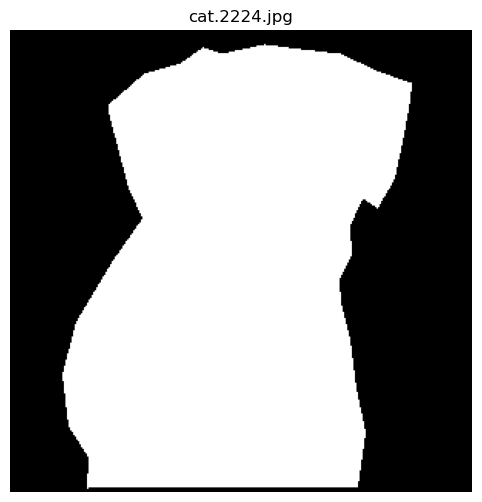

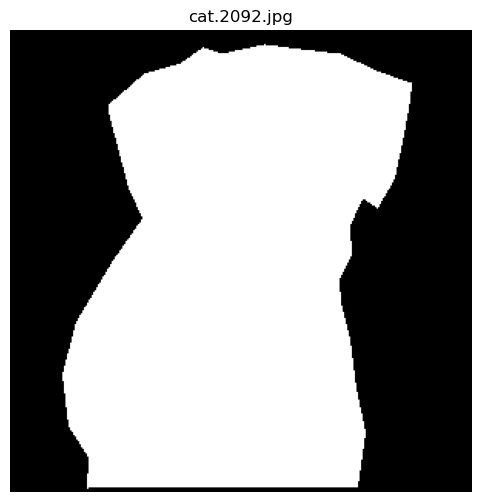

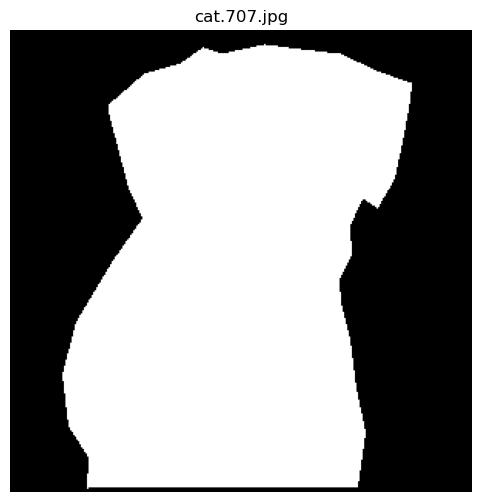

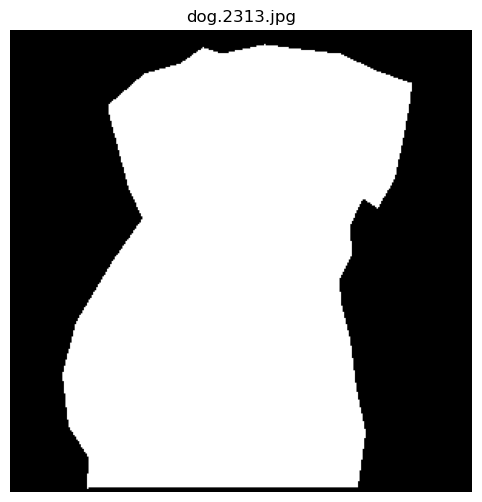

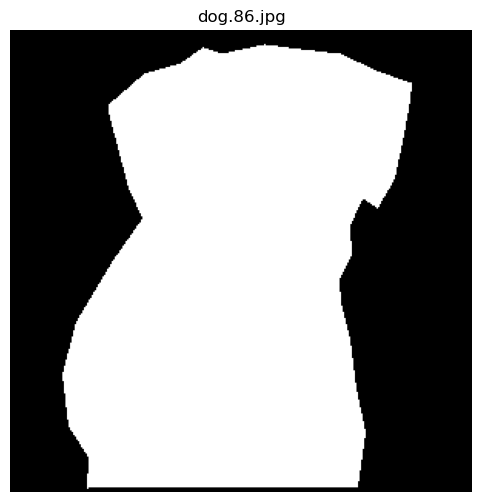

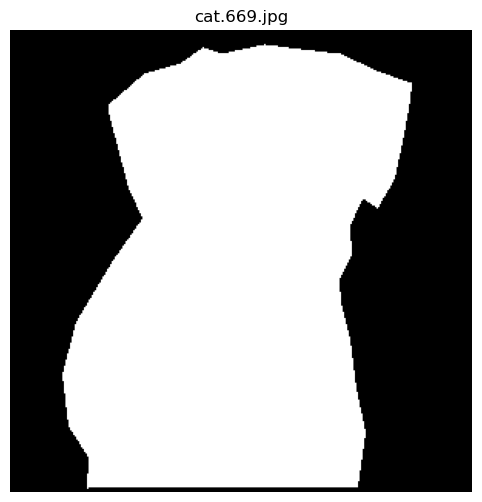

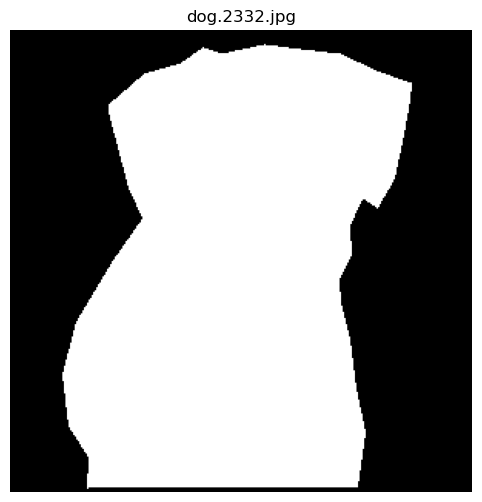

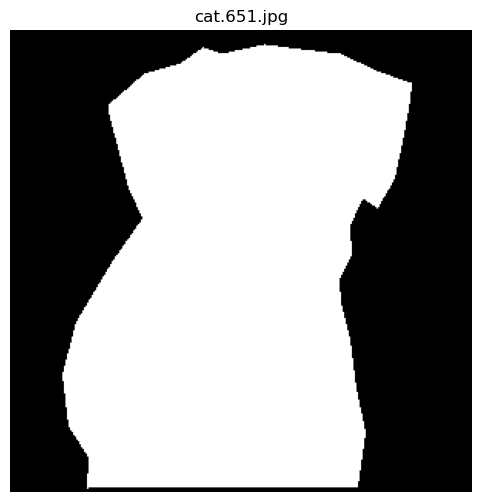

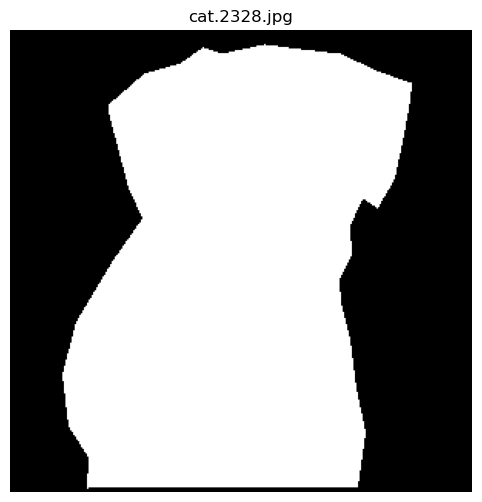

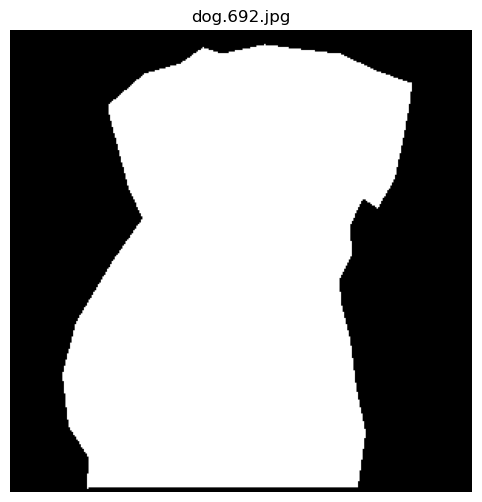

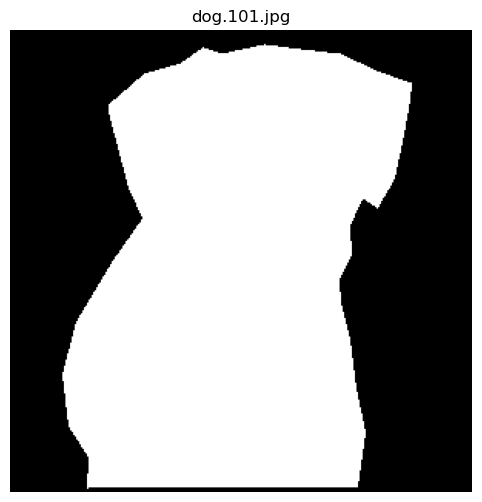

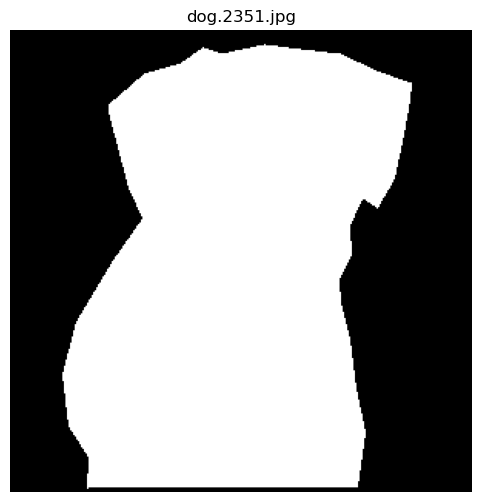

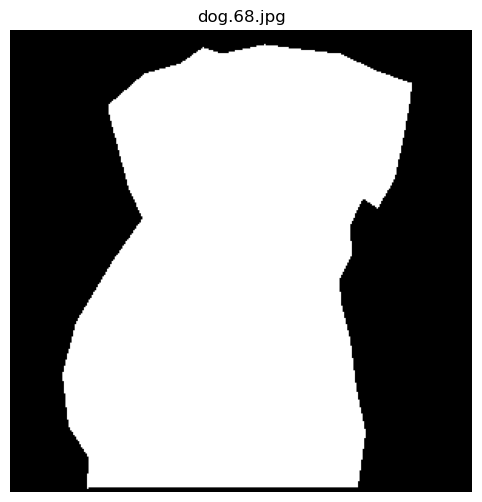

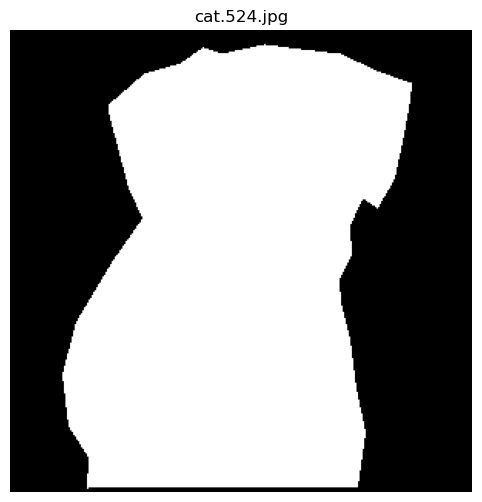

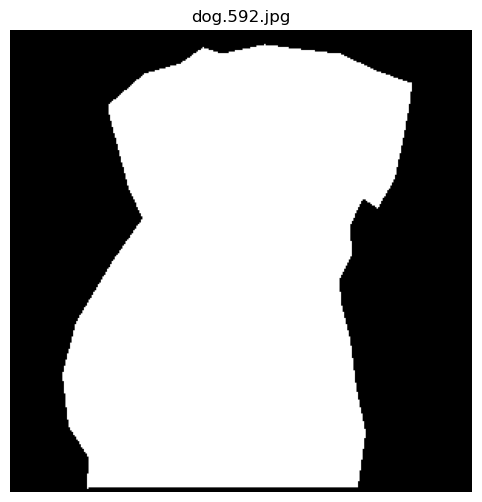

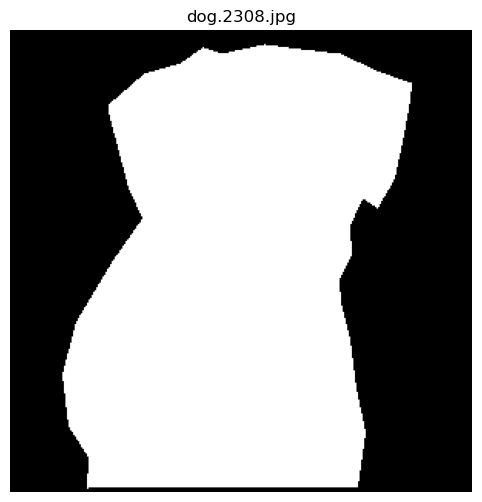

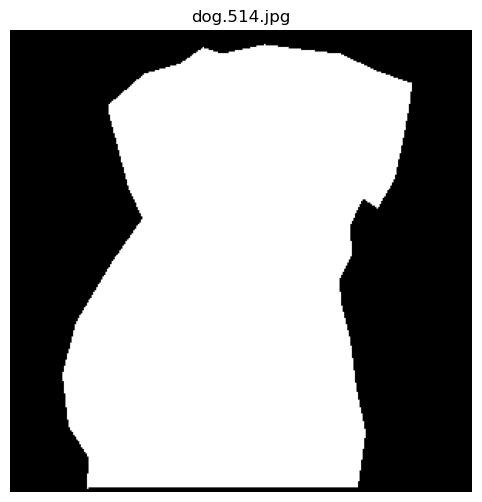

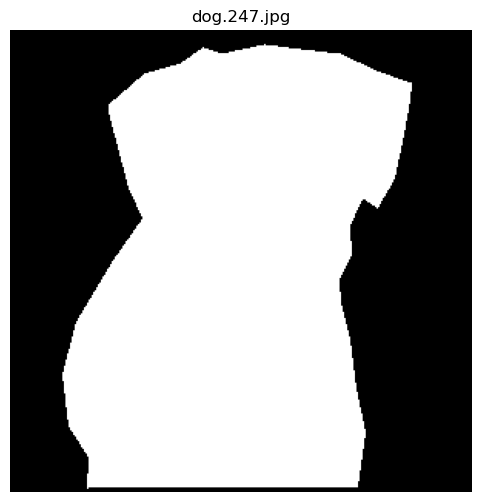

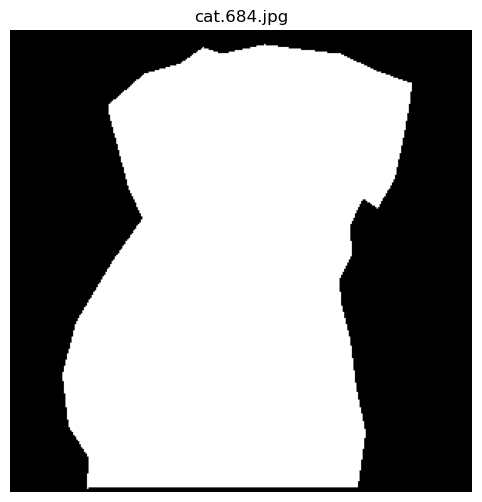

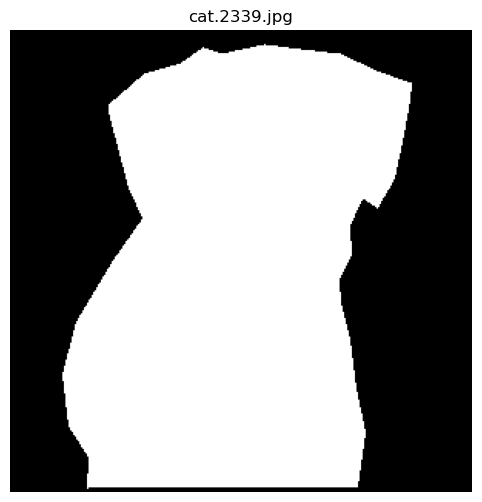

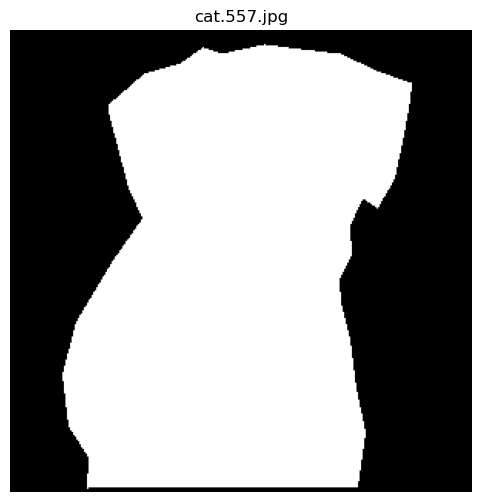

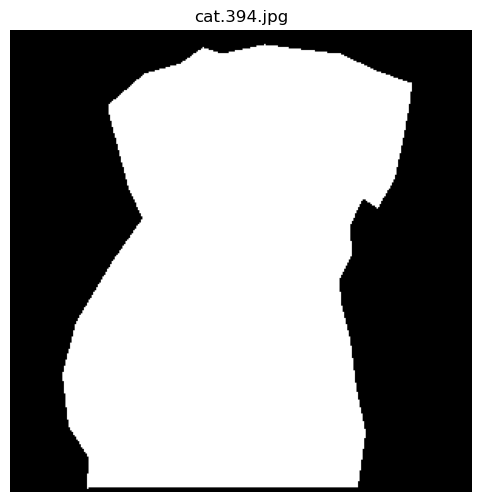

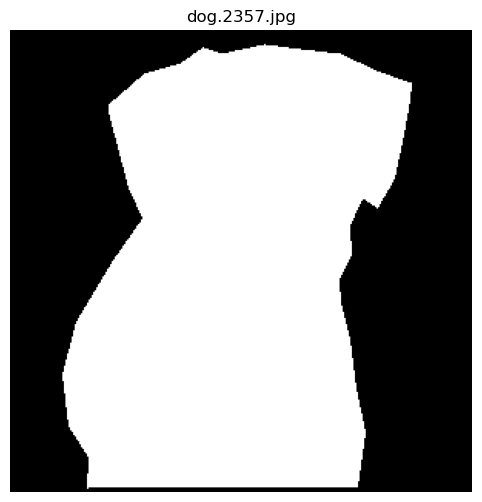

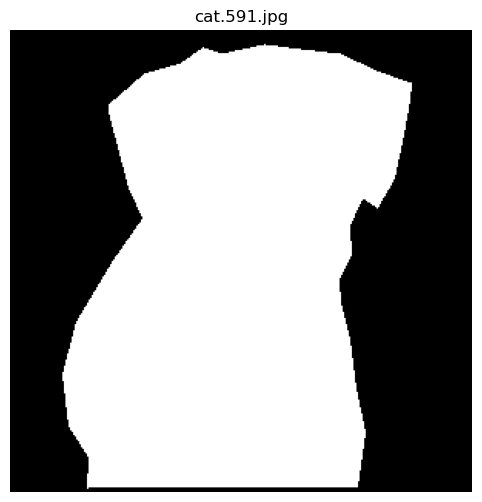

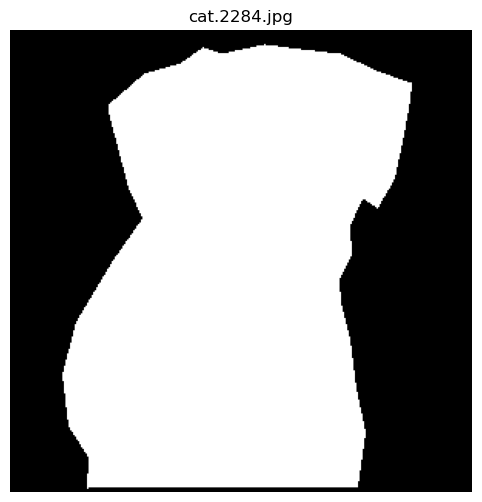

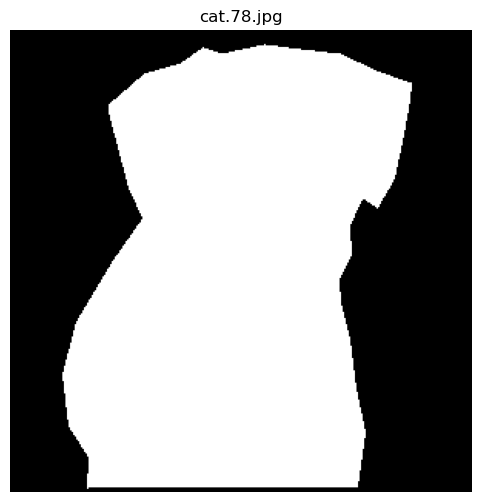

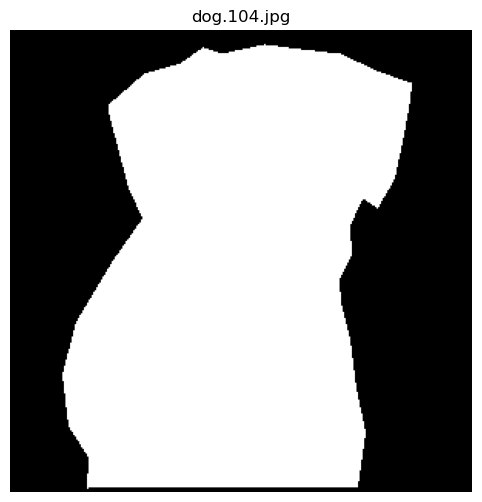

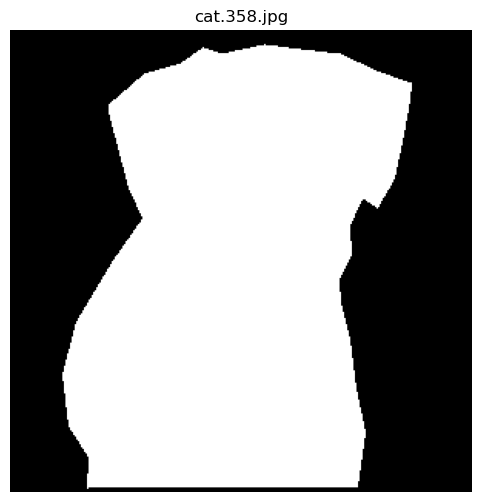

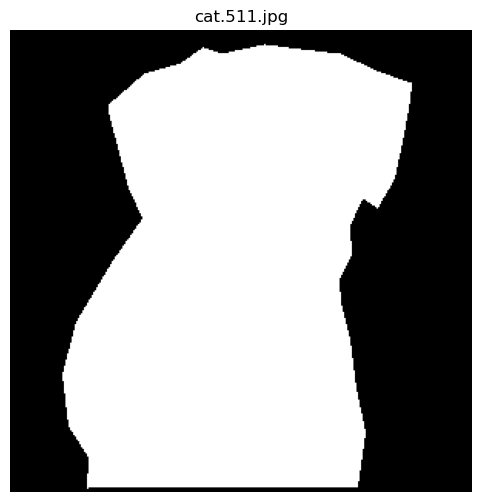

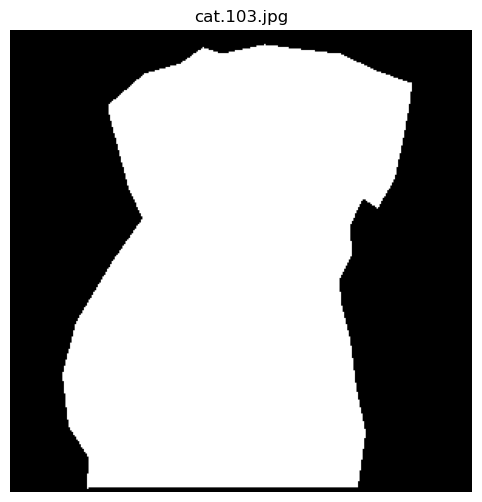

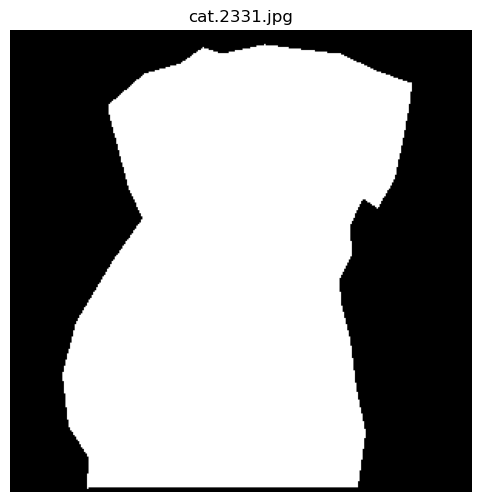

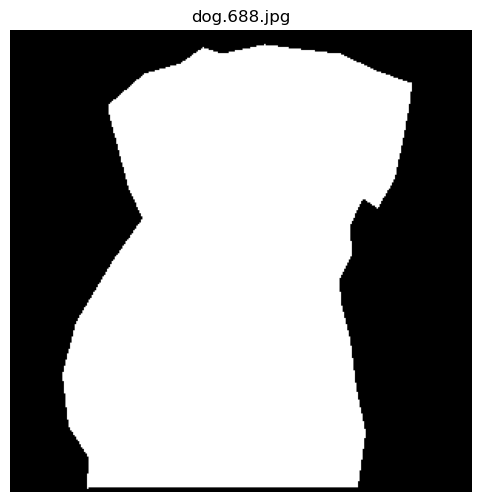

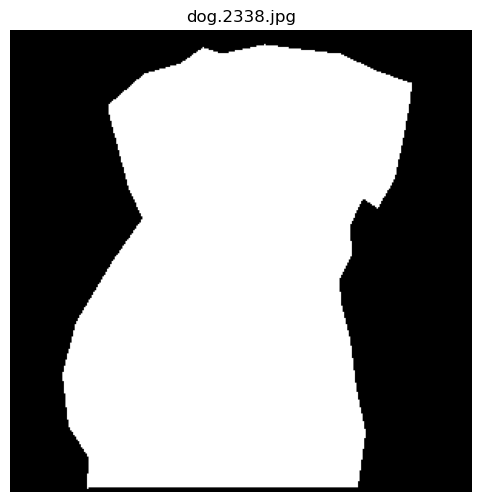

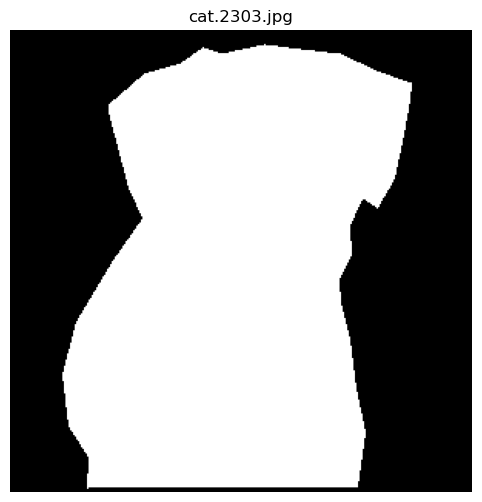

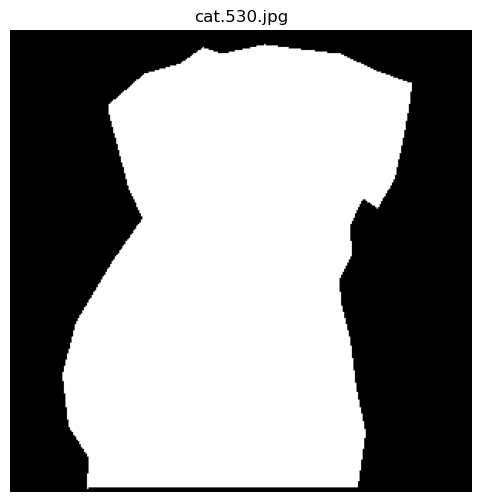

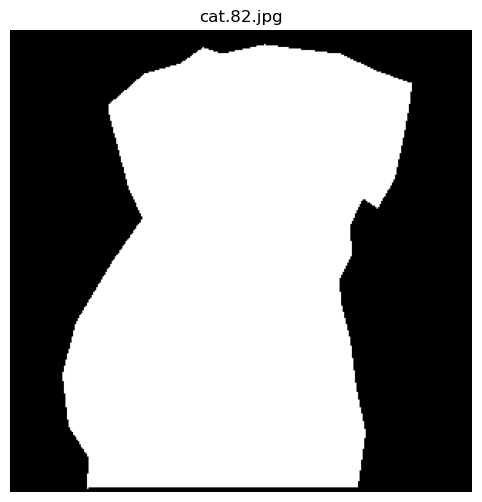

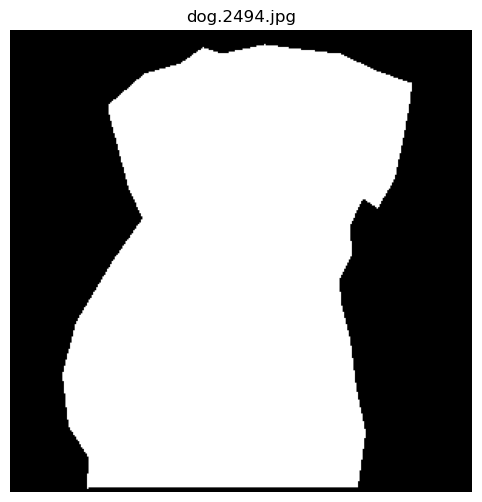

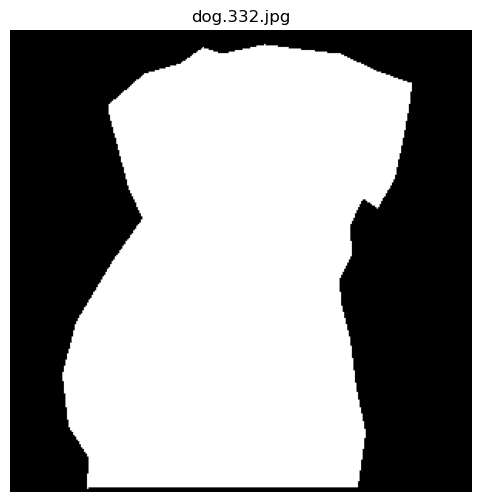

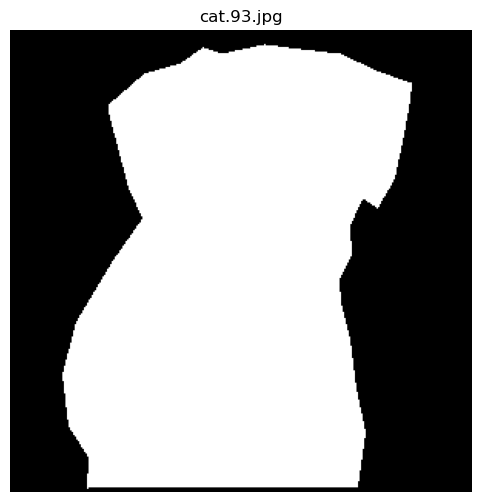

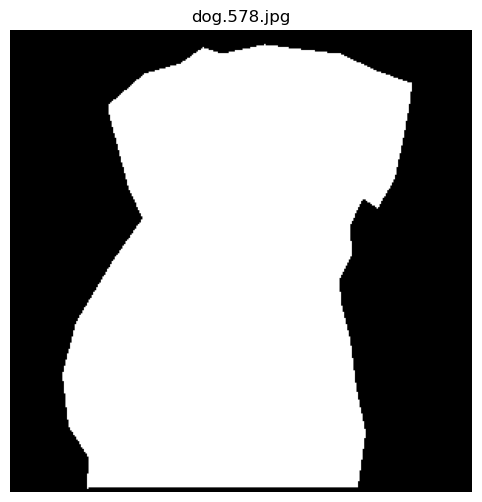

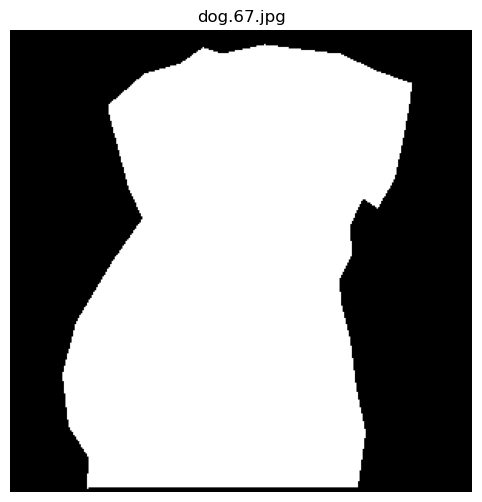

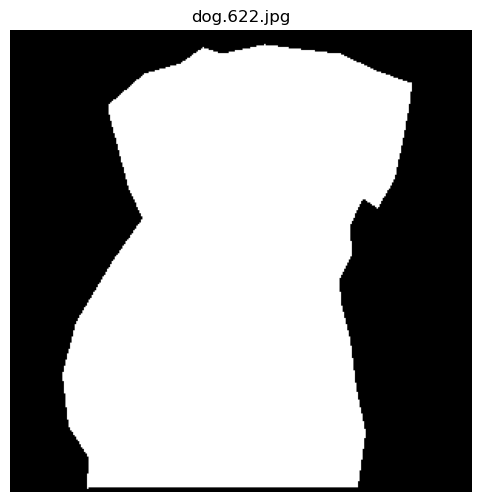

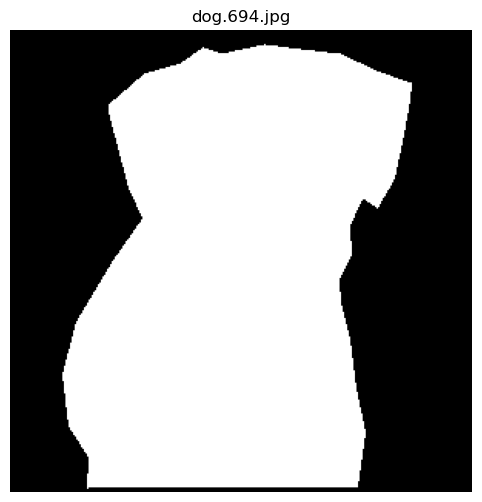

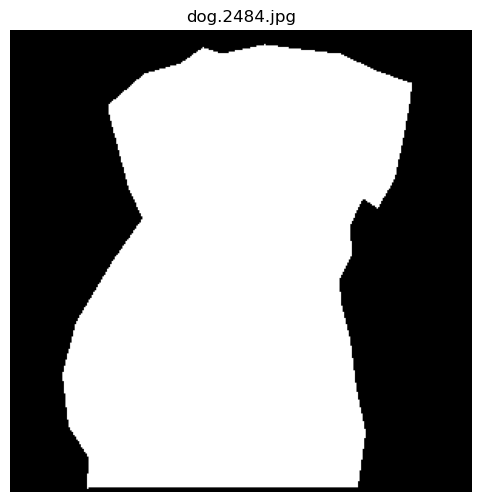

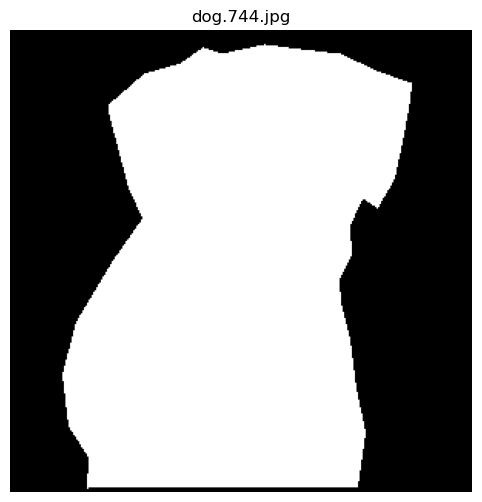

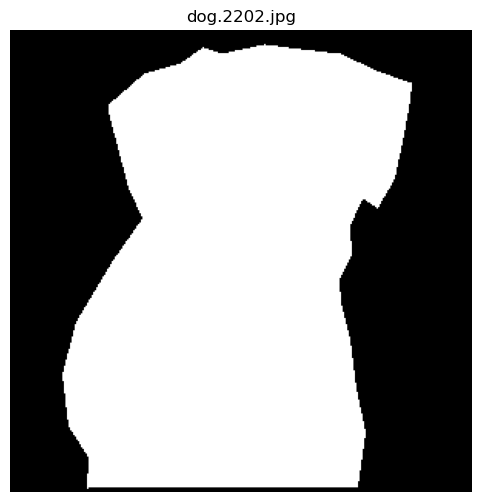

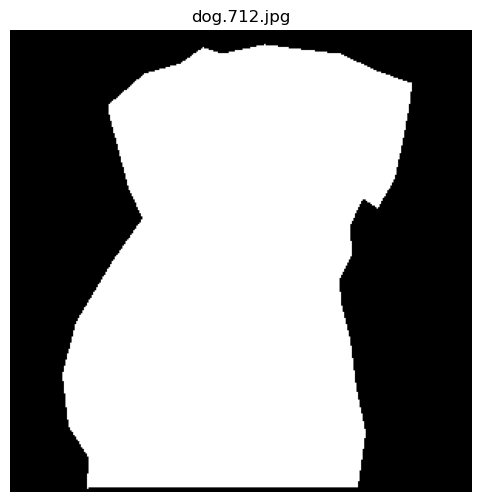

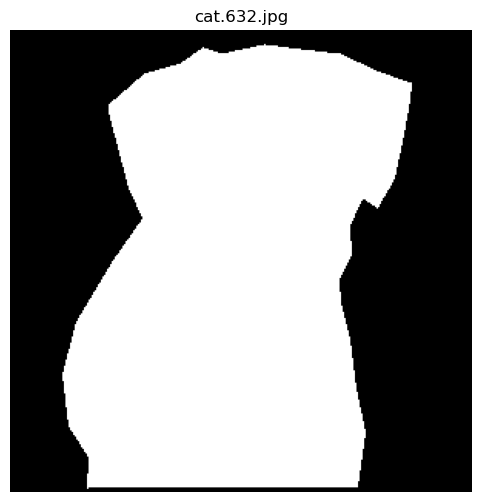

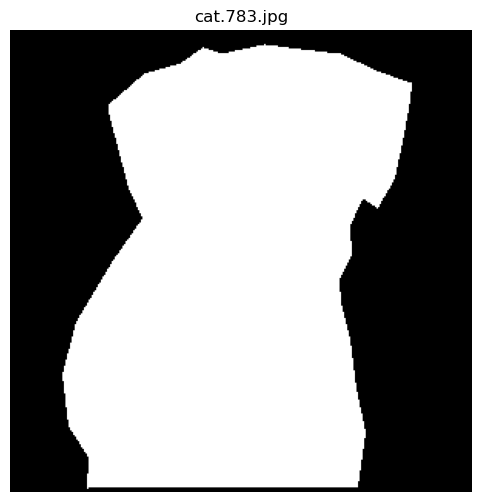

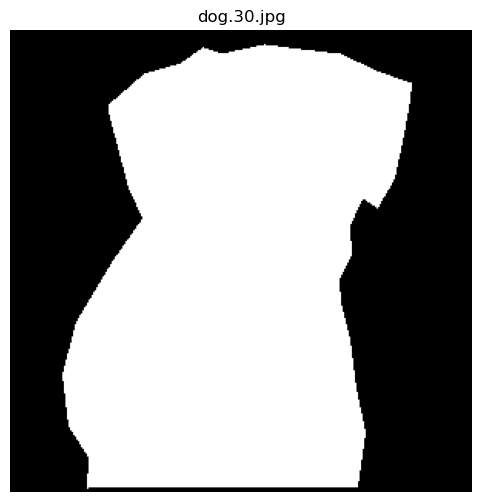

In [25]:
import os
import matplotlib.pyplot as plt
import cv2

output_dir = "dataset/cat_and_dog_dataset/encoded_masks"
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(mask_dir):
    # Your image processing code here to create grayscale_label_mask
    
    filename_no_ext = os.path.splitext(filename)[0] + ".jpg"
    save_path = os.path.join(output_dir, filename_no_ext)
    cv2.imwrite(save_path, grayscale_label_mask)
    
    # Display each image
    plt.figure(figsize=(8, 6))
    plt.imshow(grayscale_label_mask, cmap='gray')
    plt.title(filename_no_ext)
    plt.axis('off')
    plt.show()
    
    # Optional: Add a pause or input to control viewing
    # input("Press Enter to continue...")

### Reread the encoded mask

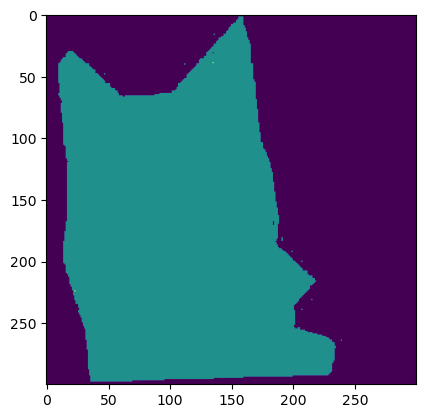

In [19]:

new_grayscale_label_mask = cv2.imread(save_path)
new_grayscale_label_mask = cv2.cvtColor(new_grayscale_label_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(new_grayscale_label_mask)